# Digital Marketing Strategy Group 6
## "What determinants could videogame publishers use to improve their Customer Engagement on the social media platforms of Instagram and Facebook?"

## Set up the dataset path and import/install necessary libraries
This step shows all imports and defines the path of the dataset in one location, minimizing repetition.

In [1]:
# This is the root path where the dataset file is stored. 
dataset_path = ('/Users/jimdoves/Desktop/Master Digital Driven Business/Digital Marketing Strategy/DMS')

In [2]:
# The libaries that are used
import pandas as pd
import os
import numpy as np
import torch
from transformers import pipeline
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from pymer4.models import Lmer
import scipy.stats as stats
from scipy.stats import kruskal
import scikit_posthocs as sp

# settings
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)



/opt/anaconda3/envs/DMS/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Exploratory Data Analysis, Data Cleaning and Feature Engineering

In [3]:
# Load the datasets
FB_data = pd.read_excel(os.path.join(dataset_path, "combined_FB_datasets.xlsx"))
IG_data = pd.read_excel(os.path.join(dataset_path, "combined_IG_datasets.xlsx"))

#Display the first and the last rows of the datasets
display(FB_data.head())
display(FB_data.tail())
display(IG_data.head())
display(IG_data.tail())

#Display information about the datasets
print('Original length of FB dataframe:', len(FB_data))
print('Original length of IG dataframe:', len(IG_data))
display("There are {} rows and {} columns in the FB dataset".format(FB_data.shape[0], FB_data.shape[1]))
display("There are {} rows and {} columns in the IG dataset".format(IG_data.shape[0], IG_data.shape[1]))
display("Datatypes FB dataset:", FB_data.dtypes) 
display("Datatypes IG dataset:", IG_data.dtypes)
missing_valuesFB = FB_data.isnull().sum()
missing_valuesIG = IG_data.isnull().sum()
print("Missing values per column in the FB dataset:\n", missing_valuesFB)
print("Missing values per column in the IG dataset:\n", missing_valuesIG)

,date,message,profile,network,number of followers,number of likes,total likes(including positive emoji likes),number of comments,number of comments (primary),shares per post,...,number of thankful,number of wow,post comments positive sentiment share,post comments negative sentiment share,engagement,weighted engagement,message-id,profile-id,link,external links
0,2021-12-31 18:00:03,What's the first game you're playing in 2022?,Insomniac Games,FACEBOOK,271113,728,995,203,190,25,...,0,1,0.305419,0.054187,0.004511,0.005444,91127584852_10160103901729853,91127584852,https://www.facebook.com/insomniacgames/photos...,NaN
1,2021-12-31 16:00:03,Fungi and ferns and moths and Fireflies -- the...,"Naughty Dog, LLC",FACEBOOK,1506484,850,1138,14,14,57,...,0,2,0.5,0.071429,0.000803,0.000888,57327290245_10165832084200246,57327290245,https://www.facebook.com/naughtydog/photos/a.1...,NaN
2,2021-12-31 16:00:02,How did the creators of NEO: The World Ends wi...,Square Enix,FACEBOOK,1792534,237,291,24,15,12,...,0,1,0.458333,0.375,0.000183,0.00021,59916854460_10159833755834461,59916854460,https://www.facebook.com/SquareEnix/photos/a.1...,NaN
3,2021-12-31 14:00:01,Yesterday was a journey. Tomorrow's a new adve...,Square Enix,FACEBOOK,1792534,478,664,50,48,106,...,0,1,0.48,0.36,0.00046,0.000606,59916854460_10159832301434461,59916854460,https://www.facebook.com/867403448085191/video...,NaN
4,2021-12-31 13:00:17,Happy New Year!,CD PROJEKT RED,FACEBOOK,482793,6630,8950,214,164,128,...,0,3,0.565421,0.17757,0.019262,0.020235,283103815139159_4671320582984105,283103815139159,https://www.facebook.com/283103815139159/posts...,NaN


,date,message,profile,network,number of followers,number of likes,total likes(including positive emoji likes),number of comments,number of comments (primary),shares per post,...,number of thankful,number of wow,post comments positive sentiment share,post comments negative sentiment share,engagement,weighted engagement,message-id,profile-id,link,external links
11817,2024-01-02 17:01:08,"The Rules of Valhalla: Preparation \n\n""The ch...",Santa Monica Studio,FACEBOOK,0,644,922,29,19,18,...,0,2,0.310345,0.206897,0.006946,0.007412,404310782934653_888976556564295,404310782934653,https://www.facebook.com/739147731547179/posts...,NaN
11818,2024-01-02 16:00:27,Who's excited to take on new and familiar foes...,Square Enix,FACEBOOK,0,647,880,76,50,65,...,0,16,0.513158,0.184211,0.000932,0.00112,59916854460_982334366592098,59916854460,https://www.facebook.com/867403448085191/video...,NaN
11819,2024-01-02 15:20:29,what have you been playing over the holidays?,Ubisoft,FACEBOOK,0,306,381,926,800,18,...,0,1,0.316415,0.336933,0.000633,0.001092,81174647292_929205918563949,81174647292,https://www.facebook.com/820219539462588/posts...,NaN
11820,2024-01-02 13:21:51,Take caution when you're out in the wilds. \n\...,Guerrilla Games,FACEBOOK,0,280,358,1,1,3,...,0,0,-,-,0.001844,0.001879,179751088724627_920688956093823,179751088724627,https://www.facebook.com/777512863744767/posts...,NaN
11821,2024-01-01 18:04:40,New Year hype! What are you looking forward to...,Insomniac Games,FACEBOOK,0,696,1074,204,135,26,...,0,3,0.455882,0.102941,0.004428,0.005298,91127584852_754198763404083,91127584852,https://www.facebook.com/459736079517021/video...,NaN


,date,message,profile,network,number of followers,number of likes,number of comments,"reactions, comments & shares",number of posts,picture posts,video-posts,engagement,message-id,profile-id,link,external links
0,2021-12-31 18:00:07,What is the first game you are going to play i...,Insomniac Games,INSTAGRAM,597380,8190,295,8485,1,1,0,0.014204,18159887410207560,302534790,https://www.instagram.com/p/CYKA__hjRC2/,NaN
1,2021-12-31 16:00:11,Fungi and ferns and moths and Fireflies -- the...,Naughty Dog,INSTAGRAM,1208699,19992,35,20027,1,1,0,0.016569,17918878019040680,1593309399,https://www.instagram.com/p/CYJzRfyAaSI/,NaN
2,2021-12-31 14:01:05,Yesterday was a journey. Tomorrow's a new adve...,Square Enix,INSTAGRAM,1059895,3167,79,3246,1,0,1,0.003063,17864704832649000,2117884847,https://www.instagram.com/tv/CYJlmkOhnw0/,NaN
3,2021-12-30 18:01:10,It's always bad luck when a Black Cat... judo ...,Insomniac Games,INSTAGRAM,597380,42010,341,42351,1,1,0,0.070946,17902246271425140,302534790,https://www.instagram.com/p/CYHcUnih3H8/,NaN
4,2021-12-30 15:09:00,Mammoth’s Patriot Mil-Spec is the internationa...,Rockstar Games,INSTAGRAM,21721887,156874,2163,159037,1,1,0,0.007325,18189250981149360,184595688,https://www.instagram.com/p/CYHInoNtmzo/,NaN


,date,message,profile,network,number of followers,number of likes,number of comments,"reactions, comments & shares",number of posts,picture posts,video-posts,engagement,message-id,profile-id,link,external links
8589,2024-01-02 18:01:09,"As the New Year gets underway, we’re celebrati...",Square Enix,INSTAGRAM,1063757,14512,236,14748,1,1,0,0.01421,18022233265771192,2117884847,https://www.instagram.com/p/C1m2_7Ivi22/,NaN
8590,2024-01-02 17:00:57,"The Rules of Valhalla: Preparation \n\n""The ch...",Santa Monica Studio,INSTAGRAM,749452,13476,44,13520,1,1,0,0.01839,18126621253321340,51722578,https://www.instagram.com/p/C1mwHEGOaNy/,NaN
8591,2024-01-02 15:24:05,Drop in comment ??,Ubisoft,INSTAGRAM,8015932,21231,3584,24815,1,1,0,0.003026,18017000852052740,507516414,https://www.instagram.com/p/C1mlB_aNJxh/,NaN
8592,2024-01-02 13:21:55,Take caution when you're out in the wilds. \n\...,Guerrilla,INSTAGRAM,288197,1792,14,1806,1,1,0,-,17950605668726090,615720220,https://www.instagram.com/p/C1mXC4UOPTt/,NaN
8593,2024-01-01 18:05:40,New Year hype! What are you looking forward to...,Insomniac Games,INSTAGRAM,981610,62239,832,63071,1,0,1,0.063939,18033210811685080,302534790,https://www.instagram.com/reel/C1kStT7uEbq/,NaN


Original length of FB dataframe: 11822
Original length of IG dataframe: 8594


'There are 11822 rows and 29 columns in the FB dataset'

'There are 8594 rows and 16 columns in the IG dataset'

'Datatypes FB dataset:'

date                                           datetime64[ns]
message                                                object
profile                                                object
network                                                object
number of followers                                     int64
number of likes                                         int64
total likes(including positive emoji likes)             int64
number of comments                                      int64
number of comments (primary)                            int64
shares per post                                         int64
reactions, comments & shares                            int64
number of posts                                         int64
picture posts                                          object
video-posts                                            object
number of haha                                          int64
number of love                                          int64
number o

'Datatypes IG dataset:'

date                            datetime64[ns]
message                                 object
profile                                 object
network                                 object
number of followers                      int64
number of likes                          int64
number of comments                       int64
reactions, comments & shares             int64
number of posts                          int64
picture posts                            int64
video-posts                              int64
engagement                              object
message-id                               int64
profile-id                               int64
link                                    object
external links                         float64
dtype: object

Missing values per column in the FB dataset:
 date                                               0
message                                          905
profile                                            0
network                                            0
number of followers                                0
number of likes                                    0
total likes(including positive emoji likes)        0
number of comments                                 0
number of comments (primary)                       0
shares per post                                    0
reactions, comments & shares                       0
number of posts                                    0
picture posts                                      0
video-posts                                        0
number of haha                                     0
number of love                                     0
number of angry                                    0
number of care                                     0


In [4]:
# Display summary statistics for numeric columns
print("\nSummary Statistics FB dataset:")
display(FB_data.describe())
print("\nSummary Statistics IG dataset:")
display(IG_data.describe())

# Display statistics for categorical columns
categorical_colsFB = FB_data.select_dtypes(include=['object']).columns
print(f"\nStatistics categorical in FB Dataset:")
display(FB_data[categorical_colsFB].describe())
categorical_colsIG = IG_data.select_dtypes(include=['object']).columns
print(f"\nStatistics categorical in IG Dataset:")
display(IG_data[categorical_colsIG].describe())


Summary Statistics FB dataset:


,date,number of followers,number of likes,total likes(including positive emoji likes),number of comments,number of comments (primary),shares per post,"reactions, comments & shares",number of posts,number of haha,number of love,number of angry,number of care,number of sad,number of thankful,number of wow,profile-id
count,11822,1.182200e+04,11822.000000,11822.000000,11822.000000,11822.000000,11822.000000,11822.00000,11822.0,11822.000000,11822.000000,11822.000000,11822.0,11822.000000,11822.0,11822.000000,1.182200e+04
mean,2022-11-26 00:56:32.127558656,2.515432e+06,969.448909,1437.025546,165.133395,107.548554,147.251988,1776.20851,1.0,53.902724,394.144815,9.634495,0.0,17.163086,0.0,19.529098,6.251111e+13
min,2020-12-31 23:00:04,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,5.175254e+10
25%,2021-12-22 16:37:36.500000,2.758880e+05,128.000000,166.000000,12.000000,9.000000,7.000000,206.00000,1.0,0.000000,28.000000,0.000000,0.0,0.000000,0.0,1.000000,5.991685e+10
50%,2022-10-22 19:25:21,1.457593e+06,345.000000,478.500000,35.000000,24.000000,20.000000,562.00000,1.0,2.000000,106.000000,0.000000,0.0,0.000000,0.0,2.000000,8.117465e+10
75%,2023-10-23 09:20:52.500000,1.793685e+06,876.750000,1230.000000,117.000000,72.000000,63.000000,1454.75000,1.0,11.000000,284.000000,2.000000,0.0,1.000000,0.0,6.000000,1.395385e+14
max,2024-12-31 17:01:05,1.390782e+07,284111.000000,557672.000000,49396.000000,35508.000000,179629.000000,787044.00000,1.0,31176.000000,231963.000000,7913.000000,0.0,99051.000000,0.0,40120.000000,4.043108e+14
std,NaN,3.725357e+06,4683.057792,8134.297878,845.617866,595.231750,2174.537225,11067.92452,0.0,461.507951,3148.439154,116.800360,0.0,944.372162,0.0,407.724600,1.063489e+14



Summary Statistics IG dataset:


,date,number of followers,number of likes,number of comments,"reactions, comments & shares",number of posts,picture posts,video-posts,message-id,profile-id,external links
count,8594,8.594000e+03,8.594000e+03,8594.000000,8.594000e+03,8594.0,8594.000000,8594.000000,8.594000e+03,8.594000e+03,0.0
mean,2023-01-10 10:52:48.036886528,4.203363e+06,3.037486e+04,410.154759,3.078502e+04,1.0,0.756342,0.243658,1.800790e+16,8.713148e+08,NaN
min,2020-12-31 23:00:07,6.348800e+04,0.000000e+00,0.000000,0.000000e+00,1.0,0.000000,0.000000,1.784222e+16,4.624896e+07,NaN
25%,2022-01-17 14:35:51.500000,8.078050e+05,3.051250e+03,34.000000,3.084250e+03,1.0,1.000000,0.000000,1.791867e+16,1.845957e+08,NaN
50%,2022-12-09 17:23:50,1.059895e+06,8.841000e+03,103.000000,8.959500e+03,1.0,1.000000,0.000000,1.797639e+16,5.075164e+08,NaN
75%,2024-01-31 09:08:24.750000128,1.352000e+06,2.894400e+04,321.000000,2.933075e+04,1.0,1.000000,0.000000,1.804537e+16,1.593309e+09,NaN
max,2024-12-31 17:01:07,2.928702e+07,6.774984e+06,102757.000000,6.877741e+06,1.0,1.000000,1.000000,1.848201e+16,2.117885e+09,NaN
std,NaN,7.880590e+06,1.170898e+05,1845.953005,1.188198e+05,0.0,0.429314,0.429314,1.269071e+14,8.150569e+08,NaN



Statistics categorical in FB Dataset:


,message,profile,network,picture posts,video-posts,post comments positive sentiment share,post comments negative sentiment share,engagement,weighted engagement,message-id,link,external links
count,10917,11822,11822,11822,11822,11822,11822,11822,11822,11822,11822,180
unique,10838,11,1,2,2,3248,3172,11492,11500,11822,11822,178
top,??,Square Enix,FACEBOOK,1,-,-,0,-,-,91127584852_10160103901729853,https://www.facebook.com/insomniacgames/photos...,https://www.gamingheads.com/jak-3-statue.html
freq,8,3014,11822,7635,8080,1371,1431,269,269,1,1,2



Statistics categorical in IG Dataset:


,message,profile,network,engagement,link
count,8564,8594,8594,8594,8594
unique,8516,11,1,7790,8594
top,Drop in comment ??,Square Enix,INSTAGRAM,-,https://www.instagram.com/p/CYKA__hjRC2/
freq,7,2039,8594,803,1


#### Rename the columns

In [5]:
FB_data.rename(columns={"message": "caption","number of followers":"number_of_followers","number of likes":"number_of_likes","total likes(including positive emoji likes)":"total_likes","number of comments":"number_of_comments","picture posts":"picture_posts","video-posts":"video_posts"}, inplace=True)
IG_data.rename(columns={"message": "caption","number of followers":"number_of_followers","number of likes":"number_of_likes","number of comments":"number_of_comments","picture posts":"picture_posts","video-posts":"video_posts"}, inplace=True)

#### Delete columns where number_of_followers is 0
During the descriptive statistics, it was noted that there was a minimum value of 0 for the follower column (number_of_followers) in the Facebook dataset. This can be problematic because it may be an error or an empty value that affects the analyses. Therefore, I decided to remove these rows to ensure that the dataset contains only valid data for further analyses.

In [6]:
# View the rows where the 'number_of_followers' equals 0
zero_followers = FB_data[FB_data['number_of_followers'] == 0]
print("Rows with 0 followers:")
print(zero_followers)

Rows with 0 followers:
                     date                                            caption  \
9369  2023-01-03 16:25:20                                                NaN   
9370  2023-01-03 16:25:20                                                NaN   
9371  2023-01-03 15:02:28  Traders and Moonshiners restocking their inven...   
9372  2023-01-03 13:37:01  Grow your tribe and travel toward the center o...   
9373  2023-01-03 10:19:40  'I ain't one to leave a lit forge.' \n\n?? Pet...   
9374  2023-01-02 16:39:16  Share a video game soundtrack that sums up you...   
9375  2023-01-02 16:16:15  Get 2023 off to a great start! ??\n\nPlay unre...   
9376  2023-01-02 14:01:08  Temenos' Talent, Moonlight Judgement, triggers...   
9377  2023-01-02 11:00:50  The dawn of a new year \n\n?? Virtual photogra...   
9378  2023-01-01 08:06:52  We're watching the fireworks in Hidden Ember t...   
11812 2024-01-03 17:01:27  "To be one's own master." \n\n#GodOfWarRagnaro...   
11813 2024-01-03 

In [7]:
# Remove the rows with 0 followers
FB_data.drop(FB_data[FB_data['number_of_followers'] == 0].index, inplace=True)

# Verify that the rows with 0 followers have been deleted
print("\nNumber of rows after deleting 0 followers:")
print(FB_data.shape)


Number of rows after deleting 0 followers:
(11802, 29)


#### Replace - in the FB type of post columns to 0 

In [8]:
# Replace - with 0
FB_data['video_posts'] = FB_data['video_posts'].replace('-', 0)
FB_data['picture_posts'] = FB_data['picture_posts'].replace('-', 0)

FB_data['engagement'] = FB_data['engagement'].replace('-', 0)
IG_data['engagement'] = IG_data['engagement'].replace('-', 0)

#### Change the datatypes to the correct type

In [9]:
# Change to the correct datatypes
FB_data['caption'] = FB_data['caption'].astype('string')
FB_data['profile'] = FB_data['profile'].astype('category')
FB_data['network'] = FB_data['network'].astype('category')
FB_data['picture_posts'] = FB_data['picture_posts'].astype(int)
FB_data['video_posts'] = FB_data['video_posts'].astype(int)
FB_data['engagement'] = FB_data['engagement'].astype(float)
FB_data['link'] = FB_data['link'].astype('string')
FB_data['external links'] = FB_data['external links'].astype('string')

IG_data['caption'] = IG_data['caption'].astype('string')
IG_data['profile'] = IG_data['profile'].astype('category')
IG_data['network'] = IG_data['network'].astype('category')
IG_data['engagement'] = IG_data['engagement'].astype(float)
IG_data['link'] = IG_data['link'].astype('string')
IG_data['external links'] = IG_data['external links'].astype('string')

#### Splitting the column `Date` in Date and Time and add the column `Day` which contains the name of the day of the week.

In [10]:
# Splitting the column `Date` in date and time

# First ensuring that `date` the datatype datetime is:
FB_data["date"] = pd.to_datetime(FB_data["date"], errors="coerce")
IG_data["date"] = pd.to_datetime(IG_data["date"], errors="coerce")

# Create separate columns for date, time and day of the week(FB)
FB_data['day'] = FB_data['date'].dt.day_name()
FB_data['time'] = FB_data['date'].dt.time
FB_data['date'] = FB_data['date'].dt.date

# Create separate columns for date,time and day of the week (IG)
IG_data['day'] = IG_data['date'].dt.day_name()
IG_data['time'] = IG_data['date'].dt.time
IG_data['date'] = IG_data['date'].dt.date

# Set the new columns in the right sequence
FB_data = FB_data[["date", "time", "day"] + [col for col in FB_data.columns if col not in ["date", "time", "day"]]]
IG_data = IG_data[["date", "time", "day"] + [col for col in IG_data.columns if col not in ["date", "time", "day"]]]

# Ensure that time (hour) is treated as a numeric value and is rounded up to the closest hour
def round_to_nearest_hour(time_obj):
    hour = time_obj.hour
    minute = time_obj.minute
    if minute > 30:
        hour = (hour + 1) % 24 
    return f'{hour:02d}:00'
FB_data['time'] = FB_data['time'].apply(round_to_nearest_hour)
IG_data['time'] = IG_data['time'].apply(round_to_nearest_hour)

# Check the results
print("FB dataset:")
display(FB_data.head())

print("IG dataset:")
display(IG_data.head())

FB dataset:


,date,time,day,caption,profile,network,number_of_followers,number_of_likes,total_likes,number_of_comments,...,number of thankful,number of wow,post comments positive sentiment share,post comments negative sentiment share,engagement,weighted engagement,message-id,profile-id,link,external links
0,2021-12-31,18:00,Friday,What's the first game you're playing in 2022?,Insomniac Games,FACEBOOK,271113,728,995,203,...,0,1,0.305419,0.054187,0.004511,0.005444,91127584852_10160103901729853,91127584852,https://www.facebook.com/insomniacgames/photos...,<NA>
1,2021-12-31,16:00,Friday,Fungi and ferns and moths and Fireflies -- the...,"Naughty Dog, LLC",FACEBOOK,1506484,850,1138,14,...,0,2,0.5,0.071429,0.000803,0.000888,57327290245_10165832084200246,57327290245,https://www.facebook.com/naughtydog/photos/a.1...,<NA>
2,2021-12-31,16:00,Friday,How did the creators of NEO: The World Ends wi...,Square Enix,FACEBOOK,1792534,237,291,24,...,0,1,0.458333,0.375,0.000183,0.00021,59916854460_10159833755834461,59916854460,https://www.facebook.com/SquareEnix/photos/a.1...,<NA>
3,2021-12-31,14:00,Friday,Yesterday was a journey. Tomorrow's a new adve...,Square Enix,FACEBOOK,1792534,478,664,50,...,0,1,0.48,0.36,0.000460,0.000606,59916854460_10159832301434461,59916854460,https://www.facebook.com/867403448085191/video...,<NA>
4,2021-12-31,13:00,Friday,Happy New Year!,CD PROJEKT RED,FACEBOOK,482793,6630,8950,214,...,0,3,0.565421,0.17757,0.019262,0.020235,283103815139159_4671320582984105,283103815139159,https://www.facebook.com/283103815139159/posts...,<NA>


IG dataset:


,date,time,day,caption,profile,network,number_of_followers,number_of_likes,number_of_comments,"reactions, comments & shares",number of posts,picture_posts,video_posts,engagement,message-id,profile-id,link,external links
0,2021-12-31,18:00,Friday,What is the first game you are going to play i...,Insomniac Games,INSTAGRAM,597380,8190,295,8485,1,1,0,0.014204,18159887410207560,302534790,https://www.instagram.com/p/CYKA__hjRC2/,<NA>
1,2021-12-31,16:00,Friday,Fungi and ferns and moths and Fireflies -- the...,Naughty Dog,INSTAGRAM,1208699,19992,35,20027,1,1,0,0.016569,17918878019040680,1593309399,https://www.instagram.com/p/CYJzRfyAaSI/,<NA>
2,2021-12-31,14:00,Friday,Yesterday was a journey. Tomorrow's a new adve...,Square Enix,INSTAGRAM,1059895,3167,79,3246,1,0,1,0.003063,17864704832649000,2117884847,https://www.instagram.com/tv/CYJlmkOhnw0/,<NA>
3,2021-12-30,18:00,Thursday,It's always bad luck when a Black Cat... judo ...,Insomniac Games,INSTAGRAM,597380,42010,341,42351,1,1,0,0.070946,17902246271425140,302534790,https://www.instagram.com/p/CYHcUnih3H8/,<NA>
4,2021-12-30,15:00,Thursday,Mammoth’s Patriot Mil-Spec is the internationa...,Rockstar Games,INSTAGRAM,21721887,156874,2163,159037,1,1,0,0.007325,18189250981149360,184595688,https://www.instagram.com/p/CYHInoNtmzo/,<NA>


In [11]:
# Get unique gaming studios profiles
unique_studiosFB = FB_data["profile"].unique()
unique_studiosIG = IG_data["profile"].unique()

# Display unique studio names
display("Unique Gaming Studio Profiles FB:")
for profileFB in sorted(unique_studiosFB):
    print(profileFB)

display("Unique Gaming Studio Profiles IG:")
for profileIG in sorted(unique_studiosIG):
    print(profileIG)

'Unique Gaming Studio Profiles FB:'

Bethesda
CD PROJEKT RED
EA - Electronic Arts
Guerrilla Games
Insomniac Games
Naughty Dog, LLC
Obsidian Entertainment
Rockstar Games
Santa Monica Studio
Square Enix
Ubisoft


'Unique Gaming Studio Profiles IG:'

Bethesda Softworks
CD PROJEKT RED
Electronic Arts (EA)
Guerrilla
Insomniac Games
Naughty Dog
Obsidian Entertainment
Rockstar Games
Santa Monica Studio
Square Enix
Ubisoft


In [12]:
# Mapping Profilenames
profile_mapping = {
    "Bethesda Softworks": "Bethesda",
    "EA - Electronic Arts": "Electronic Arts (EA)",
    "Guerrilla": "Guerrilla Games",
    "Naughty Dog, LLC": "Naughty Dog",
}

# Standardize profile names in both datasets
FB_data["profile"] = FB_data["profile"].replace(profile_mapping)
IG_data["profile"] = IG_data["profile"].replace(profile_mapping)

# Display unique profiles again (after cleanup)
unique_studiosFB_clean = FB_data["profile"].unique()
unique_studiosIG_clean = IG_data["profile"].unique()

print("\nCleaned Unique Gaming Studio Profiles FB:")
print(sorted(unique_studiosFB_clean))

print("\nCleaned Unique Gaming Studio Profiles IG:")
print(sorted(unique_studiosIG_clean))



Cleaned Unique Gaming Studio Profiles FB:
['Bethesda', 'CD PROJEKT RED', 'Electronic Arts (EA)', 'Guerrilla Games', 'Insomniac Games', 'Naughty Dog', 'Obsidian Entertainment', 'Rockstar Games', 'Santa Monica Studio', 'Square Enix', 'Ubisoft']

Cleaned Unique Gaming Studio Profiles IG:
['Bethesda', 'CD PROJEKT RED', 'Electronic Arts (EA)', 'Guerrilla Games', 'Insomniac Games', 'Naughty Dog', 'Obsidian Entertainment', 'Rockstar Games', 'Santa Monica Studio', 'Square Enix', 'Ubisoft']


In [13]:
classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli", framework="pt")

Device set to use mps:0


In [14]:
categories = ["Informative", "Entertainment", "Social/Interactive", "Reward-Based","Promotion"]

In [15]:
example_caption = "?? Deal Alert: Marvel's Spider-Man Remastered is 25% off on Steam and the Epic Game Store for a limited time! Get it for you or a friend - or both, before the sale ends! #BeGreater #SpiderManPC"

result = classifier(example_caption, candidate_labels=categories)
print(result)

{'sequence': "?? Deal Alert: Marvel's Spider-Man Remastered is 25% off on Steam and the Epic Game Store for a limited time! Get it for you or a friend - or both, before the sale ends! #BeGreater #SpiderManPC", 'labels': ['Promotion', 'Informative', 'Entertainment', 'Social/Interactive', 'Reward-Based'], 'scores': [0.4629518985748291, 0.2040448784828186, 0.17804428935050964, 0.1300937831401825, 0.024865178391337395]}


In [16]:
# File name for the Pickle file
FB_pickle_file = "FB_contentpurpose.pkl"

# Check if the pickle file exist
if os.path.exists(FB_pickle_file):
    # If it exist open file
    with open(FB_pickle_file, "rb") as file:
        FB_contentpurpose = pickle.load(file)
    FB_data["contentpurpose"] = FB_contentpurpose
    print("contentpurpose for FB_data has been successfully loaded from Pickle.")
else:
    # If it does not exist, run the classifier.
    FB_data["contentpurpose"] = FB_data["caption"].apply(
        lambda x: classifier(x, candidate_labels=categories)["labels"][0] if pd.notna(x) else "Unknown"
    )

    # Save the contentpurpose column as a Pickle file
    with open(FB_pickle_file, "wb") as file:
        pickle.dump(FB_data["contentpurpose"], file)
    
    print("Contentpurpose for FB_data was successfully created and saved as Pickle.")


contentpurpose for FB_data has been successfully loaded from Pickle.


In [17]:
# File name for the Pickle file
IG_pickle_file = "IG_contentpurpose.pkl"

# Check if the pickle file exist
if os.path.exists(IG_pickle_file):
    # If it exist open file
    with open(IG_pickle_file, "rb") as file:
        IG_contentpurpose = pickle.load(file)
    IG_data["contentpurpose"] = IG_contentpurpose
    print("contentpurpose for IG_data has been successfully loaded from Pickle.")
else:
    # If it does not exist, run the classifier.
    IG_data["contentpurpose"] = IG_data["caption"].apply(
        lambda x: classifier(x, candidate_labels=categories)["labels"][0] if pd.notna(x) else "Unknown"
    )

    # Save the contentpurpose column as a Pickle file
    with open(IG_pickle_file, "wb") as file:
        pickle.dump(IG_data["contentpurpose"], file)
    
    print("Contentpurpose for IG_data was successfully created and saved as Pickle.")

contentpurpose for IG_data has been successfully loaded from Pickle.


In [18]:
IG_data

,date,time,day,caption,profile,network,number_of_followers,number_of_likes,number_of_comments,"reactions, comments & shares",number of posts,picture_posts,video_posts,engagement,message-id,profile-id,link,external links,contentpurpose
0,2021-12-31,18:00,Friday,What is the first game you are going to play i...,Insomniac Games,INSTAGRAM,597380,8190,295,8485,1,1,0,0.014204,18159887410207560,302534790,https://www.instagram.com/p/CYKA__hjRC2/,<NA>,Informative
1,2021-12-31,16:00,Friday,Fungi and ferns and moths and Fireflies -- the...,Naughty Dog,INSTAGRAM,1208699,19992,35,20027,1,1,0,0.016569,17918878019040680,1593309399,https://www.instagram.com/p/CYJzRfyAaSI/,<NA>,Informative
2,2021-12-31,14:00,Friday,Yesterday was a journey. Tomorrow's a new adve...,Square Enix,INSTAGRAM,1059895,3167,79,3246,1,0,1,0.003063,17864704832649000,2117884847,https://www.instagram.com/tv/CYJlmkOhnw0/,<NA>,Entertainment
3,2021-12-30,18:00,Thursday,It's always bad luck when a Black Cat... judo ...,Insomniac Games,INSTAGRAM,597380,42010,341,42351,1,1,0,0.070946,17902246271425140,302534790,https://www.instagram.com/p/CYHcUnih3H8/,<NA>,Informative
4,2021-12-30,15:00,Thursday,Mammoth’s Patriot Mil-Spec is the internationa...,Rockstar Games,INSTAGRAM,21721887,156874,2163,159037,1,1,0,0.007325,18189250981149360,184595688,https://www.instagram.com/p/CYHInoNtmzo/,<NA>,Informative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8589,2024-01-02,18:00,Tuesday,"As the New Year gets underway, we’re celebrati...",Square Enix,INSTAGRAM,1063757,14512,236,14748,1,1,0,0.014210,18022233265771192,2117884847,https://www.instagram.com/p/C1m2_7Ivi22/,<NA>,Informative
8590,2024-01-02,17:00,Tuesday,"The Rules of Valhalla: Preparation ""The chal...",Santa Monica Studio,INSTAGRAM,749452,13476,44,13520,1,1,0,0.018390,18126621253321340,51722578,https://www.instagram.com/p/C1mwHEGOaNy/,<NA>,Informative
8591,2024-01-02,15:00,Tuesday,Drop in comment ??,Ubisoft,INSTAGRAM,8015932,21231,3584,24815,1,1,0,0.003026,18017000852052740,507516414,https://www.instagram.com/p/C1mlB_aNJxh/,<NA>,Social/Interactive
8592,2024-01-02,13:00,Tuesday,Take caution when you're out in the wilds. ?...,Guerrilla Games,INSTAGRAM,288197,1792,14,1806,1,1,0,0.000000,17950605668726090,615720220,https://www.instagram.com/p/C1mXC4UOPTt/,<NA>,Informative


In [19]:
FB_data

,date,time,day,caption,profile,network,number_of_followers,number_of_likes,total_likes,number_of_comments,...,number of wow,post comments positive sentiment share,post comments negative sentiment share,engagement,weighted engagement,message-id,profile-id,link,external links,contentpurpose
0,2021-12-31,18:00,Friday,What's the first game you're playing in 2022?,Insomniac Games,FACEBOOK,271113,728,995,203,...,1,0.305419,0.054187,0.004511,0.005444,91127584852_10160103901729853,91127584852,https://www.facebook.com/insomniacgames/photos...,<NA>,Informative
1,2021-12-31,16:00,Friday,Fungi and ferns and moths and Fireflies -- the...,Naughty Dog,FACEBOOK,1506484,850,1138,14,...,2,0.5,0.071429,0.000803,0.000888,57327290245_10165832084200246,57327290245,https://www.facebook.com/naughtydog/photos/a.1...,<NA>,Informative
2,2021-12-31,16:00,Friday,How did the creators of NEO: The World Ends wi...,Square Enix,FACEBOOK,1792534,237,291,24,...,1,0.458333,0.375,0.000183,0.00021,59916854460_10159833755834461,59916854460,https://www.facebook.com/SquareEnix/photos/a.1...,<NA>,Informative
3,2021-12-31,14:00,Friday,Yesterday was a journey. Tomorrow's a new adve...,Square Enix,FACEBOOK,1792534,478,664,50,...,1,0.48,0.36,0.000460,0.000606,59916854460_10159832301434461,59916854460,https://www.facebook.com/867403448085191/video...,<NA>,Entertainment
4,2021-12-31,13:00,Friday,Happy New Year!,CD PROJEKT RED,FACEBOOK,482793,6630,8950,214,...,3,0.565421,0.17757,0.019262,0.020235,283103815139159_4671320582984105,283103815139159,https://www.facebook.com/283103815139159/posts...,<NA>,Informative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11807,2024-01-04,15:00,Thursday,let's make a game! ?? Character: first pet's...,Ubisoft,FACEBOOK,140315,32,43,32,...,1,0.1875,0.5625,0.000036,0.000052,81174647292_930288085122399,81174647292,https://www.facebook.com/820219539462588/posts...,<NA>,Social/Interactive
11808,2024-01-04,15:00,Thursday,New GTA Online Wildlife Photography Challenge ...,Rockstar Games,FACEBOOK,1760512,5222,6415,1692,...,41,0.349882,0.359929,0.000622,0.000793,51752540096_940652457431417,51752540096,https://www.facebook.com/826068865556444/posts...,<NA>,Reward-Based
11809,2024-01-04,13:00,Thursday,Playing Horizon Forbidden West on PS5? Make su...,Guerrilla Games,FACEBOOK,5681609,745,968,25,...,7,0.56,0.2,0.005155,0.005465,179751088724627_921738602655525,179751088724627,https://www.facebook.com/777512863744767/posts...,<NA>,Informative
11810,2024-01-04,00:00,Thursday,???? INS??MNIAC GAMES ????,Insomniac Games,FACEBOOK,197766,1658,2455,106,...,6,0.584906,0.075472,0.008810,0.009394,91127584852_755461433277816,91127584852,https://www.facebook.com/459736079517021/posts...,<NA>,Informative


#### Creating the engagement score
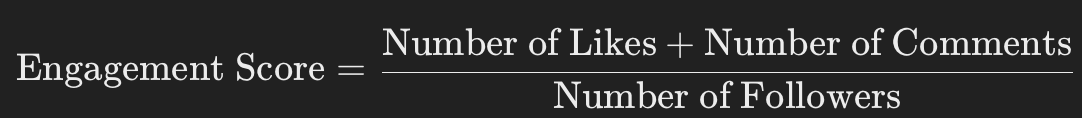

In [20]:
# Calculate the engagement score

IG_data['engagement_score']=((IG_data['number_of_likes'] + IG_data['number_of_comments']) / IG_data['number_of_followers'])
FB_data['engagement_score']=((FB_data['total_likes'] + FB_data['number_of_comments']) / FB_data['number_of_followers'])

# Ensure that the outcome is saved as float
FB_data['engagement_score'] = FB_data['engagement_score'].astype(float)
IG_data['engagement_score'] = IG_data['engagement_score'].astype(float)

# Display with the Engagement Score
print("\nDataFrame with Engagement Scores:\n")
display(FB_data,IG_data.head())


DataFrame with Engagement Scores:



,date,time,day,caption,profile,network,number_of_followers,number_of_likes,total_likes,number_of_comments,...,post comments positive sentiment share,post comments negative sentiment share,engagement,weighted engagement,message-id,profile-id,link,external links,contentpurpose,engagement_score
0,2021-12-31,18:00,Friday,What's the first game you're playing in 2022?,Insomniac Games,FACEBOOK,271113,728,995,203,...,0.305419,0.054187,0.004511,0.005444,91127584852_10160103901729853,91127584852,https://www.facebook.com/insomniacgames/photos...,<NA>,Informative,0.004419
1,2021-12-31,16:00,Friday,Fungi and ferns and moths and Fireflies -- the...,Naughty Dog,FACEBOOK,1506484,850,1138,14,...,0.5,0.071429,0.000803,0.000888,57327290245_10165832084200246,57327290245,https://www.facebook.com/naughtydog/photos/a.1...,<NA>,Informative,0.000765
2,2021-12-31,16:00,Friday,How did the creators of NEO: The World Ends wi...,Square Enix,FACEBOOK,1792534,237,291,24,...,0.458333,0.375,0.000183,0.00021,59916854460_10159833755834461,59916854460,https://www.facebook.com/SquareEnix/photos/a.1...,<NA>,Informative,0.000176
3,2021-12-31,14:00,Friday,Yesterday was a journey. Tomorrow's a new adve...,Square Enix,FACEBOOK,1792534,478,664,50,...,0.48,0.36,0.000460,0.000606,59916854460_10159832301434461,59916854460,https://www.facebook.com/867403448085191/video...,<NA>,Entertainment,0.000398
4,2021-12-31,13:00,Friday,Happy New Year!,CD PROJEKT RED,FACEBOOK,482793,6630,8950,214,...,0.565421,0.17757,0.019262,0.020235,283103815139159_4671320582984105,283103815139159,https://www.facebook.com/283103815139159/posts...,<NA>,Informative,0.018981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11807,2024-01-04,15:00,Thursday,let's make a game! ?? Character: first pet's...,Ubisoft,FACEBOOK,140315,32,43,32,...,0.1875,0.5625,0.000036,0.000052,81174647292_930288085122399,81174647292,https://www.facebook.com/820219539462588/posts...,<NA>,Social/Interactive,0.000535
11808,2024-01-04,15:00,Thursday,New GTA Online Wildlife Photography Challenge ...,Rockstar Games,FACEBOOK,1760512,5222,6415,1692,...,0.349882,0.359929,0.000622,0.000793,51752540096_940652457431417,51752540096,https://www.facebook.com/826068865556444/posts...,<NA>,Reward-Based,0.004605
11809,2024-01-04,13:00,Thursday,Playing Horizon Forbidden West on PS5? Make su...,Guerrilla Games,FACEBOOK,5681609,745,968,25,...,0.56,0.2,0.005155,0.005465,179751088724627_921738602655525,179751088724627,https://www.facebook.com/777512863744767/posts...,<NA>,Informative,0.000175
11810,2024-01-04,00:00,Thursday,???? INS??MNIAC GAMES ????,Insomniac Games,FACEBOOK,197766,1658,2455,106,...,0.584906,0.075472,0.008810,0.009394,91127584852_755461433277816,91127584852,https://www.facebook.com/459736079517021/posts...,<NA>,Informative,0.012950


,date,time,day,caption,profile,network,number_of_followers,number_of_likes,number_of_comments,"reactions, comments & shares",number of posts,picture_posts,video_posts,engagement,message-id,profile-id,link,external links,contentpurpose,engagement_score
0,2021-12-31,18:00,Friday,What is the first game you are going to play i...,Insomniac Games,INSTAGRAM,597380,8190,295,8485,1,1,0,0.014204,18159887410207560,302534790,https://www.instagram.com/p/CYKA__hjRC2/,<NA>,Informative,0.014204
1,2021-12-31,16:00,Friday,Fungi and ferns and moths and Fireflies -- the...,Naughty Dog,INSTAGRAM,1208699,19992,35,20027,1,1,0,0.016569,17918878019040680,1593309399,https://www.instagram.com/p/CYJzRfyAaSI/,<NA>,Informative,0.016569
2,2021-12-31,14:00,Friday,Yesterday was a journey. Tomorrow's a new adve...,Square Enix,INSTAGRAM,1059895,3167,79,3246,1,0,1,0.003063,17864704832649000,2117884847,https://www.instagram.com/tv/CYJlmkOhnw0/,<NA>,Entertainment,0.003063
3,2021-12-30,18:00,Thursday,It's always bad luck when a Black Cat... judo ...,Insomniac Games,INSTAGRAM,597380,42010,341,42351,1,1,0,0.070946,17902246271425140,302534790,https://www.instagram.com/p/CYHcUnih3H8/,<NA>,Informative,0.070895
4,2021-12-30,15:00,Thursday,Mammoth’s Patriot Mil-Spec is the internationa...,Rockstar Games,INSTAGRAM,21721887,156874,2163,159037,1,1,0,0.007325,18189250981149360,184595688,https://www.instagram.com/p/CYHInoNtmzo/,<NA>,Informative,0.007322


#### Add the media type column

In [21]:
# Function to classify media type based on caption, photo and video
def classify_media_type(row):
    has_caption = pd.notna(row['caption']) and row['caption'].strip() != ""
    has_picture = row['picture_posts'] == 1
    has_video = row['video_posts'] == 1

    if has_caption and has_picture and not has_video:
        return "Text + Photo"
    elif has_caption and has_video and not has_picture:
        return "Text + Video"
    elif not has_caption and has_picture and not has_video:
        return "Photo Only"
    elif has_caption and not has_picture and not has_video:
        return "Text Only"
    elif not has_caption and has_video and not has_picture:
        return "Video Only"
    else:
        return "Other"

# Add the column
FB_data['media_type'] = FB_data.apply(classify_media_type, axis=1)
IG_data['media_type'] = IG_data.apply(classify_media_type, axis=1)

# Display 
display(FB_data.head(),IG_data.head())

,date,time,day,caption,profile,network,number_of_followers,number_of_likes,total_likes,number_of_comments,...,post comments negative sentiment share,engagement,weighted engagement,message-id,profile-id,link,external links,contentpurpose,engagement_score,media_type
0,2021-12-31,18:00,Friday,What's the first game you're playing in 2022?,Insomniac Games,FACEBOOK,271113,728,995,203,...,0.054187,0.004511,0.005444,91127584852_10160103901729853,91127584852,https://www.facebook.com/insomniacgames/photos...,<NA>,Informative,0.004419,Text + Photo
1,2021-12-31,16:00,Friday,Fungi and ferns and moths and Fireflies -- the...,Naughty Dog,FACEBOOK,1506484,850,1138,14,...,0.071429,0.000803,0.000888,57327290245_10165832084200246,57327290245,https://www.facebook.com/naughtydog/photos/a.1...,<NA>,Informative,0.000765,Text + Photo
2,2021-12-31,16:00,Friday,How did the creators of NEO: The World Ends wi...,Square Enix,FACEBOOK,1792534,237,291,24,...,0.375,0.000183,0.00021,59916854460_10159833755834461,59916854460,https://www.facebook.com/SquareEnix/photos/a.1...,<NA>,Informative,0.000176,Text + Photo
3,2021-12-31,14:00,Friday,Yesterday was a journey. Tomorrow's a new adve...,Square Enix,FACEBOOK,1792534,478,664,50,...,0.36,0.000460,0.000606,59916854460_10159832301434461,59916854460,https://www.facebook.com/867403448085191/video...,<NA>,Entertainment,0.000398,Text + Video
4,2021-12-31,13:00,Friday,Happy New Year!,CD PROJEKT RED,FACEBOOK,482793,6630,8950,214,...,0.17757,0.019262,0.020235,283103815139159_4671320582984105,283103815139159,https://www.facebook.com/283103815139159/posts...,<NA>,Informative,0.018981,Text + Photo


,date,time,day,caption,profile,network,number_of_followers,number_of_likes,number_of_comments,"reactions, comments & shares",...,picture_posts,video_posts,engagement,message-id,profile-id,link,external links,contentpurpose,engagement_score,media_type
0,2021-12-31,18:00,Friday,What is the first game you are going to play i...,Insomniac Games,INSTAGRAM,597380,8190,295,8485,...,1,0,0.014204,18159887410207560,302534790,https://www.instagram.com/p/CYKA__hjRC2/,<NA>,Informative,0.014204,Text + Photo
1,2021-12-31,16:00,Friday,Fungi and ferns and moths and Fireflies -- the...,Naughty Dog,INSTAGRAM,1208699,19992,35,20027,...,1,0,0.016569,17918878019040680,1593309399,https://www.instagram.com/p/CYJzRfyAaSI/,<NA>,Informative,0.016569,Text + Photo
2,2021-12-31,14:00,Friday,Yesterday was a journey. Tomorrow's a new adve...,Square Enix,INSTAGRAM,1059895,3167,79,3246,...,0,1,0.003063,17864704832649000,2117884847,https://www.instagram.com/tv/CYJlmkOhnw0/,<NA>,Entertainment,0.003063,Text + Video
3,2021-12-30,18:00,Thursday,It's always bad luck when a Black Cat... judo ...,Insomniac Games,INSTAGRAM,597380,42010,341,42351,...,1,0,0.070946,17902246271425140,302534790,https://www.instagram.com/p/CYHcUnih3H8/,<NA>,Informative,0.070895,Text + Photo
4,2021-12-30,15:00,Thursday,Mammoth’s Patriot Mil-Spec is the internationa...,Rockstar Games,INSTAGRAM,21721887,156874,2163,159037,...,1,0,0.007325,18189250981149360,184595688,https://www.instagram.com/p/CYHInoNtmzo/,<NA>,Informative,0.007322,Text + Photo


##### Drop unnecessary columns

In [22]:
# Dropping the unnecessary columns
columns_to_drop_FB = [
    'number of comments (primary)','reactions, comments & shares', 
    'number of posts', 'post comments positive sentiment share', 'post comments negative sentiment share', 'engagement', 
    'weighted engagement', 'message-id', 'profile-id', 'number of haha','number of love', 'number of angry', 'number of care','number of sad','number of thankful','number of wow',
]

columns_to_drop_IG = [
    'reactions, comments & shares', 
    'number of posts', 'engagement', 
    'message-id', 'profile-id'
]

FB_data = FB_data.drop(columns=columns_to_drop_FB)
IG_data = IG_data.drop(columns=columns_to_drop_IG)

In [23]:
# Check the data after dropping the columns
display(FB_data,IG_data.head())

,date,time,day,caption,profile,network,number_of_followers,number_of_likes,total_likes,number_of_comments,shares per post,picture_posts,video_posts,link,external links,contentpurpose,engagement_score,media_type
0,2021-12-31,18:00,Friday,What's the first game you're playing in 2022?,Insomniac Games,FACEBOOK,271113,728,995,203,25,1,0,https://www.facebook.com/insomniacgames/photos...,<NA>,Informative,0.004419,Text + Photo
1,2021-12-31,16:00,Friday,Fungi and ferns and moths and Fireflies -- the...,Naughty Dog,FACEBOOK,1506484,850,1138,14,57,1,0,https://www.facebook.com/naughtydog/photos/a.1...,<NA>,Informative,0.000765,Text + Photo
2,2021-12-31,16:00,Friday,How did the creators of NEO: The World Ends wi...,Square Enix,FACEBOOK,1792534,237,291,24,12,1,0,https://www.facebook.com/SquareEnix/photos/a.1...,<NA>,Informative,0.000176,Text + Photo
3,2021-12-31,14:00,Friday,Yesterday was a journey. Tomorrow's a new adve...,Square Enix,FACEBOOK,1792534,478,664,50,106,0,1,https://www.facebook.com/867403448085191/video...,<NA>,Entertainment,0.000398,Text + Video
4,2021-12-31,13:00,Friday,Happy New Year!,CD PROJEKT RED,FACEBOOK,482793,6630,8950,214,128,1,0,https://www.facebook.com/283103815139159/posts...,<NA>,Informative,0.018981,Text + Photo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11807,2024-01-04,15:00,Thursday,let's make a game! ?? Character: first pet's...,Ubisoft,FACEBOOK,140315,32,43,32,1,1,0,https://www.facebook.com/820219539462588/posts...,<NA>,Social/Interactive,0.000535,Text + Photo
11808,2024-01-04,15:00,Thursday,New GTA Online Wildlife Photography Challenge ...,Rockstar Games,FACEBOOK,1760512,5222,6415,1692,329,1,0,https://www.facebook.com/826068865556444/posts...,<NA>,Reward-Based,0.004605,Text + Photo
11809,2024-01-04,13:00,Thursday,Playing Horizon Forbidden West on PS5? Make su...,Guerrilla Games,FACEBOOK,5681609,745,968,25,18,1,0,https://www.facebook.com/777512863744767/posts...,<NA>,Informative,0.000175,Text + Photo
11810,2024-01-04,00:00,Thursday,???? INS??MNIAC GAMES ????,Insomniac Games,FACEBOOK,197766,1658,2455,106,33,1,0,https://www.facebook.com/459736079517021/posts...,<NA>,Informative,0.012950,Text + Photo


,date,time,day,caption,profile,network,number_of_followers,number_of_likes,number_of_comments,picture_posts,video_posts,link,external links,contentpurpose,engagement_score,media_type
0,2021-12-31,18:00,Friday,What is the first game you are going to play i...,Insomniac Games,INSTAGRAM,597380,8190,295,1,0,https://www.instagram.com/p/CYKA__hjRC2/,<NA>,Informative,0.014204,Text + Photo
1,2021-12-31,16:00,Friday,Fungi and ferns and moths and Fireflies -- the...,Naughty Dog,INSTAGRAM,1208699,19992,35,1,0,https://www.instagram.com/p/CYJzRfyAaSI/,<NA>,Informative,0.016569,Text + Photo
2,2021-12-31,14:00,Friday,Yesterday was a journey. Tomorrow's a new adve...,Square Enix,INSTAGRAM,1059895,3167,79,0,1,https://www.instagram.com/tv/CYJlmkOhnw0/,<NA>,Entertainment,0.003063,Text + Video
3,2021-12-30,18:00,Thursday,It's always bad luck when a Black Cat... judo ...,Insomniac Games,INSTAGRAM,597380,42010,341,1,0,https://www.instagram.com/p/CYHcUnih3H8/,<NA>,Informative,0.070895,Text + Photo
4,2021-12-30,15:00,Thursday,Mammoth’s Patriot Mil-Spec is the internationa...,Rockstar Games,INSTAGRAM,21721887,156874,2163,1,0,https://www.instagram.com/p/CYHInoNtmzo/,<NA>,Informative,0.007322,Text + Photo


In [24]:
# Count how often each category appears per profile
category_countsFB = FB_data.groupby(["profile", "contentpurpose"]).size().unstack(fill_value=0)
category_countsIG = IG_data.groupby(["profile", "contentpurpose"]).size().unstack(fill_value=0)

# Convert to percentages
category_percentagesFB = category_countsFB.div(category_countsFB.sum(axis=1), axis=0) * 100
category_percentagesIG = category_countsIG.div(category_countsIG.sum(axis=1), axis=0) * 100
category_percentagesFB = category_percentagesFB.round(2)
category_percentagesIG = category_percentagesIG.round(2)

# Show results
display(category_percentagesFB)
display(category_percentagesIG)

contentpurpose,Entertainment,Informative,Promotion,Reward-Based,Social/Interactive,Unknown
profile,,,,,,
Bethesda,14.32,43.88,4.85,2.08,20.09,14.78
CD PROJEKT RED,8.71,64.92,7.19,1.53,11.55,6.10
Electronic Arts (EA),13.53,30.83,2.76,0.50,14.04,38.35
Guerrilla Games,8.39,35.42,2.17,0.63,49.40,3.99
Insomniac Games,12.98,54.15,7.27,1.34,22.55,1.71
Naughty Dog,17.40,34.02,3.05,0.20,36.97,8.36
Obsidian Entertainment,20.00,48.15,2.59,0.74,17.41,11.11
Rockstar Games,10.07,38.96,2.54,30.82,11.90,5.70
Santa Monica Studio,5.91,77.78,1.42,1.18,8.75,4.96


contentpurpose,Entertainment,Informative,Promotion,Reward-Based,Social/Interactive,Unknown
profile,,,,,,
Bethesda,10.39,52.36,5.77,3.04,28.02,0.42
CD PROJEKT RED,7.98,61.03,7.51,2.35,20.19,0.94
Electronic Arts (EA),17.87,45.77,5.64,1.57,28.53,0.63
Guerrilla Games,9.49,35.53,2.76,0.77,51.45,0.00
Insomniac Games,13.95,53.45,8.49,1.52,22.29,0.30
Naughty Dog,14.37,40.07,4.91,0.47,39.72,0.47
Obsidian Entertainment,30.67,49.33,0.67,0.67,18.67,0.00
Rockstar Games,6.95,58.32,1.87,26.90,5.84,0.11
Santa Monica Studio,7.84,76.47,2.16,1.37,11.18,0.98


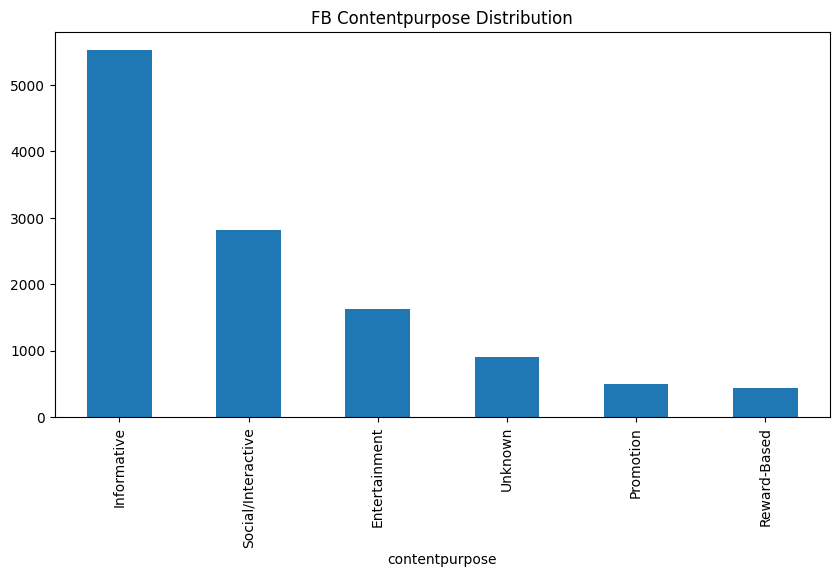

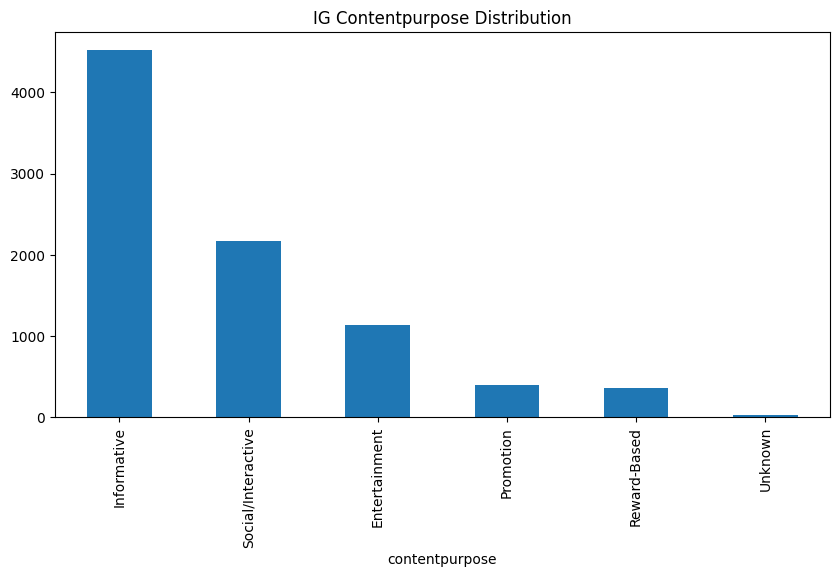

In [24]:
# FB_data contentpurpose distribution
FB_data["contentpurpose"].value_counts().plot(kind='bar', figsize=(10, 5), title="FB Contentpurpose Distribution")
plt.show()

# IG_data contentpurpose distributie
IG_data["contentpurpose"].value_counts().plot(kind='bar', figsize=(10, 5), title="IG Contentpurpose Distribution")
plt.show()


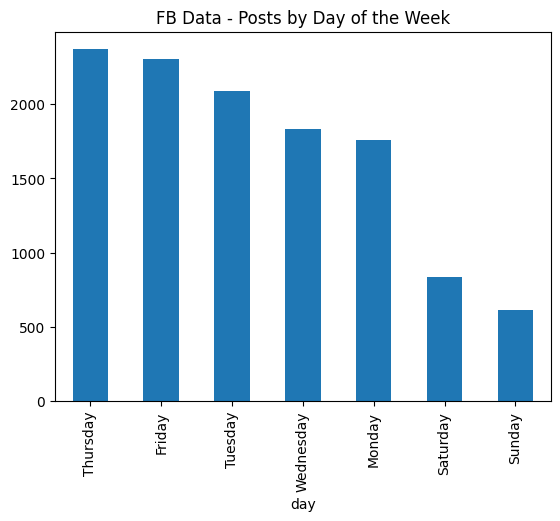

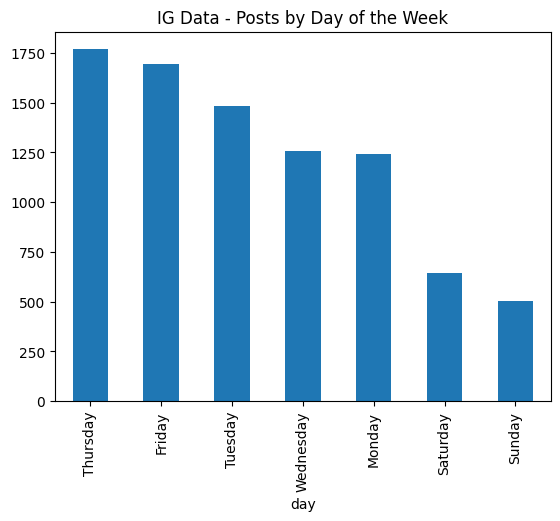

In [25]:
# Day of the week distribution
FB_data["day"].value_counts().plot(kind='bar', title="FB Data - Posts by Day of the Week")
plt.show()

IG_data["day"].value_counts().plot(kind='bar', title="IG Data - Posts by Day of the Week")
plt.show()


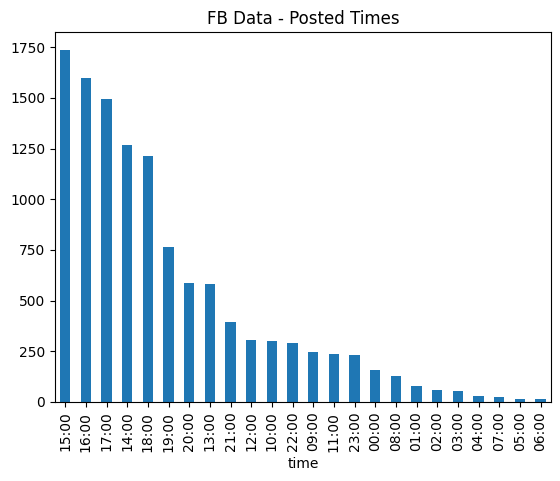

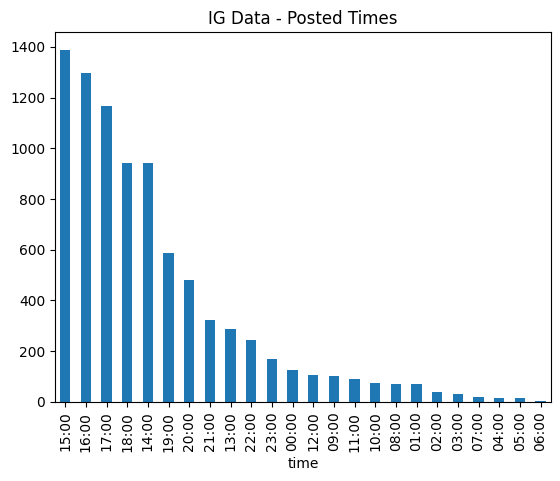

In [26]:
# Time of the day distribution
FB_data["time"].value_counts().plot(kind='bar', title="FB Data - Posted Times")
plt.show()

IG_data["time"].value_counts().plot(kind='bar', title="IG Data - Posted Times")
plt.show()

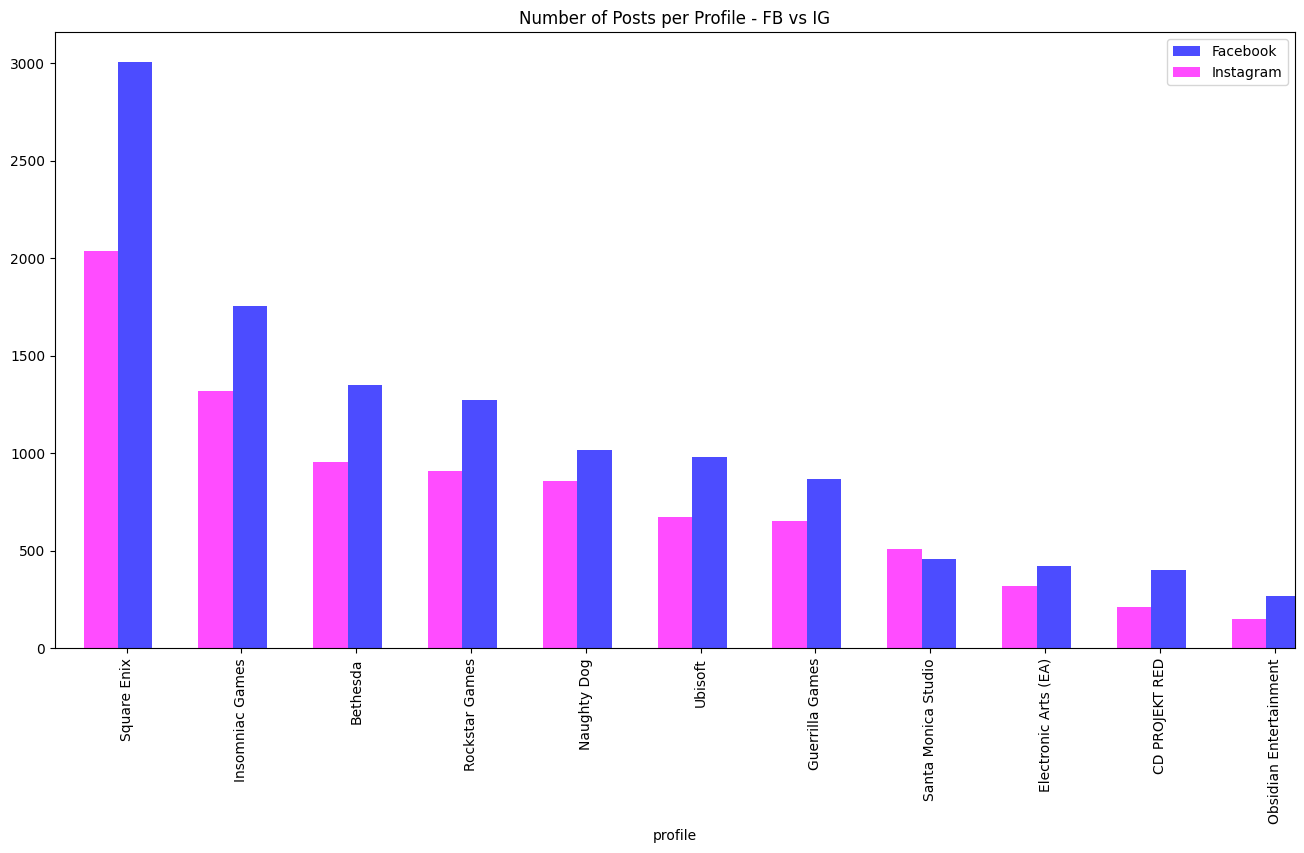

In [27]:
# Number of posts per profile by platform
FB_profiles = FB_data["profile"].value_counts()
IG_profiles = IG_data["profile"].value_counts()

# Graphic Compare
plt.figure(figsize=(16, 8))
FB_profiles.plot(kind='bar', alpha=0.7, color='blue', label='Facebook', width=0.3, position=0.25)
IG_profiles.plot(kind='bar', alpha=0.7, color='fuchsia', label='Instagram', width=0.3, position=1.25)
plt.title("Number of Posts per Profile - FB vs IG")
plt.legend()
plt.show()


# Sub-Question 1: "What is the influence of the type of media (text posts, links, photos, or videos) on customer engagement?" ##

-  (H₀): The presence of media (e.g. links, photos or videos) in marketer-generated content has no significant effect on customer engagement.

- (H₁): The presence of media (e.g. links, photos or videos) in marketer-generated content significantly affects customer engagement on social media.

ANOVA

In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Step 2: Convert engagement to numeric
# Replace any non-numeric values (e.g., "-") with NaN and convert to float
FB_data['engagement'] = pd.to_numeric(FB_data['engagement'], errors='coerce')

# Check for NaN values after conversion
print("Number of NaN values in engagement:", FB_data['engagement'].isna().sum())

# Drop rows with NaN in engagement (alternatively, you could impute them)
FB_data = FB_data.dropna(subset=['engagement'])

# Verify the data type of engagement
print("Engagement column data type after conversion:", FB_data['engagement'].dtype)
print("Sample engagement values after conversion:", FB_data['engagement'].head().tolist())

# Step 3: Categorize posts into 6 groups based on media type
def categorize_post(row):
    has_caption = pd.notna(row['caption']) and row['caption'].strip() != ""
    has_picture = row['picture posts'] == 1
    has_video = row['video-posts'] == 1

    if has_caption and has_picture and not has_video:
        return "Text + Photo"
    elif has_caption and has_video and not has_picture:
        return "Text + Video"
    elif not has_caption and has_picture and not has_video:
        return "Photo Only"
    elif has_caption and not has_picture and not has_video:
        return "Text Only"
    elif not has_caption and has_video and not has_picture:
        return "Video Only"
    else:
        return "Other"

# Apply categorization
FB_data['group'] = FB_data.apply(categorize_post, axis=1)

# Step 4: Check the distribution of groups
print("Group Distribution:")
print(FB_data['group'].value_counts())

# Step 5: Perform one-way ANOVA
# Initialize p_value with a default value
p_value = 0.05  # Default value indicating no significance

# We need at least 2 data points per group for ANOVA, so we'll filter groups accordingly
groups = FB_data['group'].unique()
group_data = {group: FB_data[FB_data['group'] == group]['engagement'].values for group in groups}

# Filter groups with at least 2 data points
valid_groups = [group for group in groups if len(group_data[group]) >= 2]
if len(valid_groups) < 2:
    print("Not enough groups with sufficient data for ANOVA. Performing t-tests instead.")
else:
    # Prepare data for ANOVA
    anova_df = FB_data[FB_data['group'].isin(valid_groups)]

    # Perform ANOVA
    model = ols('engagement ~ C(group)', data=anova_df).fit()
    anova_table = anova_lm(model, typ=2)
    print("\nANOVA Results:")
    print(anova_table)

    # Extract the p-value
    p_value = anova_table['PR(>F)'][0]
    if p_value < 0.05:
        print("Significant differences found. Performing Tukey's HSD post-hoc test...")
        # Perform Tukey's HSD
        tukey = pairwise_tukeyhsd(endog=anova_df['engagement'], groups=anova_df['group'], alpha=0.05)
        print(tukey)
    else:
        print("No significant differences found (p-value > 0.05).")

# Step 6: Summary statistics for each group
print("\nSummary Statistics:")
for group in groups:
    engagements = group_data[group]
    print(f"{group}:")
    print(f"  Count: {len(engagements)}")
    print(f"  Mean Engagement: {np.mean(engagements):.6f}")
    print(f"  Std Dev: {np.std(engagements, ddof=1):.6f}\n")

# Step 7: Conclusion
if p_value < 0.05:
    print("Conclusion: Reject H₀. The type of media significantly affects customer engagement.")
else:
    print("Conclusion: Fail to reject H₀. The type of media does not significantly affect customer engagement.")

# Step 8: Identify the best media type for engagement
# Find the group with the highest mean engagement
mean_engagements = {group: np.mean(group_data[group]) for group in groups}
best_media_type = max(mean_engagements, key=mean_engagements.get)
print(f"\nBest Media Type for Engagement: {best_media_type} with mean engagement of {mean_engagements[best_media_type]:.6f}")

Number of NaN values in engagement: 0
Engagement column data type after conversion: float64
Sample engagement values after conversion: [0.00450925026822566, 0.0008055605787318941, 0.00018121286926012432, 0.00045922431053950415, 0.019259003243199468]
Group Distribution:
group
Text + Photo    6834
Text + Video    3448
Text Only        379
Name: count, dtype: int64

ANOVA Results:
            sum_sq       df          F        PR(>F)
C(group)  0.001164      2.0  13.974753  8.685319e-07
Residual  0.443818  10658.0        NaN           NaN
Significant differences found. Performing Tukey's HSD post-hoc test...
      Multiple Comparison of Means - Tukey HSD, FWER=0.05       
   group1       group2    meandiff p-adj   lower   upper  reject
----------------------------------------------------------------
Text + Photo Text + Video  -0.0006    0.0 -0.0009 -0.0003   True
Text + Photo    Text Only  -0.0011 0.0033 -0.0019 -0.0003   True
Text + Video    Text Only  -0.0005 0.3382 -0.0013  0.0003  False

Q-Q Plot

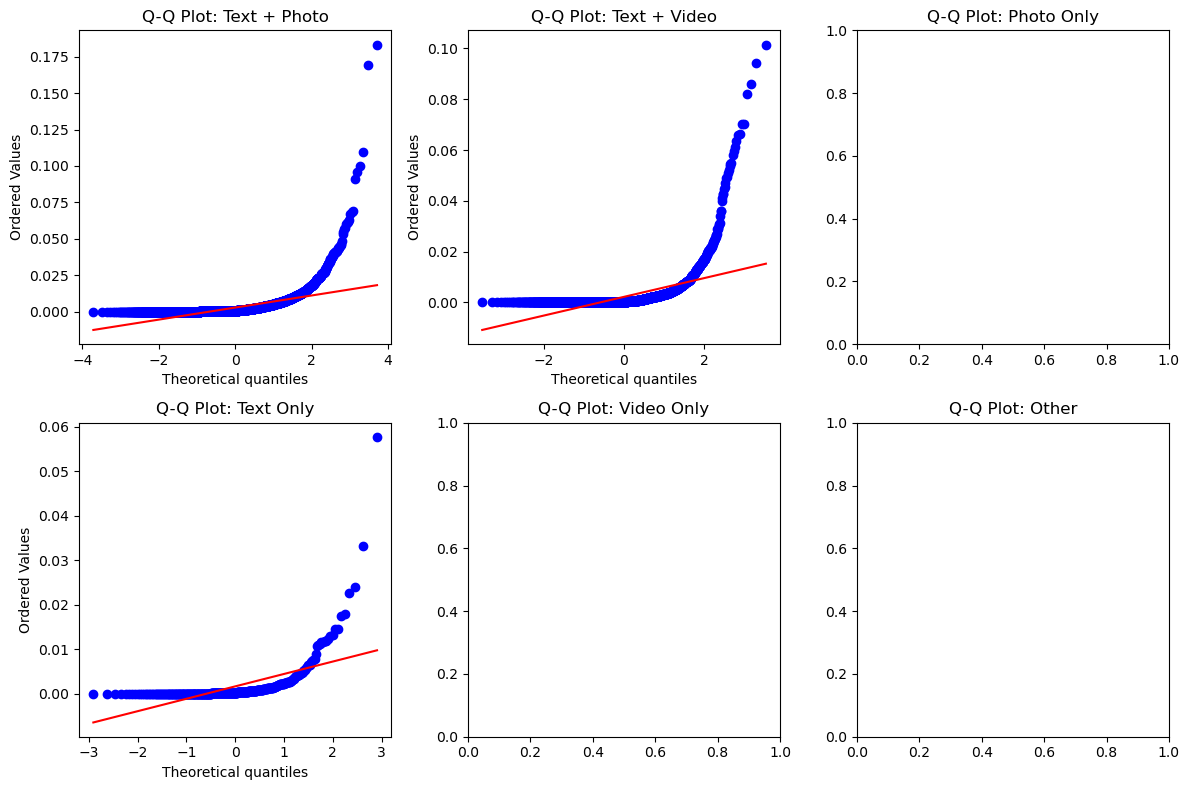

In [ ]:
plt.figure(figsize=(12, 8))
for i, group in enumerate(["Text + Photo", "Text + Video", "Photo Only", "Text Only", "Video Only", "Other"]):
    engagements = FB_data[FB_data['group'] == group]['engagement'].dropna()
    
    plt.subplot(2, 3, i + 1)
    stats.probplot(engagements, dist="norm", plot=plt)
    plt.title(f"Q-Q Plot: {group}")

plt.tight_layout()
plt.show()

Kruskal-Wallis

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats

# Step 2: Convert engagement to numeric
FB_data['engagement'] = pd.to_numeric(FB_data['engagement'], errors='coerce')

# Check for NaN values after conversion
print("Number of NaN values in engagement:", FB_data['engagement'].isna().sum())

# Drop rows with NaN in engagement (alternatively, you could impute them)
FB_data = FB_data.dropna(subset=['engagement'])

# Verify the data type of engagement
print("Engagement column data type after conversion:", FB_data['engagement'].dtype)
print("Sample engagement values after conversion:", FB_data['engagement'].head().tolist())

# Step 3: Categorize posts into 6 groups
def categorize_post(row):
    has_caption = pd.notna(row['caption']) and row['caption'].strip() != ""
    has_picture = row['picture posts'] == 1
    has_video = row['video-posts'] == 1

    if has_caption and has_picture and not has_video:
        return "Text + Photo"
    elif has_caption and has_video and not has_picture:
        return "Text + Video"
    elif not has_caption and has_picture and not has_video:
        return "Photo Only"
    elif has_caption and not has_picture and not has_video:
        return "Text Only"
    elif not has_caption and has_video and not has_picture:
        return "Video Only"
    else:
        return "Other"

# Apply categorization
FB_data['group'] = FB_data.apply(categorize_post, axis=1)

# Step 4: Check the distribution of groups
print("Group Distribution:")
print(FB_data['group'].value_counts())

# Step 5: Perform Kruskal-Wallis test
# We need at least 2 data points per group for Kruskal-Wallis
groups = FB_data['group'].unique()
group_data = {group: FB_data[FB_data['group'] == group]['engagement'].dropna() for group in groups}

# Filter groups with at least 2 data points
valid_groups = [group for group in groups if len(group_data[group]) >= 2]
if len(valid_groups) < 2:
    print("Not enough groups with sufficient data for Kruskal-Wallis test.")
else:
    # Prepare data for Kruskal-Wallis test
    group_values = [group_data[group] for group in valid_groups]
    
    # Perform Kruskal-Wallis test
    kruskal_result = stats.kruskal(*group_values)
    print(f"Kruskal-Wallis H-statistic: {kruskal_result.statistic:.4f}")
    print(f"p-value: {kruskal_result.pvalue:.4f}")

    # Check for significance
    if kruskal_result.pvalue < 0.05:
        print("Significant differences found. Perform post-hoc tests.")
        # Post-hoc: Dunn's test (requires `scipy` or `statsmodels`)
        from statsmodels.stats.multitest import multipletests
        from scipy.stats import rankdata
        
        # Compute ranks of all engagement values across groups
        all_values = np.concatenate(group_values)
        ranks = rankdata(all_values)
        
        # Calculate pairwise comparisons between groups (post-hoc tests)
        pvals = []
        for i, group1 in enumerate(valid_groups):
            for j, group2 in enumerate(valid_groups):
                if i < j:
                    # Mann-Whitney U test for each pair
                    _, p = stats.mannwhitneyu(group_data[group1], group_data[group2], alternative='two-sided')
                    pvals.append(p)

        # Apply multiple testing correction (Bonferroni or FDR)
        corrected_pvals = multipletests(pvals, method='fdr_bh')[1]

        for i, (group1, group2) in enumerate([(g1, g2) for i, g1 in enumerate(valid_groups) for j, g2 in enumerate(valid_groups) if i < j]):
            print(f"Pairwise comparison between {group1} and {group2} - p-value: {corrected_pvals[i]:.4f}")
    else:
        print("No significant differences found (p-value > 0.05).")

# Step 6: Summary statistics for each group
print("\nSummary Statistics:")
for group in valid_groups:
    engagements = group_data[group]
    print(f"{group}:")
    print(f"  Count: {len(engagements)}")
    print(f"  Mean Engagement: {np.mean(engagements):.6f}")
    print(f"  Std Dev: {np.std(engagements, ddof=1):.6f}\n")

# Step 7: Conclusion
if kruskal_result.pvalue < 0.05:
    print("Conclusion: Reject H₀. The type of media significantly affects customer engagement.")
else:
    print("Conclusion: Fail to reject H₀. The type of media does not significantly affect customer engagement.")


Number of NaN values in engagement: 0
Engagement column data type after conversion: float64
Sample engagement values after conversion: [0.00450925026822566, 0.0008055605787318941, 0.00018121286926012432, 0.00045922431053950415, 0.019259003243199468]
Group Distribution:
group
Text + Photo    6834
Text + Video    3448
Text Only        379
Name: count, dtype: int64
Kruskal-Wallis H-statistic: 266.2603
p-value: 0.0000
Significant differences found. Perform post-hoc tests.
Pairwise comparison between Text + Photo and Text + Video - p-value: 0.0000
Pairwise comparison between Text + Photo and Text Only - p-value: 0.0000
Pairwise comparison between Text + Video and Text Only - p-value: 0.2705

Summary Statistics:
Text + Photo:
  Count: 6834
  Mean Engagement: 0.002817
  Std Dev: 0.006574

Text + Video:
  Count: 3448
  Mean Engagement: 0.002201
  Std Dev: 0.006384

Text Only:
  Count: 379
  Mean Engagement: 0.001711
  Std Dev: 0.004592

Conclusion: Reject H₀. The type of media significantly af

Conclusion:
Reject H₀: The type of media significantly affects customer engagement, as evidenced by the significant differences found in the Kruskal-Wallis test and pairwise comparisons.

Important Findings:

Text + Photo and Text + Video show significant differences in engagement compared to Text Only.

However, there is no significant difference between Text + Video and Text Only, which suggests that the presence of video (in combination with text) does not result in a significant difference in engagement when compared to posts that only contain text.

This suggests that engagement is influenced more by the combination of text and photos, and less by the combination of text and video, relative to text-only posts.

## Instagram ##

In [ ]:
# Step 2: Convert engagement to numeric
# Replace any non-numeric values (e.g., "-") with NaN and convert to float
IG_data['engagement'] = pd.to_numeric(IG_data['engagement'], errors='coerce')

# Check for NaN values after conversion
print("Number of NaN values in engagement:", IG_data['engagement'].isna().sum())

# Drop rows with NaN in engagement (alternatively, you could impute them)
IG_data = IG_data.dropna(subset=['engagement'])

# Verify the data type of engagement
print("Engagement column data type after conversion:", IG_data['engagement'].dtype)
print("Sample engagement values after conversion:", IG_data['engagement'].head().tolist())

# Step 3: Categorize posts into 6 groups
def categorize_post(row):
    has_caption = pd.notna(row['caption']) and row['caption'].strip() != ""
    has_picture = row['picture posts'] == 1
    has_video = row['video-posts'] == 1

    if has_caption and has_picture and not has_video:
        return "Text + Photo"
    elif has_caption and has_video and not has_picture:
        return "Text + Video"
    elif not has_caption and has_picture and not has_video:
        return "Photo Only"
    elif has_caption and not has_picture and not has_video:
        return "Text Only"
    elif not has_caption and has_video and not has_picture:
        return "Video Only"
    else:
        return "Other"

# Apply categorization
IG_data['group'] = IG_data.apply(categorize_post, axis=1)

# Step 4: Check the distribution of groups
print("Group Distribution:")
print(IG_data['group'].value_counts())

# Step 5: Perform one-way ANOVA
# Initialize p_value with a default value
p_value = 0.05  # Default value indicating no significance

# We need at least 2 data points per group for ANOVA, so we'll filter groups accordingly
groups = IG_data['group'].unique()
group_data = {group: IG_data[IG_data['group'] == group]['engagement'].values for group in groups}

# Filter groups with at least 2 data points
valid_groups = [group for group in groups if len(group_data[group]) >= 2]
if len(valid_groups) < 2:
    print("Not enough groups with sufficient data for ANOVA. Performing t-tests instead.")
else:
    # Prepare data for ANOVA
    anova_df = FB_data[FB_data['group'].isin(valid_groups)]

    # Perform ANOVA
    model = ols('engagement ~ C(group)', data=anova_df).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    print("\nANOVA Results:")
    print(anova_table)

    # Extract the p-value
    p_value = anova_table['PR(>F)'][0]
    if p_value < 0.05:
        print("Significant differences found. Performing Tukey's HSD post-hoc test...")
        # Perform Tukey's HSD
        tukey = pairwise_tukeyhsd(endog=anova_df['engagement'], groups=anova_df['group'], alpha=0.05)
        print(tukey)
    else:
        print("No significant differences found (p-value > 0.05).")

# Step 6: Summary statistics for each group
print("\nSummary Statistics:")
for group in groups:
    engagements = group_data[group]
    print(f"{group}:")
    print(f"  Count: {len(engagements)}")
    print(f"  Mean Engagement: {np.mean(engagements):.6f}")
    print(f"  Std Dev: {np.std(engagements, ddof=1):.6f}\n")

# Step 7: Conclusion
if p_value < 0.05:
    print("Conclusion: Reject H₀. The type of media significantly affects customer engagement.")
else:
    print("Conclusion: Fail to reject H₀. The type of media does not significantly affect customer engagement.")

Number of NaN values in engagement: 803
Engagement column data type after conversion: float64
Sample engagement values after conversion: [0.01420368944390505, 0.01656905482671864, 0.003062567518480604, 0.0709456403383868, 0.007325304272551414]
Group Distribution:
group
Text + Photo    5850
Text + Video    1911
Photo Only        20
Video Only        10
Name: count, dtype: int64

ANOVA Results:
            sum_sq       df          F        PR(>F)
C(group)  0.008212      3.0  42.616975  2.250325e-27
Residual  0.713626  11110.0        NaN           NaN
Significant differences found. Performing Tukey's HSD post-hoc test...
      Multiple Comparison of Means - Tukey HSD, FWER=0.05       
   group1       group2    meandiff p-adj   lower   upper  reject
----------------------------------------------------------------
  Photo Only Text + Photo  -0.0032    0.0 -0.0041 -0.0024   True
  Photo Only Text + Video  -0.0038    0.0 -0.0047 -0.0029   True
  Photo Only   Video Only  -0.0048    0.0 -0.0064

Q-Q Plot

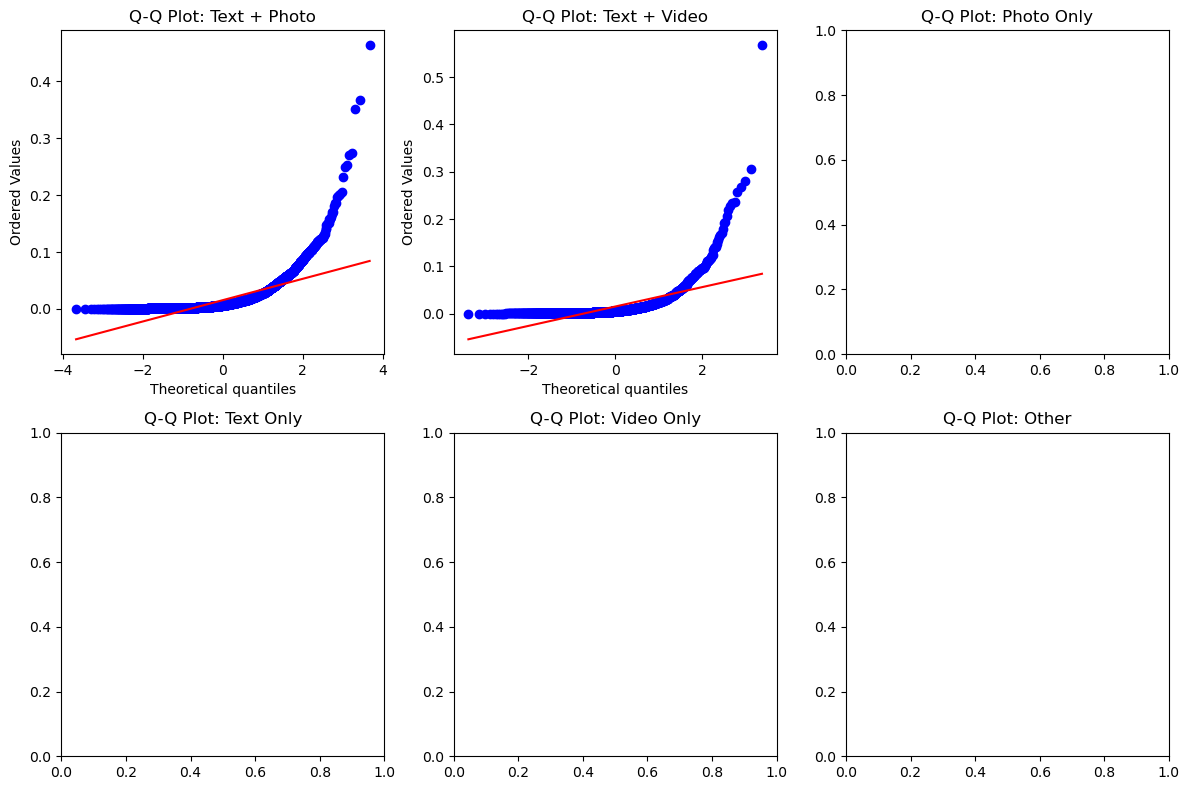

In [ ]:
plt.figure(figsize=(12, 8))
for i, group in enumerate(["Text + Photo", "Text + Video", "Photo Only", "Text Only", "Video Only", "Other"]):
    engagements = IG_data[IG_data['group'] == group]['engagement'].dropna()
    
    plt.subplot(2, 3, i + 1)
    stats.probplot(engagements, dist="norm", plot=plt)
    plt.title(f"Q-Q Plot: {group}")

plt.tight_layout()
plt.show()

Kruskal-Wallis

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats

# Step 2: Convert engagement to numeric for IG_data
IG_data['engagement'] = pd.to_numeric(IG_data['engagement'], errors='coerce')

# Check for NaN values after conversion
print("Number of NaN values in engagement:", IG_data['engagement'].isna().sum())

# Drop rows with NaN in engagement (alternatively, you could impute them)
IG_data = IG_data.dropna(subset=['engagement'])

# Verify the data type of engagement
print("Engagement column data type after conversion:", IG_data['engagement'].dtype)
print("Sample engagement values after conversion:", IG_data['engagement'].head().tolist())

# Step 3: Categorize posts into 6 groups for IG_data (same categorization logic as before)
def categorize_post(row):
    has_caption = pd.notna(row['caption']) and row['caption'].strip() != ""
    has_picture = row['picture posts'] == 1
    has_video = row['video-posts'] == 1

    if has_caption and has_picture and not has_video:
        return "Text + Photo"
    elif has_caption and has_video and not has_picture:
        return "Text + Video"
    elif not has_caption and has_picture and not has_video:
        return "Photo Only"
    elif has_caption and not has_picture and not has_video:
        return "Text Only"
    elif not has_caption and has_video and not has_picture:
        return "Video Only"
    else:
        return "Other"

# Apply categorization
IG_data['group'] = IG_data.apply(categorize_post, axis=1)

# Step 4: Check the distribution of groups in IG_data
print("Group Distribution in IG_data:")
print(IG_data['group'].value_counts())

# Step 5: Perform Kruskal-Wallis test
# We need at least 2 data points per group for Kruskal-Wallis
groups = IG_data['group'].unique()
group_data = {group: IG_data[IG_data['group'] == group]['engagement'].dropna() for group in groups}

# Filter groups with at least 2 data points
valid_groups = [group for group in groups if len(group_data[group]) >= 2]
if len(valid_groups) < 2:
    print("Not enough groups with sufficient data for Kruskal-Wallis test.")
else:
    # Prepare data for Kruskal-Wallis test
    group_values = [group_data[group] for group in valid_groups]
    
    # Perform Kruskal-Wallis test
    kruskal_result = stats.kruskal(*group_values)
    print(f"Kruskal-Wallis H-statistic: {kruskal_result.statistic:.4f}")
    print(f"p-value: {kruskal_result.pvalue:.4f}")

    # Check for significance
    if kruskal_result.pvalue < 0.05:
        print("Significant differences found. Perform post-hoc tests.")
        # Post-hoc: Dunn's test (requires `scipy` or `statsmodels`)
        from statsmodels.stats.multitest import multipletests
        from scipy.stats import rankdata
        
        # Compute ranks of all engagement values across groups
        all_values = np.concatenate(group_values)
        ranks = rankdata(all_values)
        
        # Calculate pairwise comparisons between groups (post-hoc tests)
        pvals = []
        for i, group1 in enumerate(valid_groups):
            for j, group2 in enumerate(valid_groups):
                if i < j:
                    # Mann-Whitney U test for each pair
                    _, p = stats.mannwhitneyu(group_data[group1], group_data[group2], alternative='two-sided')
                    pvals.append(p)

        # Apply multiple testing correction (Bonferroni or FDR)
        corrected_pvals = multipletests(pvals, method='fdr_bh')[1]

        for i, (group1, group2) in enumerate([(g1, g2) for i, g1 in enumerate(valid_groups) for j, g2 in enumerate(valid_groups) if i < j]):
            print(f"Pairwise comparison between {group1} and {group2} - p-value: {corrected_pvals[i]:.4f}")
    else:
        print("No significant differences found (p-value > 0.05).")

# Step 6: Summary statistics for each group
print("\nSummary Statistics for IG_data:")
for group in valid_groups:
    engagements = group_data[group]
    print(f"{group}:")
    print(f"  Count: {len(engagements)}")
    print(f"  Mean Engagement: {np.mean(engagements):.6f}")
    print(f"  Std Dev: {np.std(engagements, ddof=1):.6f}\n")

# Step 7: Conclusion
if kruskal_result.pvalue < 0.05:
    print("Conclusion: Reject H₀. The type of media significantly affects customer engagement on Instagram.")
else:
    print("Conclusion: Fail to reject H₀. The type of media does not significantly affect customer engagement on Instagram.")

Number of NaN values in engagement: 0
Engagement column data type after conversion: float64
Sample engagement values after conversion: [0.01420368944390505, 0.01656905482671864, 0.003062567518480604, 0.0709456403383868, 0.007325304272551414]
Group Distribution in IG_data:
group
Text + Photo    5850
Text + Video    1911
Name: count, dtype: int64
Kruskal-Wallis H-statistic: 47.0392
p-value: 0.0000
Significant differences found. Perform post-hoc tests.
Pairwise comparison between Text + Photo and Text + Video - p-value: 0.0000

Summary Statistics for IG_data:
Text + Photo:
  Count: 5850
  Mean Engagement: 0.015498
  Std Dev: 0.024802

Text + Video:
  Count: 1911
  Mean Engagement: 0.014856
  Std Dev: 0.030573

Conclusion: Reject H₀. The type of media significantly affects customer engagement on Instagram.


Reject H₀: The type of media significantly affects customer engagement on Instagram. The significant difference between Text + Photo and Text + Video suggests that the presence of photos in posts leads to a slightly higher mean engagement than posts with videos.`

While both Text + Photo and Text + Video groups have relatively close mean engagement values, the difference is statistically significant. This suggests that Instagram users may engage more with posts that contain photos as opposed to videos, even though the difference in engagement is quite small.

# Sub-Question 2: "What kind of concent purpose (e.g. information, entertainment, rewards or social interaction) works best to engage customers?" ##

- H0): Content type e.g. information, entertainment, remuneration or social in marketer-generated content doesn’t have influence on customer engagement. 
 
- Ha): Content type e.g. information, entertainment, remuneration or social in marketer-generated content does have influence on customer engagement. 

Facebook

In [ ]:
# Step 2: Convert engagement to numeric
# Replace any non-numeric values (e.g., "-") with NaN and convert to float
FB_data['engagement'] = pd.to_numeric(FB_data['engagement'], errors='coerce')

# Check for NaN values after conversion
print("Number of NaN values in engagement:", FB_data['engagement'].isna().sum())

# Drop rows with NaN in engagement (alternatively, you could impute them)
FB_data = FB_data.dropna(subset=['engagement'])

# Verify the data type of engagement
print("Engagement column data type after conversion:", FB_data['engagement'].dtype)
print("Sample engagement values after conversion:", FB_data['engagement'].head().tolist())

# Step 3: Clean the contentpurpose column
# Remove rows where contentpurpose is "Unknown" or missing
FB_data = FB_data[FB_data['contentpurpose'].notna() & (FB_data['contentpurpose'] != 'Unknown')]

# Step 4: Check the distribution of contentpurpose groups
print("Content Purpose Distribution:")
print(FB_data['contentpurpose'].value_counts())

# Step 5: Perform one-way ANOVA
# Initialize p_value with a default value
p_value = 0.05  # Default value indicating no significance

# We need at least 2 data points per group for ANOVA, so we'll filter groups accordingly
groups = FB_data['contentpurpose'].unique()
group_data = {group: FB_data[FB_data['contentpurpose'] == group]['engagement'].values for group in groups}

# Filter groups with at least 2 data points
valid_groups = [group for group in groups if len(group_data[group]) >= 2]
if len(valid_groups) < 2:
    print("Not enough groups with sufficient data for ANOVA. Performing t-tests instead.")
else:
    # Prepare data for ANOVA
    anova_df = FB_data[FB_data['contentpurpose'].isin(valid_groups)]

    # Perform ANOVA
    model = ols('engagement ~ C(contentpurpose)', data=anova_df).fit()
    anova_table = anova_lm(model, typ=2)
    print("\nANOVA Results:")
    print(anova_table)

    # Extract the p-value
    p_value = anova_table['PR(>F)'][0]
    if p_value < 0.05:
        print("Significant differences found. Performing Tukey's HSD post-hoc test...")
        # Perform Tukey's HSD
        tukey = pairwise_tukeyhsd(endog=anova_df['engagement'], groups=anova_df['contentpurpose'], alpha=0.05)
        print(tukey)
    else:
        print("No significant differences found (p-value > 0.05).")

# Step 6: Summary statistics for each group
print("\nSummary Statistics:")
for group in groups:
    engagements = group_data[group]
    print(f"{group}:")
    print(f"  Count: {len(engagements)}")
    print(f"  Mean Engagement: {np.mean(engagements):.6f}")
    print(f"  Std Dev: {np.std(engagements, ddof=1):.6f}\n")

# Step 7: Conclusion
if p_value < 0.05:
    print("Conclusion: Reject H₀. The content type significantly affects customer engagement.")
else:
    print("Conclusion: Fail to reject H₀. The content type does not significantly affect customer engagement.")

# Step 8: Identify the best content type for engagement
# Find the group with the highest mean engagement
mean_engagements = {group: np.mean(group_data[group]) for group in groups}
best_content_type = max(mean_engagements, key=mean_engagements.get)
print(f"\nBest Content Type for Engagement: {best_content_type} with mean engagement of {mean_engagements[best_content_type]:.6f}")

Number of NaN values in engagement: 0
Engagement column data type after conversion: float64
Sample engagement values after conversion: [0.004511133980310357, 0.000803153672503138, 0.000182912411722455, 0.0004595116684734844, 0.01926183670933267]
Content Purpose Distribution:
contentpurpose
Informative           5393
Social/Interactive    2770
Entertainment         1586
Promotion              487
Reward-Based           425
Name: count, dtype: int64

ANOVA Results:
                     sum_sq       df         F        PR(>F)
C(contentpurpose)  0.001578      4.0  9.478713  1.202671e-07
Residual           0.443405  10656.0       NaN           NaN
Significant differences found. Performing Tukey's HSD post-hoc test...
          Multiple Comparison of Means - Tukey HSD, FWER=0.05          
    group1          group2       meandiff p-adj   lower   upper  reject
-----------------------------------------------------------------------
Entertainment        Informative   0.0003 0.4599 -0.0002  0.00

Q-Q Plot

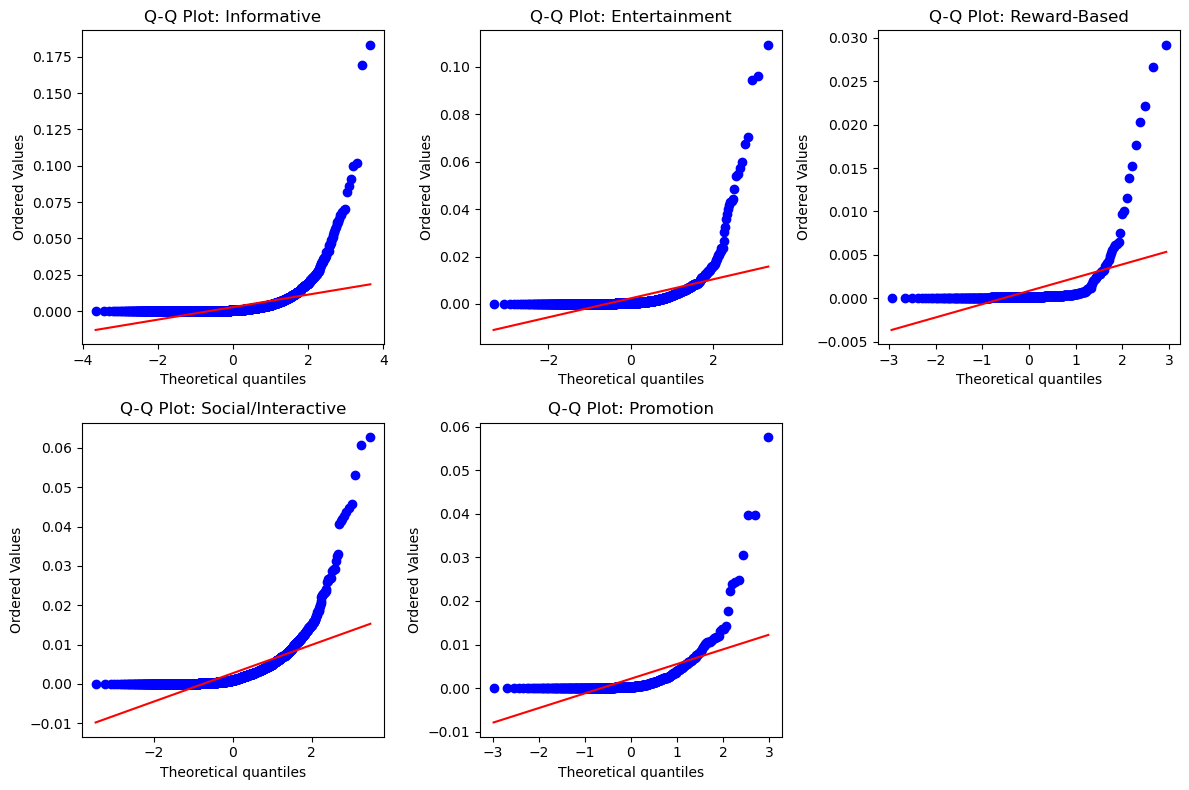

In [ ]:
import matplotlib.pyplot as plt
import scipy.stats as stats

# Step 1: Ensure engagement is numeric and clean the data
FB_data['engagement'] = pd.to_numeric(FB_data['engagement'], errors='coerce')
FB_data = FB_data.dropna(subset=['engagement'])

# Clean contentpurpose column, removing "Unknown" and missing values
FB_data = FB_data[FB_data['contentpurpose'].notna() & (FB_data['contentpurpose'] != 'Unknown')]

# Step 2: Plot Q-Q plots for each content purpose group
plt.figure(figsize=(12, 8))

# Iterate over each unique contentpurpose and plot the Q-Q plot
for i, group in enumerate(FB_data['contentpurpose'].unique()):
    engagements = FB_data[FB_data['contentpurpose'] == group]['engagement']
    
    plt.subplot(2, 3, i + 1)  # Create subplots for each group
    stats.probplot(engagements, dist="norm", plot=plt)
    plt.title(f"Q-Q Plot: {group}")

plt.tight_layout()
plt.show()

Kruskas-Wallis

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Step 1: Convert engagement to numeric
FB_data['engagement'] = pd.to_numeric(FB_data['engagement'], errors='coerce')

# Check for NaN values after conversion
print("Number of NaN values in engagement:", FB_data['engagement'].isna().sum())

# Drop rows with NaN in engagement (alternatively, you could impute them)
FB_data = FB_data.dropna(subset=['engagement'])

# Clean contentpurpose column
FB_data = FB_data[FB_data['contentpurpose'].notna() & (FB_data['contentpurpose'] != 'Unknown')]

# Step 2: Check the distribution of contentpurpose groups
print("Content Purpose Distribution:")
print(FB_data['contentpurpose'].value_counts())

# Step 3: Perform Kruskal-Wallis test
# We need at least 2 data points per group for the Kruskal-Wallis test
groups = FB_data['contentpurpose'].unique()
group_data = {group: FB_data[FB_data['contentpurpose'] == group]['engagement'].values for group in groups}

# Filter groups with at least 2 data points
valid_groups = [group for group in groups if len(group_data[group]) >= 2]

# Perform Kruskal-Wallis test if there are enough groups
if len(valid_groups) < 2:
    print("Not enough groups with sufficient data for Kruskal-Wallis test.")
else:
    # Prepare the data for the Kruskal-Wallis test
    data_for_kw = [group_data[group] for group in valid_groups]

    # Perform Kruskal-Wallis test
    kruskal_stat, p_value = stats.kruskal(*data_for_kw)

    # Display results
    print("\nKruskal-Wallis H-statistic:", kruskal_stat)
    print("p-value:", p_value)

    if p_value < 0.05:
        print("Significant differences found. Performing post-hoc tests...")

        # Post-hoc test (pairwise comparisons)
        from statsmodels.stats.multicomp import pairwise_tukeyhsd

        # Flatten the group data and create a new DataFrame for Tukey's test
        all_data = []
        for group in valid_groups:
            all_data.extend([(engagement, group) for engagement in group_data[group]])

        # Create DataFrame for Tukey's HSD
        all_data_df = pd.DataFrame(all_data, columns=['engagement', 'contentpurpose'])

        # Perform Tukey's HSD
        tukey = pairwise_tukeyhsd(all_data_df['engagement'], all_data_df['contentpurpose'], alpha=0.05)
        print(tukey)
    else:
        print("No significant differences found (p-value > 0.05).")

# Step 4: Summary statistics for each group
print("\nSummary Statistics:")
for group in valid_groups:
    engagements = group_data[group]
    print(f"{group}:")
    print(f"  Count: {len(engagements)}")
    print(f"  Mean Engagement: {np.mean(engagements):.6f}")
    print(f"  Std Dev: {np.std(engagements, ddof=1):.6f}\n")

# Step 5: Conclusion
if p_value < 0.05:
    print("Conclusion: Reject H₀. The content type significantly affects customer engagement.")
else:
    print("Conclusion: Fail to reject H₀. The content type does not significantly affect customer engagement.")

Number of NaN values in engagement: 0
Content Purpose Distribution:
contentpurpose
Informative           5393
Social/Interactive    2770
Entertainment         1586
Promotion              487
Reward-Based           425
Name: count, dtype: int64

Kruskal-Wallis H-statistic: 266.0228612667961
p-value: 2.2962093940903984e-56
Significant differences found. Performing post-hoc tests...
          Multiple Comparison of Means - Tukey HSD, FWER=0.05          
    group1          group2       meandiff p-adj   lower   upper  reject
-----------------------------------------------------------------------
Entertainment        Informative   0.0003 0.4602 -0.0002  0.0008  False
Entertainment          Promotion  -0.0003 0.9418 -0.0012  0.0007  False
Entertainment       Reward-Based  -0.0016 0.0001 -0.0025 -0.0006   True
Entertainment Social/Interactive   0.0003 0.4376 -0.0002  0.0009  False
  Informative          Promotion  -0.0006  0.354 -0.0014  0.0003  False
  Informative       Reward-Based  -0.0019

The Kruskal-Wallis test indicates that the content type has a significant effect on customer engagement. The p-value from the test is extremely small (2.296 x 10⁻⁵⁶), providing strong evidence against the null hypothesis. Post-hoc analysis using Tukey’s HSD revealed significant differences in engagement between Reward-Based content and several other content types, including Entertainment, Informative, and Promotion. However, no significant differences were found between other pairs, such as Informative vs. Social/Interactive and Entertainment vs. Informative. This suggests that while the type of content influences engagement, the impact varies depending on the specific content category.

Instagram

In [ ]:
# Convert engagement to numeric
# Replace any non-numeric values (e.g., "-") with NaN and convert to float
IG_data['engagement'] = pd.to_numeric(IG_data['engagement'], errors='coerce')

# Check for NaN values after conversion
print("Number of NaN values in engagement:", IG_data['engagement'].isna().sum())

# Drop rows with NaN in engagement (alternatively, you could impute them)
IG_data = IG_data.dropna(subset=['engagement'])

# Verify the data type of engagement
print("Engagement column data type after conversion:", IG_data['engagement'].dtype)
print("Sample engagement values after conversion:", IG_data['engagement'].head().tolist())

# Clean the contentpurpose column
# Remove rows where contentpurpose is "Unknown" or missing
IG_data = IG_data[IG_data['contentpurpose'].notna() & (IG_data['contentpurpose'] != 'Unknown')]

# Check the distribution of contentpurpose groups
print("Content Purpose Distribution:")
print(IG_data['contentpurpose'].value_counts())

# Perform one-way ANOVA
# Initialize p_value with a default value
p_value = 0.05  # Default value indicating no significance

# We need at least 2 data points per group for ANOVA, so we'll filter groups accordingly
groups = IG_data['contentpurpose'].unique()
group_data = {group: IG_data[IG_data['contentpurpose'] == group]['engagement'].values for group in groups}

# Filter groups with at least 2 data points
valid_groups = [group for group in groups if len(group_data[group]) >= 2]
if len(valid_groups) < 2:
    print("Not enough groups with sufficient data for ANOVA. Performing t-tests instead.")
else:
    # Prepare data for ANOVA
    anova_df = IG_data[IG_data['contentpurpose'].isin(valid_groups)]

    # Perform ANOVA
    model = ols('engagement ~ C(contentpurpose)', data=anova_df).fit()
    anova_table = anova_lm(model, typ=2)
    print("\nANOVA Results:")
    print(anova_table)

    # Extract the p-value
    p_value = anova_table['PR(>F)'][0]
    if p_value < 0.05:
        print("Significant differences found. Performing Tukey's HSD post-hoc test...")
        # Perform Tukey's HSD
        tukey = pairwise_tukeyhsd(endog=anova_df['engagement'], groups=anova_df['contentpurpose'], alpha=0.05)
        print(tukey)
    else:
        print("No significant differences found (p-value > 0.05).")

# Summary statistics for each group
print("\nSummary Statistics:")
for group in groups:
    engagements = group_data[group]
    print(f"{group}:")
    print(f"  Count: {len(engagements)}")
    print(f"  Mean Engagement: {np.mean(engagements):.6f}")
    print(f"  Std Dev: {np.std(engagements, ddof=1):.6f}\n")

# Conclusion
if p_value < 0.05:
    print("Conclusion: Reject H₀. The content type significantly affects customer engagement.")
else:
    print("Conclusion: Fail to reject H₀. The content type does not significantly affect customer engagement.")

# Step 8: Identify the best content type for engagement
# Find the group with the highest mean engagement
mean_engagements = {group: np.mean(group_data[group]) for group in groups}
best_content_type = max(mean_engagements, key=mean_engagements.get)
print(f"\nBest Content Type for Engagement: {best_content_type} with mean engagement of {mean_engagements[best_content_type]:.6f}")

Number of NaN values in engagement: 0
Engagement column data type after conversion: float64
Sample engagement values after conversion: [0.01420368944390505, 0.01656905482671864, 0.003062567518480604, 0.0709456403383868, 0.007325304272551414]
Content Purpose Distribution:
contentpurpose
Informative           4212
Social/Interactive    1804
Entertainment         1020
Promotion              376
Reward-Based           349
Name: count, dtype: int64

ANOVA Results:
                     sum_sq      df          F        PR(>F)
C(contentpurpose)  0.031400     4.0  11.375117  3.325078e-09
Residual           5.352409  7756.0        NaN           NaN
Significant differences found. Performing Tukey's HSD post-hoc test...
          Multiple Comparison of Means - Tukey HSD, FWER=0.05          
    group1          group2       meandiff p-adj   lower   upper  reject
-----------------------------------------------------------------------
Entertainment        Informative   0.0001    1.0 -0.0024  0.0026  

Q-Q Plot

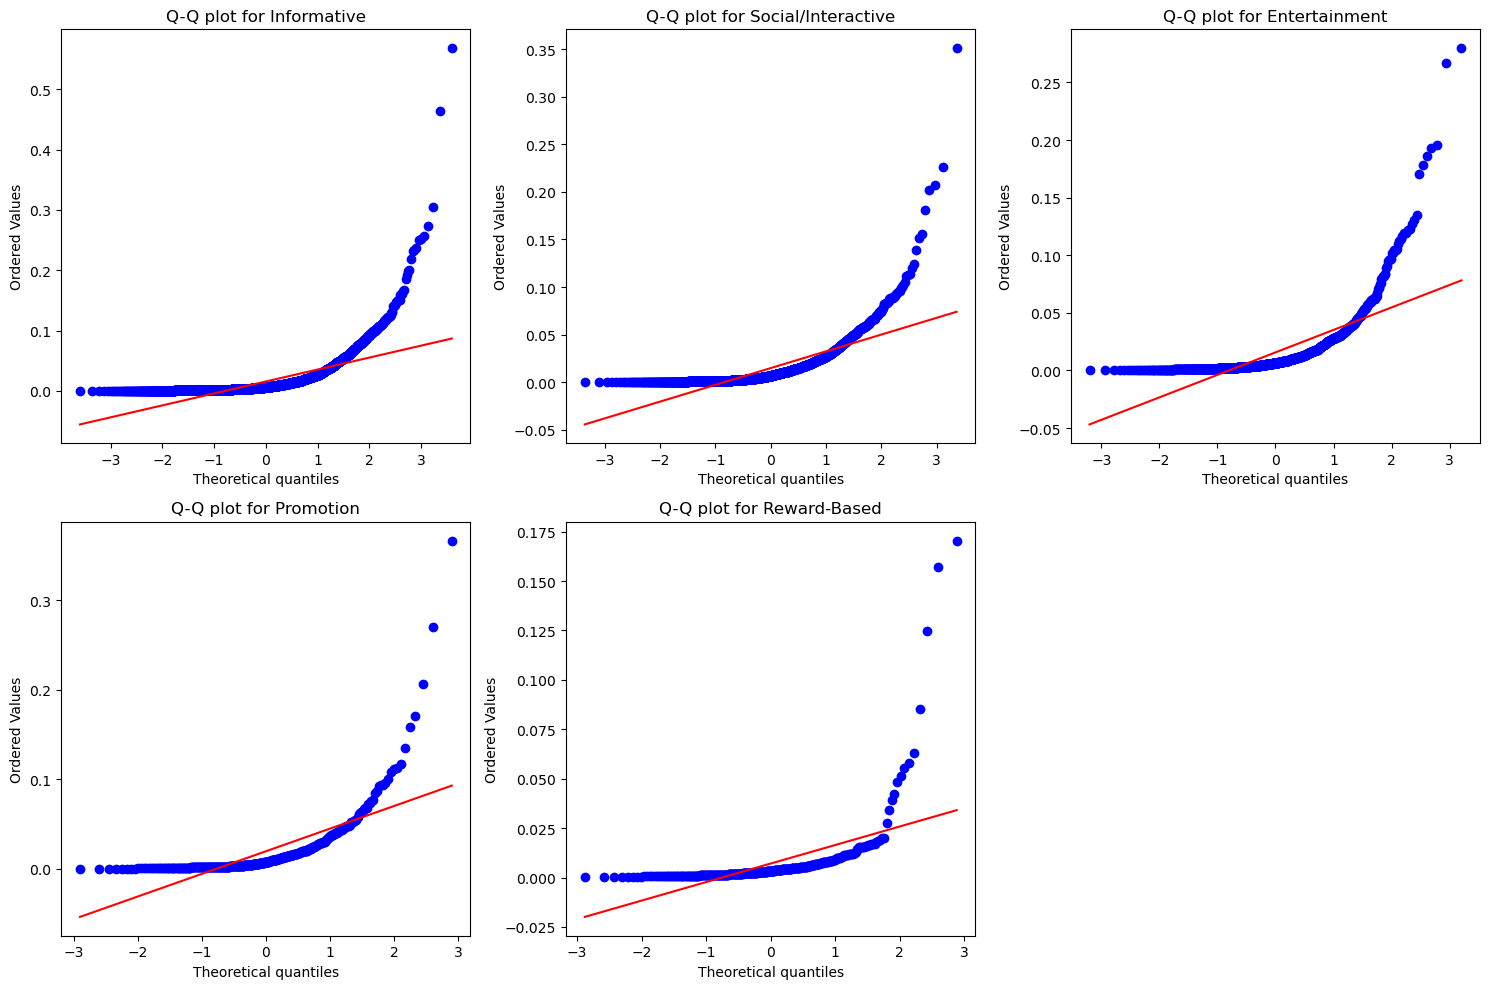

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

# Groups in IG_data
groups = ['Informative', 'Social/Interactive', 'Entertainment', 'Promotion', 'Reward-Based']

# Generate Q-Q plots for each group
plt.figure(figsize=(15, 10))

for i, group in enumerate(groups, 1):
    # Get the engagement data for each group
    group_data = IG_data[IG_data['contentpurpose'] == group]['engagement']
    
    # Q-Q plot for each group
    plt.subplot(2, 3, i)  # 2 rows, 3 columns for layout
    stats.probplot(group_data, dist="norm", plot=plt)
    plt.title(f'Q-Q plot for {group}')
    
plt.tight_layout()
plt.show()

Kruska-Wallis

In [ ]:
from scipy import stats

# Create a dictionary to store engagement values for each content purpose group
group_data = {group: IG_data[IG_data['contentpurpose'] == group]['engagement'].dropna().values for group in groups}

# Perform Kruskal-Wallis test
kruskal_result = stats.kruskal(*group_data.values())

# Display the Kruskal-Wallis test results
print("Kruskal-Wallis H-statistic:", kruskal_result.statistic)
print("p-value:", kruskal_result.pvalue)

# Check for significance
if kruskal_result.pvalue < 0.05:
    print("Significant differences found. Performing post-hoc tests...")
    # Perform post-hoc tests (Pairwise comparisons using Mann-Whitney U test or another method)
    from statsmodels.stats.multicomp import pairwise_tukeyhsd
    # Flatten data for pairwise comparisons
    all_data = []
    for group in groups:
        all_data.extend([(value, group) for value in group_data[group]])
    # Create a DataFrame for Tukey HSD
    posthoc_df = pd.DataFrame(all_data, columns=['engagement', 'group'])
    tukey = pairwise_tukeyhsd(posthoc_df['engagement'], posthoc_df['group'], alpha=0.05)
    print(tukey)
else:
    print("No significant differences found (p-value > 0.05).")

# Summary statistics for each group
print("\nSummary Statistics:")
for group in groups:
    engagements = group_data[group]
    print(f"{group}:")
    print(f"  Count: {len(engagements)}")
    print(f"  Mean Engagement: {np.mean(engagements):.6f}")
    print(f"  Std Dev: {np.std(engagements, ddof=1):.6f}\n")

# Conclusion
if kruskal_result.pvalue < 0.05:
    print("Conclusion: Reject H₀. The content type significantly affects customer engagement.")
else:
    print("Conclusion: Fail to reject H₀. The content type does not significantly affect customer engagement.")

Kruskal-Wallis H-statistic: 89.5576546553891
p-value: 1.6348091096247887e-18
Significant differences found. Performing post-hoc tests...
          Multiple Comparison of Means - Tukey HSD, FWER=0.05          
    group1          group2       meandiff p-adj   lower   upper  reject
-----------------------------------------------------------------------
Entertainment        Informative   0.0001    1.0 -0.0024  0.0026  False
Entertainment          Promotion   0.0039 0.1003 -0.0004  0.0082  False
Entertainment       Reward-Based  -0.0086    0.0  -0.013 -0.0041   True
Entertainment Social/Interactive  -0.0007  0.961 -0.0035  0.0021  False
  Informative          Promotion   0.0038 0.0532    -0.0  0.0077  False
  Informative       Reward-Based  -0.0086    0.0 -0.0126 -0.0046   True
  Informative Social/Interactive  -0.0008 0.8358 -0.0028  0.0012  False
    Promotion       Reward-Based  -0.0125    0.0 -0.0178 -0.0071   True
    Promotion Social/Interactive  -0.0046 0.0174 -0.0087 -0.0005   True

The Kruskal-Wallis H-test reveals significant differences in customer engagement across different content types. With an H-statistic of 89.56 and a p-value of 1.63e-18, we reject the null hypothesis (H₀), indicating that the content type significantly affects engagement on Instagram.

The post-hoc Tukey HSD test identifies several pairwise significant differences:

- Entertainment vs. Reward-Based: A significant difference in engagement with Reward-Based content having much lower engagement (mean difference = -0.0086, p-value < 0.05).

- Informative vs. Reward-Based: Another significant difference with Reward-Based content showing lower engagement (mean difference = -0.0086, p-value < 0.05).

- Promotion vs. Reward-Based: Significant differences, with Reward-Based having lower engagement (mean difference = -0.0125, p-value < 0.05).

- Promotion vs. Social/Interactive: Significant difference (mean difference = -0.0046, p-value < 0.05).

- Reward-Based vs. Social/Interactive: A significant difference showing higher engagement in Social/Interactive content (mean difference = 0.0079, p-value < 0.05).

In conclusion, Reward-Based content shows the lowest engagement, while Promotion content has the highest engagement. Significant differences were found between these groups and others

## Sub-Question 3: "How does social media engagement on Facebook differ from engagement on Instagram for the target group?"

## Hypothesis 3:

H0): Gaming studios will not have more engagement on their Instagram-page when compared to their Facebook-page. 

Ha): Gaming studios will have more engagement on their Instagram-page when compared to their Facebook-page. 

Checking normality of engagement of both Instagram and Facebook to determine to use T-test or Mann-Whitney U Test

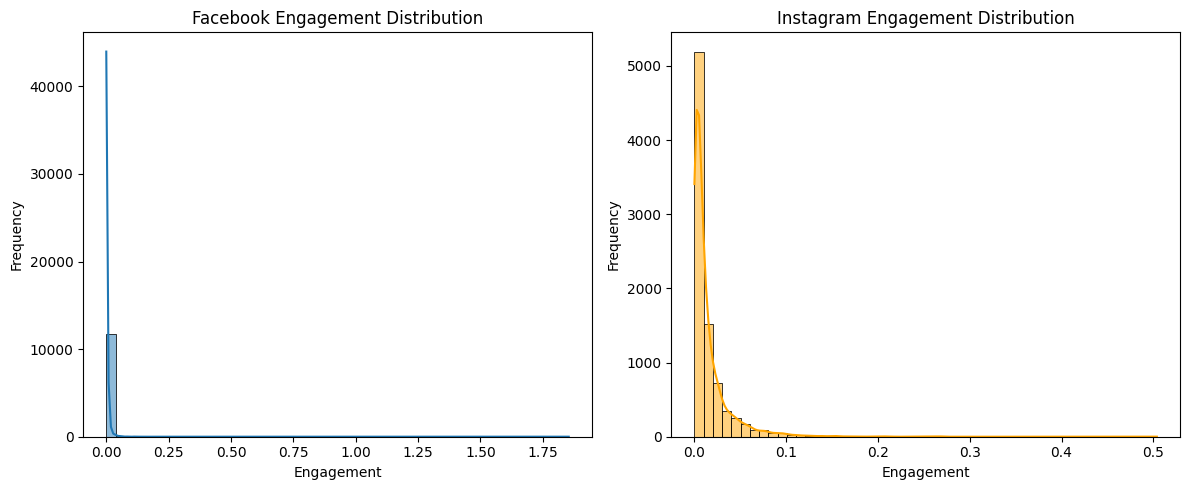

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 5))

# Facebook
plt.subplot(1, 2, 1)
sns.histplot(fb_engagement, kde=True, bins=50)
plt.title('Facebook Engagement Distribution')
plt.xlabel('Engagement')
plt.ylabel('Frequency')

# Instagram
plt.subplot(1, 2, 2)
sns.histplot(ig_engagement, kde=True, bins=50, color='orange')
plt.title('Instagram Engagement Distribution')
plt.xlabel('Engagement')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


Data is NOT normally distributed and we are comparing 2 independent variables. So Man-Whitney U Test is appropriate to use.

# The p-value is smaller than 0,05 as can be seen below. That means that H0 will be rejected.

H0): Gaming studios will not have more engagement on their Instagram-page when compared to their Facebook-page. 

Ha): Gaming studios will have more engagement on their Instagram-page when compared to their Facebook-page.



In [ ]:
from scipy.stats import mannwhitneyu

# Voer de Mann-Whitney U test uit
u_stat, p_value = mannwhitneyu(ig_engagement, fb_engagement, alternative='greater')

print("Mann-Whitney U-statistic:", u_stat)
print("p-value:", p_value)


Mann-Whitney U-statistic: 86249981.0
p-value: 0.0


The bar chart below shows the difference of engagement rates for Facebook and Instagram by average.

Instagram has a noticeably higher average engagement and a wider for every studio, indicating better overall performance.

In contrast, Facebook engagement is tightly clustered near zero, with fewer high-performing posts. This visual supports the Mann-Whitney U test result, confirming that engagement on Instagram is significantly higher than on Facebook.

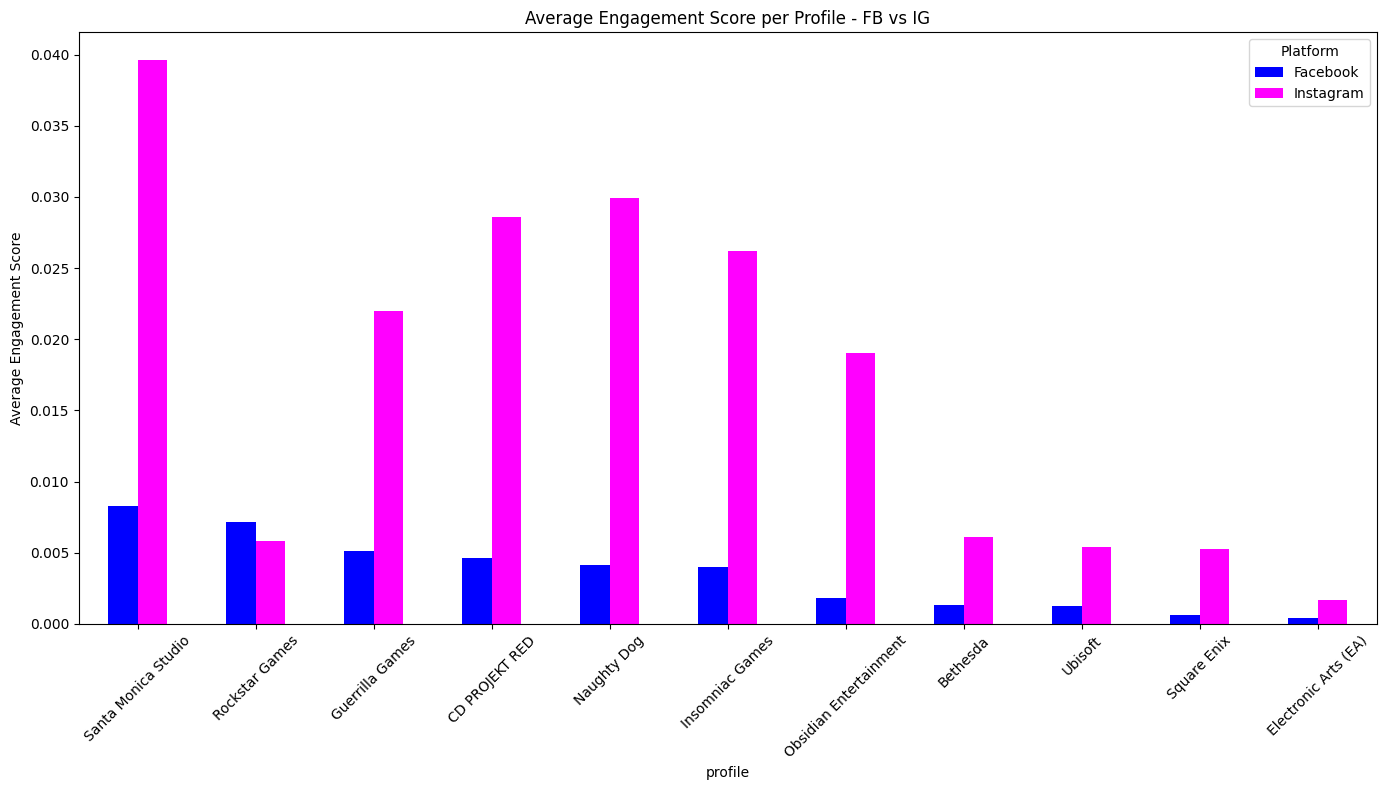

In [ ]:
# Calculating average per studio
FB_data_cleaned = FB_data[FB_data['number_of_followers'] != 0]
FB_engagement_avg = FB_data_cleaned.groupby('profile')['engagement_score'].mean()
IG_engagement_avg = IG_data.groupby('profile')['engagement_score'].mean()

# Combining in one dataframe
engagement_df = pd.DataFrame({
    'Facebook': FB_engagement_avg,
    'Instagram': IG_engagement_avg
}).dropna()

# Plot
engagement_df = engagement_df.sort_values(by='Facebook', ascending=False)
engagement_df.plot(kind='bar', figsize=(14, 8), color=['blue', 'magenta'])

plt.title('Average Engagement Score per Profile - FB vs IG')
plt.xlabel('profile')
plt.ylabel('Average Engagement Score')
plt.xticks(rotation=45)
plt.legend(title='Platform')
plt.tight_layout()
plt.show()


In [ ]:
# Gemiddelde engagement_score per profiel/platform berekenen
FB_engagement_avg = FB_data.groupby('profile')['engagement_score'].mean()
IG_engagement_avg = IG_data.groupby('profile')['engagement_score'].mean()

# Samenvoegen in één DataFrame
avg_engagement_df = pd.DataFrame({
    'Facebook': FB_engagement_avg,
    'Instagram': IG_engagement_avg
})

# Eventueel sorteren (optioneel)
avg_engagement_df = avg_engagement_df.sort_index()

# Printen in console
print("Average Engagement Score per Studio:\n")
print(avg_engagement_df)



Gemiddelde Engagement Score per Studio:

                        Facebook  Instagram
profile                                    
Bethesda                0.001316   0.006125
CD PROJEKT RED          0.004599   0.028601
Electronic Arts (EA)         inf   0.001703
Guerrilla Games              inf   0.021993
Insomniac Games              inf   0.026234
Naughty Dog                  inf   0.029897
Obsidian Entertainment  0.001829   0.019062
Rockstar Games               inf   0.005839
Santa Monica Studio          inf   0.039593
Square Enix                  inf   0.005233
Ubisoft                      inf   0.005418


# Sub-Question 4: What is the difference in engagement between having a large follower base and having a small follower base?

Hypothesis 4

H0): Having a large amount of followers does not influence customer engagement positively. 

Ha): Having a large amount of followers does influence customer engagement positively.  

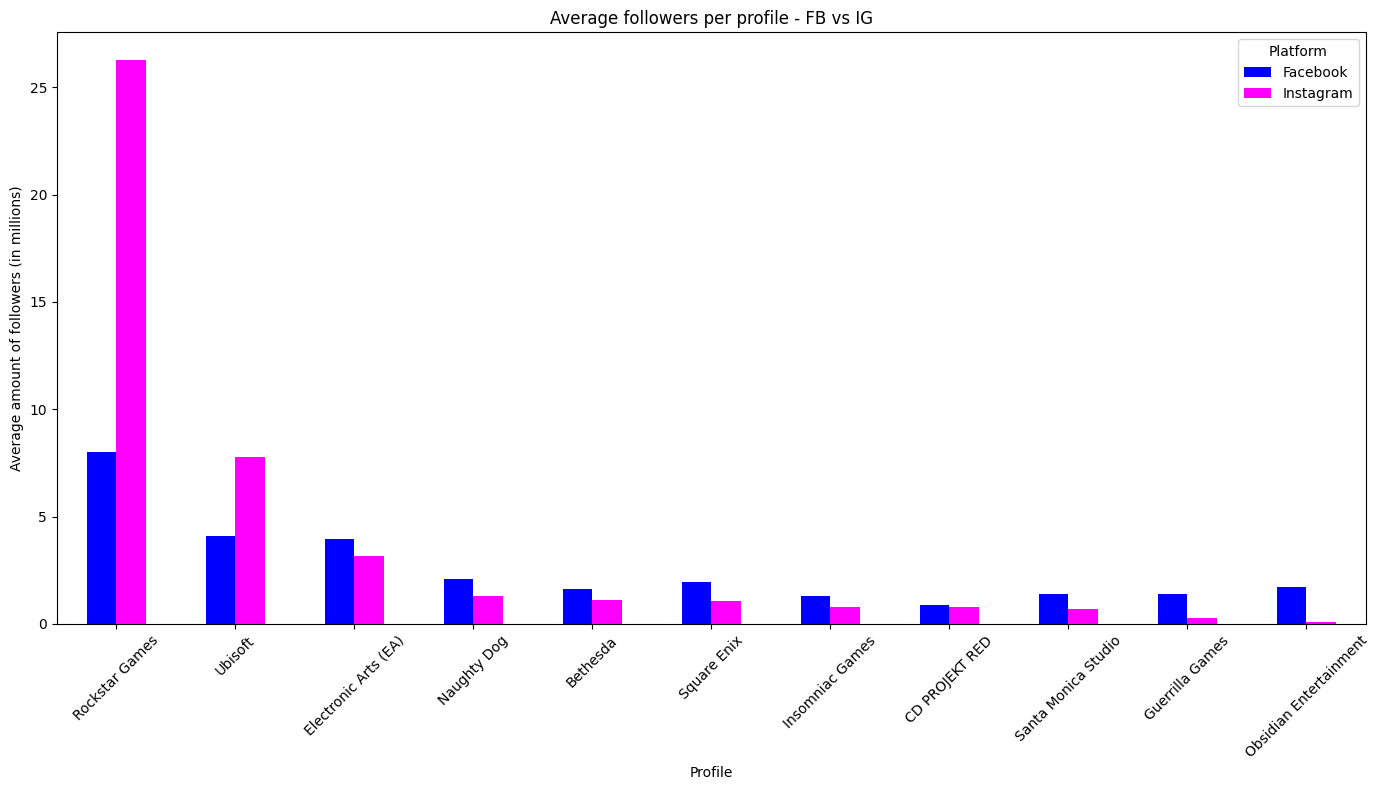

In [ ]:


# Average followers over time
FB_data_cleaned = FB_data[FB_data['number of followers'] != 0]
FB_followers_avg = FB_data_cleaned.groupby('profile')['number of followers'].mean()
IG_followers_avg = IG_data.groupby('profile')['number of followers'].mean()

# Combining in one
followers_df = pd.DataFrame({
    'Facebook': FB_followers_avg,
    'Instagram': IG_followers_avg
}).dropna()

followers_df = followers_df.sort_values(by='Instagram', ascending=False)
followers_df.plot(kind='bar', figsize=(14, 8), color=['blue', 'magenta'])

# Plotting
plt.title('Average followers per profile - FB vs IG')
plt.xlabel('Profile')
plt.ylabel('Average amount of followers (in millions)')
plt.xticks(rotation=45)
plt.legend(title='Platform')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x / 1_000_000:.0f}'))
plt.tight_layout()
plt.show()




In [ ]:
# How many followers does every account have over the period of time of scraping (on average)?
followers_df = followers_df.sort_values(by='Instagram', ascending=False)
followers_df_millions = (followers_df / 1_000_000).round(2)
print("Average followers (in millions):\n")
print(followers_df_millions)


Gemiddeld aantal volgers per profiel (in miljoenen):

                        Facebook  Instagram
profile                                    
Rockstar Games              7.99      26.26
Ubisoft                     4.11       7.79
Electronic Arts (EA)        3.95       3.15
Naughty Dog                 2.11       1.30
Bethesda                    1.64       1.11
Square Enix                 1.95       1.05
Insomniac Games             1.28       0.79
CD PROJEKT RED              0.86       0.79
Santa Monica Studio         1.38       0.68
Guerrilla Games             1.41       0.25
Obsidian Entertainment      1.73       0.08


There's a clear distinction of the bigger platforms that have 3 million or more followers. They will be considered the large accounts and the rest are giving a similar trend which will be considered the smaller accounts.

Based on these 2 groups, the Mann Whitney U test will be done.

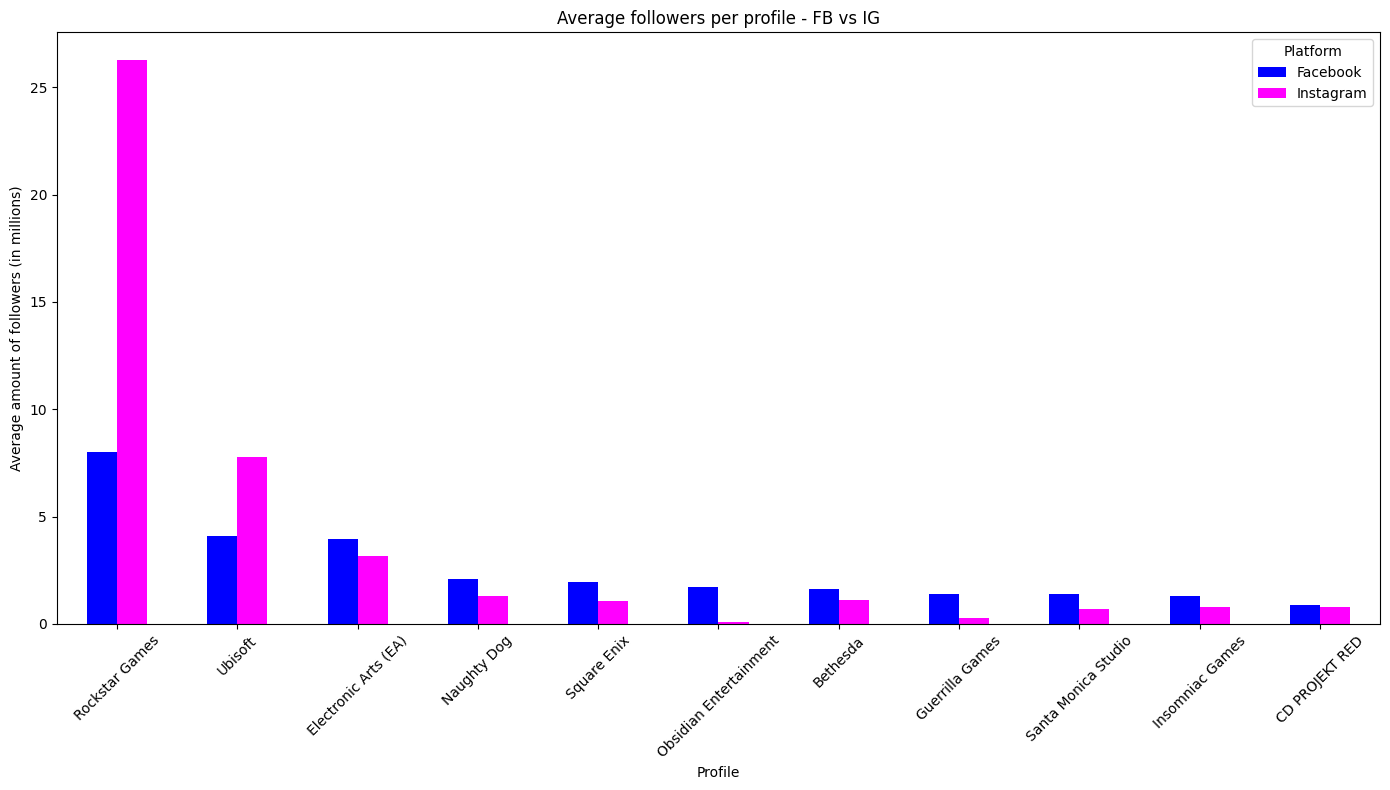

In [ ]:
# Average followers over time
FB_data_cleaned = FB_data[FB_data['number of followers'] != 0]
FB_followers_avg = FB_data_cleaned.groupby('profile')['number of followers'].mean()
IG_followers_avg = IG_data.groupby('profile')['number of followers'].mean()

# Combining in one
followers_df = pd.DataFrame({
    'Facebook': FB_followers_avg,
    'Instagram': IG_followers_avg
}).dropna()

followers_df = followers_df.sort_values(by='Facebook', ascending=False)
followers_df.plot(kind='bar', figsize=(14, 8), color=['blue', 'magenta'])

# Plotting
plt.title('Average followers per profile - FB vs IG')
plt.xlabel('Profile')
plt.ylabel('Average amount of followers (in millions)')
plt.xticks(rotation=45)
plt.legend(title='Platform')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x / 1_000_000:.0f}'))
plt.tight_layout()
plt.show()

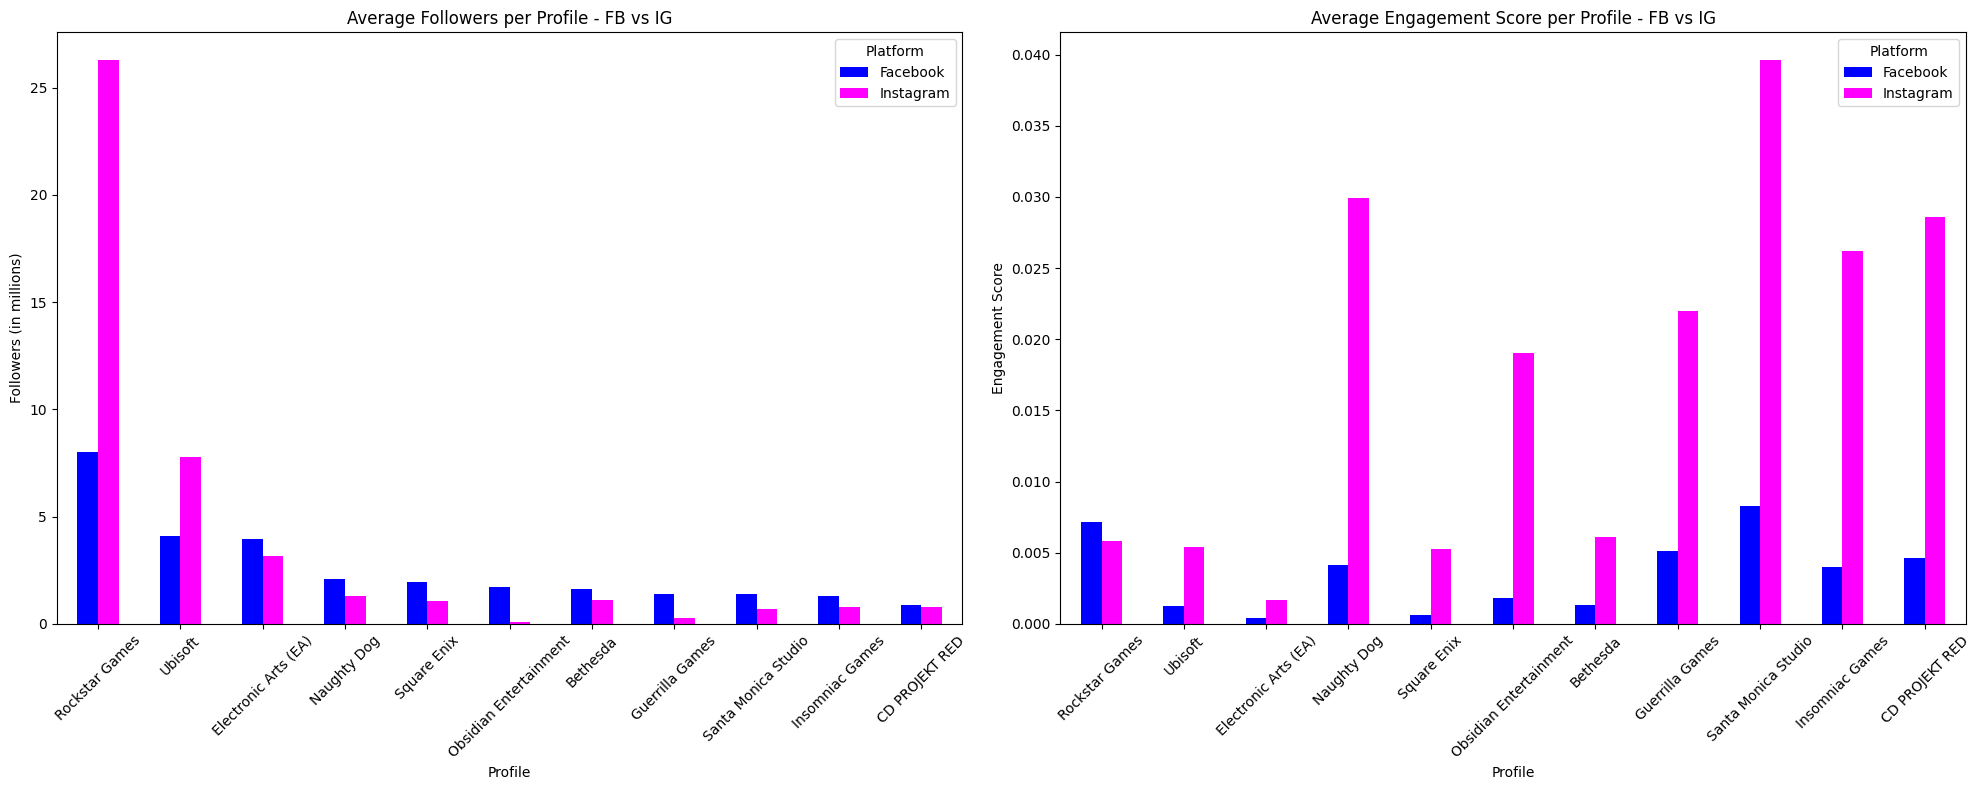

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# --- Voorbereiding followers ---
FB_data_cleaned = FB_data[FB_data['number_of_followers'] != 0]
FB_followers_avg = FB_data_cleaned.groupby('profile')['number_of_followers'].mean()
IG_followers_avg = IG_data.groupby('profile')['number_of_followers'].mean()

followers_df = pd.DataFrame({
    'Facebook': FB_followers_avg,
    'Instagram': IG_followers_avg
}).dropna()

# Omzetten naar miljoenen voor leesbaarheid
followers_df_mil = (followers_df / 1_000_000).round(2)

# --- Voorbereiding engagement ---
FB_engagement_avg = FB_data_cleaned.groupby('profile')['engagement_score'].mean()
IG_engagement_avg = IG_data.groupby('profile')['engagement_score'].mean()

engagement_df = pd.DataFrame({
    'Facebook': FB_engagement_avg,
    'Instagram': IG_engagement_avg
}).dropna()

# --- Gezamenlijke sorteerindex (bijv. op FB followers) ---
common_index = followers_df_mil.index.intersection(engagement_df.index)
followers_df_mil = followers_df_mil.loc[common_index]
engagement_df = engagement_df.loc[common_index]

# Eventueel sorteren op gemiddelde volgers
followers_df_mil = followers_df_mil.sort_values(by='Facebook', ascending=False)
engagement_df = engagement_df.loc[followers_df_mil.index]

# --- Plot ---
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Plot followers
followers_df_mil.plot(kind='bar', ax=axes[0], color=['blue', 'magenta'])
axes[0].set_title('Average Followers per Profile - FB vs IG')
axes[0].set_ylabel('Followers (in millions)')
axes[0].set_xlabel('Profile')
axes[0].set_xticklabels(followers_df_mil.index, rotation=45)
axes[0].legend(title='Platform')
axes[0].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x:.0f}'))

# Plot engagement
engagement_df.plot(kind='bar', ax=axes[1], color=['blue', 'magenta'])
axes[1].set_title('Average Engagement Score per Profile - FB vs IG')
axes[1].set_ylabel('Engagement Score')
axes[1].set_xlabel('Profile')
axes[1].set_xticklabels(engagement_df.index, rotation=45)
axes[1].legend(title='Platform')

plt.tight_layout()
plt.show()


In [ ]:
from scipy.stats import mannwhitneyu

# Define which profiles are considered "high followers"
high_profiles = ['Rockstar Games', 'Ubisoft', 'Electronic Arts (EA)']

# -------- Instagram --------
# Calculate engagement score
IG_data['engagement_score'] = (
    IG_data['number_of_likes'] + IG_data['number_of_comments']
) / IG_data['number_of_followers']

# Split into high and low follower groups
IG_high = IG_data[IG_data['profile'].isin(high_profiles)]
IG_low = IG_data[~IG_data['profile'].isin(high_profiles)]

# Perform Mann-Whitney U Test
ig_u, ig_p = mannwhitneyu(
    IG_high['engagement_score'],
    IG_low['engagement_score'],
    alternative='greater'  # One-sided test: expecting high > low
)

print("Instagram Hypothesis Test:")
print("Mann-Whitney U-statistic:", ig_u)
print("p-value:", ig_p)

# -------- Facebook --------
# Calculate engagement score
FB_data['engagement_score'] = (
    FB_data['number_of_likes'] + FB_data['number_of_comments']
) / FB_data['number_of_followers']

# Split into high and low follower groups
FB_high = FB_data[FB_data['profile'].isin(high_profiles)]
FB_low = FB_data[~FB_data['profile'].isin(high_profiles)]

# Perform Mann-Whitney U Test
fb_u, fb_p = mannwhitneyu(
    FB_high['engagement_score'],
    FB_low['engagement_score'],
    alternative='greater'
)

print("\n Facebook Hypothesis Test:")
print("Mann-Whitney U-statistic:", fb_u)
print("p-value:", fb_p)


Instagram Hypothesis Test:
Mann-Whitney U-statistic: 3285778.0
p-value: 1.0

 Facebook Hypothesis Test:
Mann-Whitney U-statistic: 8847627.5
p-value: 1.0


In [ ]:
from scipy.stats import mannwhitneyu

# Define which profiles are considered "high followers"
high_profiles = ['Rockstar Games', 'Ubisoft', 'Electronic Arts (EA)']

# -------- Instagram --------
# Calculate engagement score
IG_data['engagement_score'] = (
    IG_data['number_of_likes'] + IG_data['number_of_comments']
) / IG_data['number_of_followers']

# Split into high and high follower groups
IG_high = IG_data[IG_data['profile'].isin(high_profiles)]
IG_low = IG_data[~IG_data['profile'].isin(high_profiles)]

# Perform Mann-Whitney U Test: testing if low > high
ig_u, ig_p = mannwhitneyu(
    IG_low['engagement_score'],
    IG_high['engagement_score'],
    alternative='greater'  # Now testing: low > high
)

print("Instagram Hypothesis Test (Low > High followers):")
print("Mann-Whitney U-statistic:", ig_u)
print("p-value:", ig_p)


# Facebook
# Calculate engagement score
FB_data['engagement_score'] = (
    FB_data['number_of_likes'] + FB_data['number_of_comments']
) / FB_data['number_of_followers']

# Split into high and low follower groups
FB_high = FB_data[FB_data['profile'].isin(high_profiles)]
FB_low = FB_data[~FB_data['profile'].isin(high_profiles)]

# Perform Mann-Whitney U Test: testing if low > high
fb_u, fb_p = mannwhitneyu(
    FB_low['engagement_score'],
    FB_high['engagement_score'],
    alternative='greater'  # Now testing: low > high
)

print("\n Facebook Hypothesis Test (Low > High followers):")
print("Mann-Whitney U-statistic:", fb_u)
print("p-value:", fb_p)



Instagram Hypothesis Test (Low > High followers):
Mann-Whitney U-statistic: 9437615.0
p-value: 4.462885127582056e-228

 Facebook Hypothesis Test (Low > High followers):
Mann-Whitney U-statistic: 15450637.5
p-value: 1.7169768275029342e-101


## Sub-Question 5: "What specific days and times result in the highest level of customer engagement on Facebook and Instagram?" <br>
### Hypothesis:
5.1:
- H0): The day of posting on social media have no significant impact on customer engagement levels. 
- Ha): The day of posting on social media has a significant impact on customer engagement levels. <br>

5.2:<br>
- H0): The time of posting on social media have no significant impact on customer engagement levels. 
- Ha): The time of posting on social media has a significant impact on customer engagement levels. 

To determine which test we are going to use for hypothesis 5.1 (Day of the week) we are going to check whether the data is normally distributed or not.<br><br>
We will use the kolmogorov-Smirnov Test and a Q-Q plot to see if the data is normal distributed or not.
- Test statistic: The KS test calculates the maximum distance between the empirical distribution of the data and the theoretical distribution.
- P-value: The p-value indicates the probability that your data matches the theoretical distribution. The smaller the p-value, the more evidence there is to reject the null hypothesis.
    - Null Hypothesis (H0): De data is normal distributed.
    - Alternative Hypothesis (Ha): De data is not normal distributed.
The Q-Q plot (Quantile-Quantile plot) visually shows how the distribution of the data compares to a theoretical normal distribution:<br>
If the points lie on a straight line, the data is normally distributed.<Br>
Deviations from the line indicate a non-normal distribution.<BR>
<BR>
- If the data is normally distributed by day, then we will use an ANOVA.
- If the data per day is not normally distributed, then we will use a Kruskal-Wallis Test.


Kolmogorov-Smirnov Test results for Friday:
KS-statistic: 0.5
P-value: 0.0
The data for Friday is not normal distributed.


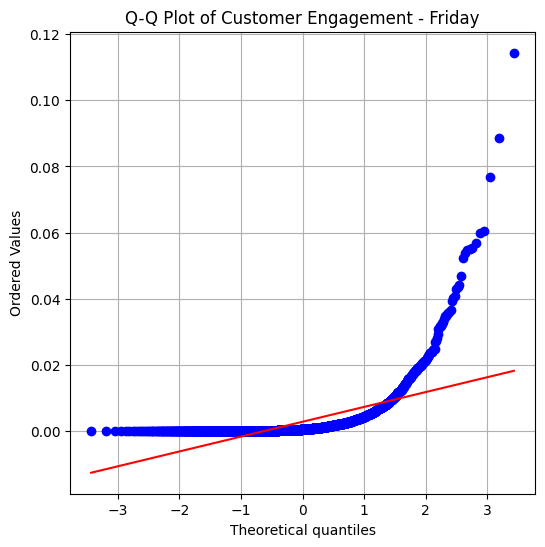


Kolmogorov-Smirnov Test results for Thursday:
KS-statistic: 0.5
P-value: 0.0
The data for Thursday is not normal distributed.


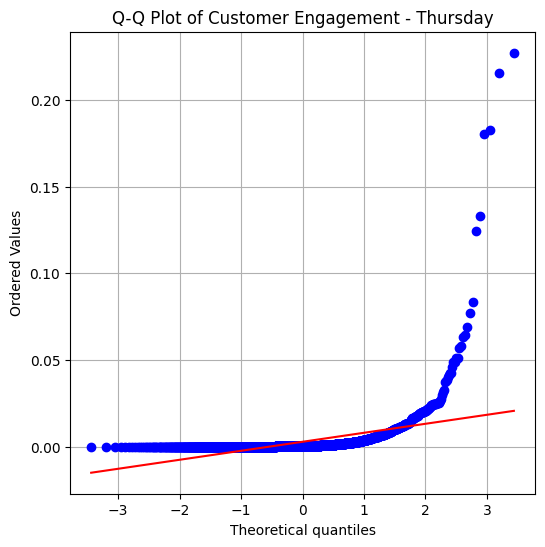


Kolmogorov-Smirnov Test results for Wednesday:
KS-statistic: 0.5
P-value: 0.0
The data for Wednesday is not normal distributed.


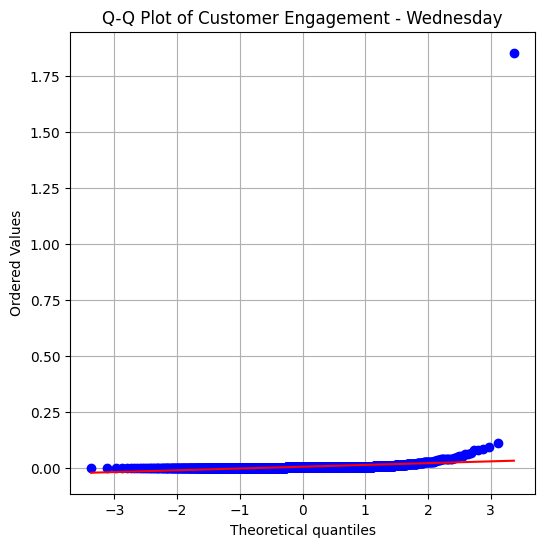


Kolmogorov-Smirnov Test results for Tuesday:
KS-statistic: 0.5
P-value: 0.0
The data for Tuesday is not normal distributed.


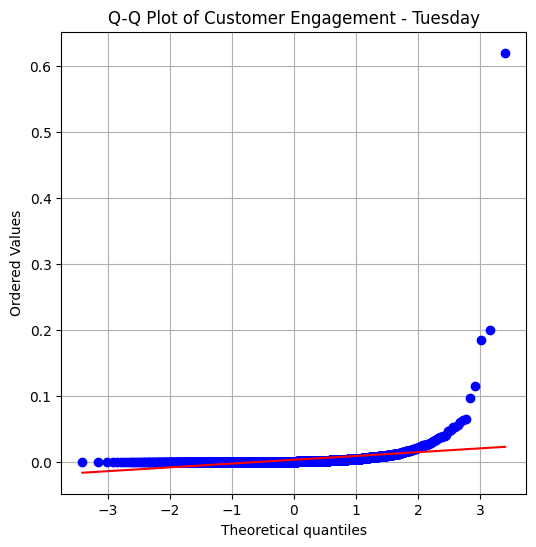


Kolmogorov-Smirnov Test results for Monday:
KS-statistic: 0.5
P-value: 0.0
The data for Monday is not normal distributed.


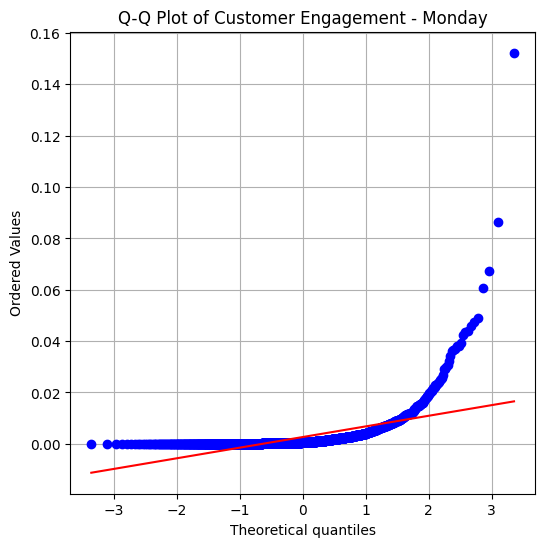


Kolmogorov-Smirnov Test results for Sunday:
KS-statistic: 0.5000003565957505
P-value: 3.6863967316874615e-143
The data for Sunday is not normal distributed.


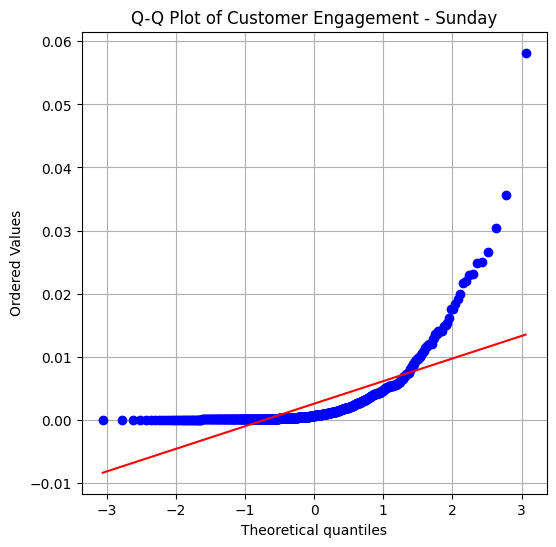


Kolmogorov-Smirnov Test results for Saturday:
KS-statistic: 0.5000001404328529
P-value: 5.109849807444757e-194
The data for Saturday is not normal distributed.


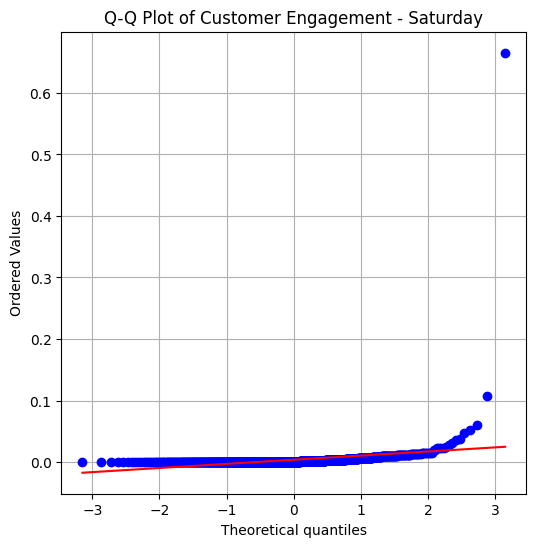

In [28]:
# Ensuring that day is category
FB_data['day'] = FB_data['day'].astype('category')

# List of unique days
unique_daysFB = FB_data['day'].unique()

# Test for every day seperately 
for day in unique_daysFB:
    day_data = FB_data[FB_data['day'] == day]['engagement_score']

    # Perform the Kolmogorov-Smirnov test against a normal distribution
    ks_stat, ks_p_value = stats.kstest(day_data, 'norm')

    # Print the results
    print(f"\nKolmogorov-Smirnov Test results for {day}:")
    print("KS-statistic:", ks_stat)
    print("P-value:", ks_p_value)

    if ks_p_value > 0.05:
        print(f"The data for {day} is normal distributed.")
    else:
        print(f"The data for {day} is not normal distributed.")

    # Create a Q-Q plot
    plt.figure(figsize=(6, 6))
    stats.probplot(day_data, dist="norm", plot=plt)
    plt.title(f"Q-Q Plot of Customer Engagement - {day}")
    plt.grid(True)
    plt.show()



Kolmogorov-Smirnov Test results for Friday:
KS-statistic: 0.5000030111834127
P-value: 0.0
The data for Friday is not normal distributed.


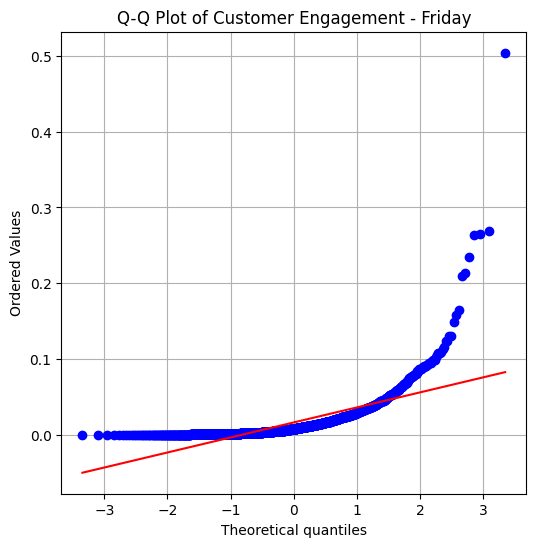


Kolmogorov-Smirnov Test results for Thursday:
KS-statistic: 0.5
P-value: 0.0
The data for Thursday is not normal distributed.


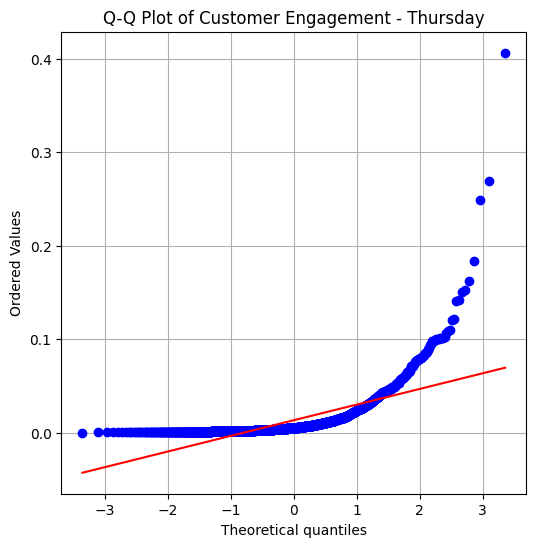


Kolmogorov-Smirnov Test results for Wednesday:
KS-statistic: 0.500002192522738
P-value: 1.4136380251078126e-291
The data for Wednesday is not normal distributed.


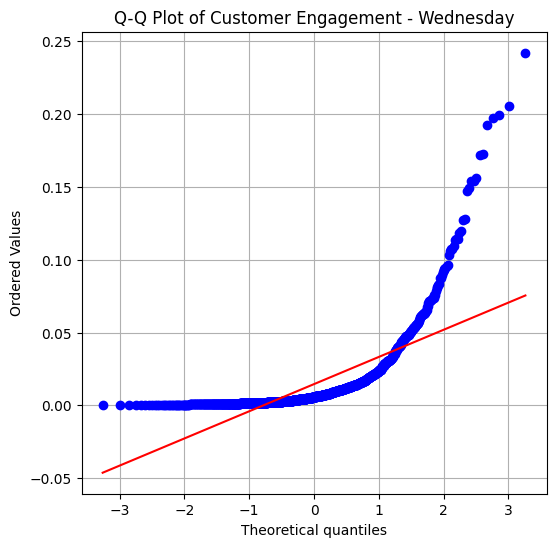


Kolmogorov-Smirnov Test results for Tuesday:
KS-statistic: 0.5000024762141391
P-value: 0.0
The data for Tuesday is not normal distributed.


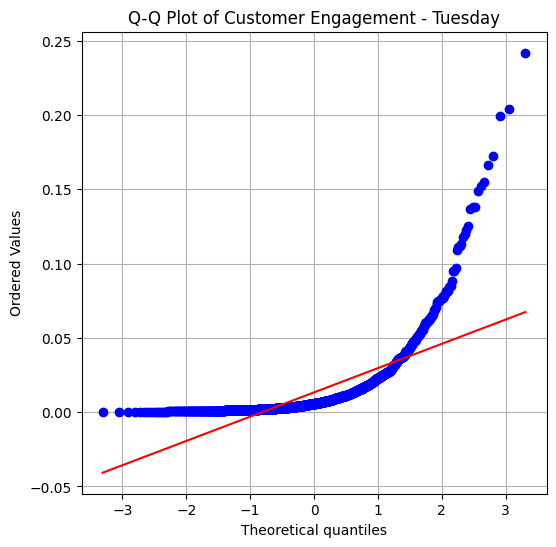


Kolmogorov-Smirnov Test results for Monday:
KS-statistic: 0.500054780816551
P-value: 3.5741839774500744e-288
The data for Monday is not normal distributed.


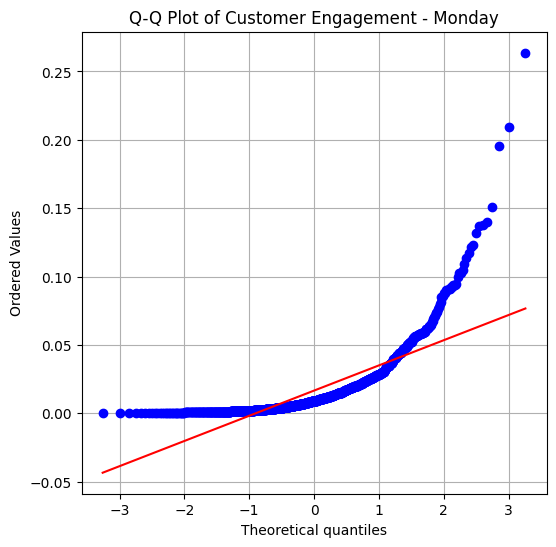


Kolmogorov-Smirnov Test results for Sunday:
KS-statistic: 0.5000110213473133
P-value: 8.225722941394277e-117
The data for Sunday is not normal distributed.


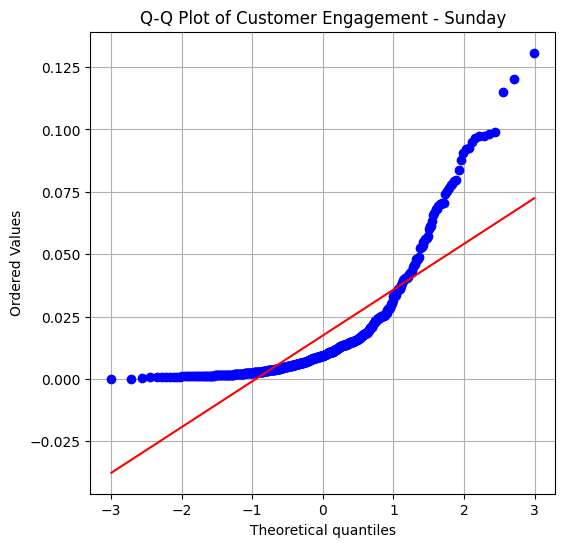


Kolmogorov-Smirnov Test results for Saturday:
KS-statistic: 0.5000093283407914
P-value: 1.2245755574186265e-149
The data for Saturday is not normal distributed.


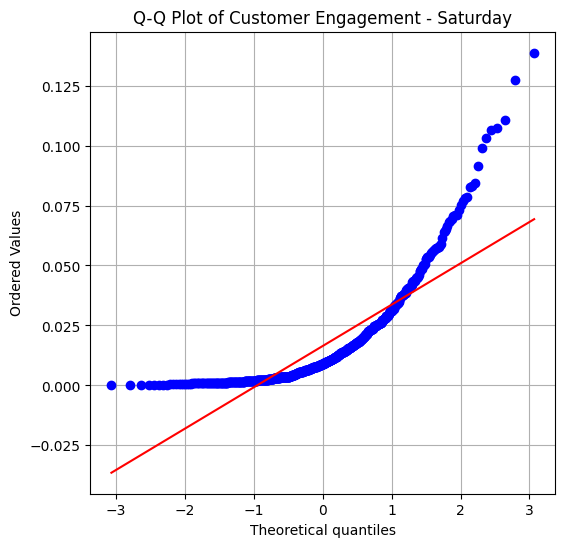

In [29]:
# Ensuring that day is category
IG_data['day'] = IG_data['day'].astype('category')

# List of unique days
unique_daysIG = IG_data['day'].unique()

# Test for every day seperately 
for day in unique_daysIG:
    day_dataIG = IG_data[IG_data['day'] == day]['engagement_score']

    # Perform the Kolmogorov-Smirnov test against a normal distribution
    ks_statIG, ks_p_valueIG = stats.kstest(day_dataIG, 'norm')

    # Print the results
    print(f"\nKolmogorov-Smirnov Test results for {day}:")
    print("KS-statistic:", ks_statIG)
    print("P-value:", ks_p_valueIG)

    if ks_p_valueIG > 0.05:
        print(f"The data for {day} is normal distributed.")
    else:
        print(f"The data for {day} is not normal distributed.")

    # Create a Q-Q plot
    plt.figure(figsize=(6, 6))
    stats.probplot(day_dataIG, dist="norm", plot=plt)
    plt.title(f"Q-Q Plot of Customer Engagement - {day}")
    plt.grid(True)
    plt.show()

In [30]:
# Create lists of customer engagement by platform per day
fb_day_groups = [FB_data[FB_data['day'] == day]['engagement_score'] for day in unique_daysFB]
ig_day_groups = [IG_data[IG_data['day'] == day]['engagement_score'] for day in unique_daysIG]

# Perform Kruskal-Wallis Test for Facebook
print("Kruskal-Wallis Test for Facebook")
kruskal_test_fb = kruskal(*fb_day_groups)
print(f"Facebook Kruskal-Wallis statistic: {float(kruskal_test_fb.statistic)}")
print(f"Facebook p-value: {float(kruskal_test_fb.pvalue)}\n")


# Perform Kruskal-Wallis Test for Instagram
print("\nKruskal-Wallis Test for Instagram")
kruskal_test_ig = kruskal(*ig_day_groups)
print(f"Instagram Kruskal-Wallis statistic: {float(kruskal_test_ig.statistic)}")
print(f"Instagram p-value: {float(kruskal_test_ig.pvalue)}\n")


# Decide whether to reject or accept H0 for Facebook
alpha = 0.05  # significance level
if kruskal_test_fb.pvalue < alpha:
    print("We reject H0: The day of posting on Facebook has a significant impact on customer engagement levels.\n")
else:
    print("We fail to reject H0: The day of posting on Facebook has no significant impact on customer engagement levels.\n")

# Decide whether to reject or accept H0 for Instagram
if kruskal_test_ig.pvalue < alpha:
    print("We reject H0: The day of posting on Instagram has a significant impact on customer engagement levels.\n")
else:
    print("We fail to reject H0: The day of posting on Instagram has no significant impact on customer engagement levels.\n")


Kruskal-Wallis Test for Facebook
Facebook Kruskal-Wallis statistic: 87.40209229813992
Facebook p-value: 1.0488164079844573e-16


Kruskal-Wallis Test for Instagram
Instagram Kruskal-Wallis statistic: 155.05487094024218
Instagram p-value: 6.596990131486736e-31

We reject H0: The day of posting on Facebook has a significant impact on customer engagement levels.

We reject H0: The day of posting on Instagram has a significant impact on customer engagement levels.



##### Results
The Kruskal-Wallis Test was conducted to examine whether there is a significant difference in customer engagement between different days of the week for both Facebook and Instagram.<Br>
Since the normality check previously showed that the data is not normally distributed, we chose this test.<br><Br>
The p-values of both Facebook and Instagram are extremely small (<< 0.05), meaning that there is a significant difference between the days that content is posted with relating to customer engagement.<Br>
In other words:<Br>
- The day on which content is posted has a significant impact on the level of engagement on both platforms.
- So we can reject H0 and accept Ha.
- However, the Kruskal-Wallis Test only indicates that there is a difference, but not between which specific days there is this difference.<br><br>

To find out between which days the difference actually lies, we perform a Dunn's Test.<br>
The Dunn's Test is a Post-Hoc Analysis used specifically after a significant Kruskal-Wallis Test. This test makes pairwise comparisons between the days to determine which days are significantly different from each other in terms of Customer Engagement.


Dunn’s Test for Facebook


,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
Friday,1.000000,1.000000e+00,1.535548e-02,1.000000,9.752257e-03,1.000000e+00,6.076019e-05
Monday,1.000000,1.000000e+00,4.399591e-01,1.000000,1.423310e-04,1.000000e+00,5.624929e-07
Saturday,0.015355,4.399591e-01,1.000000e+00,1.000000,6.122481e-08,5.618528e-01,2.590521e-10
Sunday,1.000000,1.000000e+00,1.000000e+00,1.000000,1.614243e-03,1.000000e+00,3.583303e-05
Thursday,0.009752,1.423310e-04,6.122481e-08,0.001614,1.000000e+00,1.699449e-05,1.000000e+00
Tuesday,1.000000,1.000000e+00,5.618528e-01,1.000000,1.699449e-05,1.000000e+00,4.141343e-08
Wednesday,0.000061,5.624929e-07,2.590521e-10,0.000036,1.000000e+00,4.141343e-08,1.000000e+00



Dunn’s Test for Instagram


,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
Friday,1.000000e+00,1.000000e+00,1.000000e+00,1.409199e-01,3.357052e-12,1.390275e-06,2.810124e-06
Monday,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.105151e-14,7.484698e-09,1.777648e-08
Saturday,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.034121e-10,8.425982e-07,1.159778e-06
Sunday,1.409199e-01,1.000000e+00,1.000000e+00,1.000000e+00,3.108391e-13,3.458678e-09,5.134836e-09
Thursday,3.357052e-12,1.105151e-14,1.034121e-10,3.108391e-13,1.000000e+00,1.000000e+00,1.000000e+00
Tuesday,1.390275e-06,7.484698e-09,8.425982e-07,3.458678e-09,1.000000e+00,1.000000e+00,1.000000e+00
Wednesday,2.810124e-06,1.777648e-08,1.159778e-06,5.134836e-09,1.000000e+00,1.000000e+00,1.000000e+00


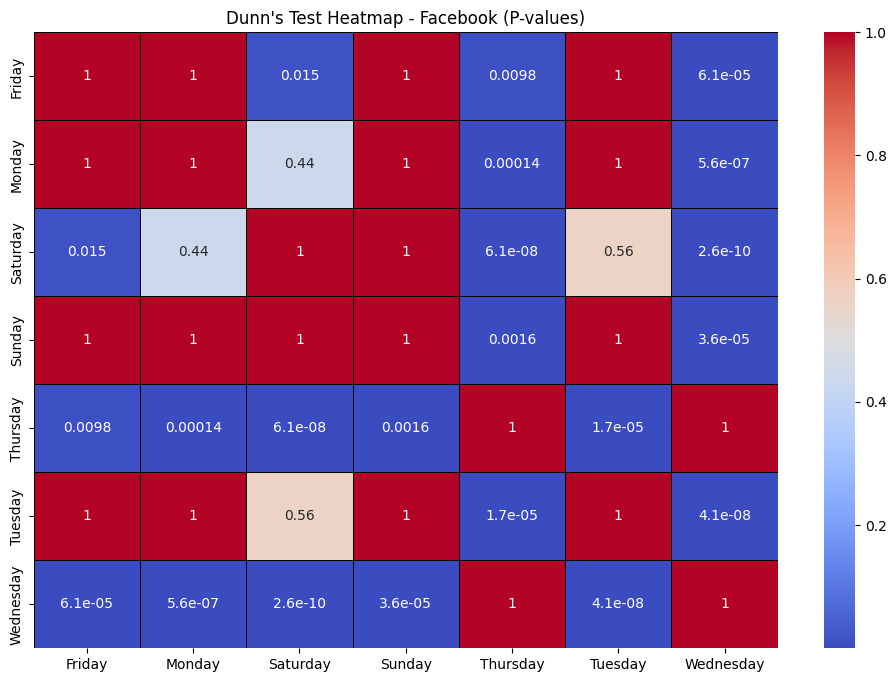

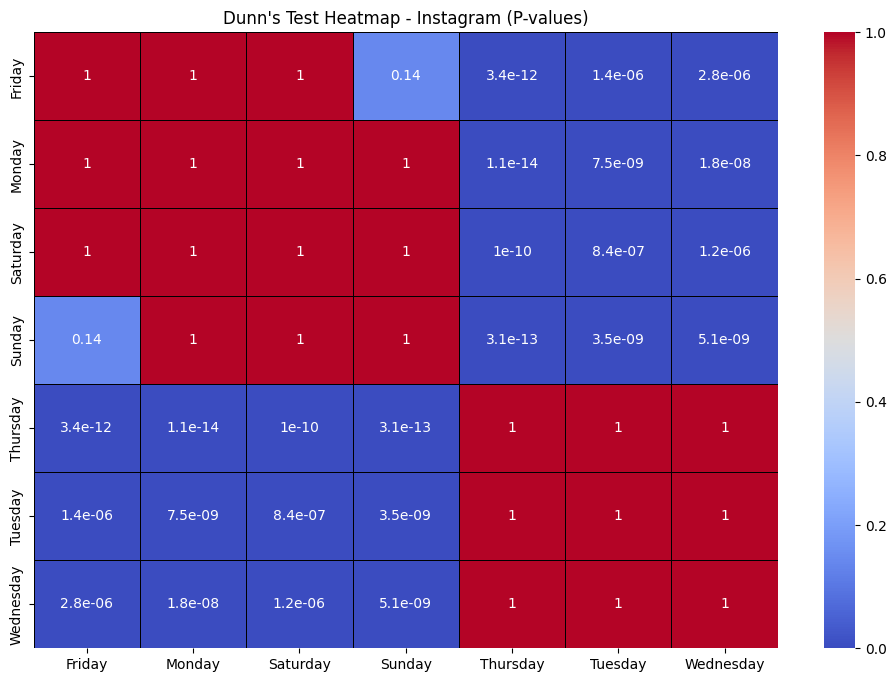

In [31]:
# Facebook Dunn’s Test
print("\nDunn’s Test for Facebook")
dunn_test_fb = sp.posthoc_dunn(FB_data, val_col='engagement_score', group_col='day', p_adjust='bonferroni')
display(dunn_test_fb)

# Instagram Dunn’s Test
print("\nDunn’s Test for Instagram")
dunn_test_ig = sp.posthoc_dunn(IG_data, val_col='engagement_score', group_col='day', p_adjust='bonferroni')
display(dunn_test_ig)

# Heatmap for Facebook
plt.figure(figsize=(12, 8))
sns.heatmap(dunn_test_fb, annot=True, cmap="coolwarm", linewidths=.5, linecolor='black')
plt.title("Dunn's Test Heatmap - Facebook (P-values)")
plt.show()

# Heatmap for Instagram
plt.figure(figsize=(12, 8))
sns.heatmap(dunn_test_ig, annot=True, cmap="coolwarm", linewidths=.5, linecolor='black')
plt.title("Dunn's Test Heatmap - Instagram (P-values)")
plt.show()

##### Results
The Dunn's Test was conducted to determine between which days there are significant differences in customer engagement on both Facebook and Instagram. This is a Post-Hoc Analysis after conducting the Kruskal-Wallis Test, which had already determined that there is a significant difference between days of the week.<br><br>
Heatmap:<br>
The heatmaps shows the p-values of the Dunn's Test for Facebook and Instagram.<Br>
- Blue cells: Significant differences (p-values < 0.05).<Br>
- Red cells: No significant differences (p-values ≥ 0.05).<Br>
- Dark blues: Very strong significant differences.<Br><Br>

Interpreting the Results:<br><br>
- Thursday stands out strongly as a day with different engagement numbers, especially on Facebook.
- Instagram has strong differences between Thursday, Tuesday, and Wednesday, indicating that a different strategy may be needed on these days.
- Blue cells are the days where action should be taken to improve engagement.<br><br><Br>


Facebook - Engagement Scores per Dag (Totaal / Aantal Posts):
day
Friday       0.002849
Monday       0.002655
Saturday     0.003832
Sunday       0.002535
Thursday     0.002883
Tuesday      0.003265
Wednesday    0.003723
Name: engagement_score, dtype: float64

Instagram - Engagement Scores per Dag (Totaal / Aantal Posts):
day
Friday       0.016756
Monday       0.016600
Saturday     0.016450
Sunday       0.017405
Thursday     0.013154
Tuesday      0.013300
Wednesday    0.014578
Name: engagement_score, dtype: float64


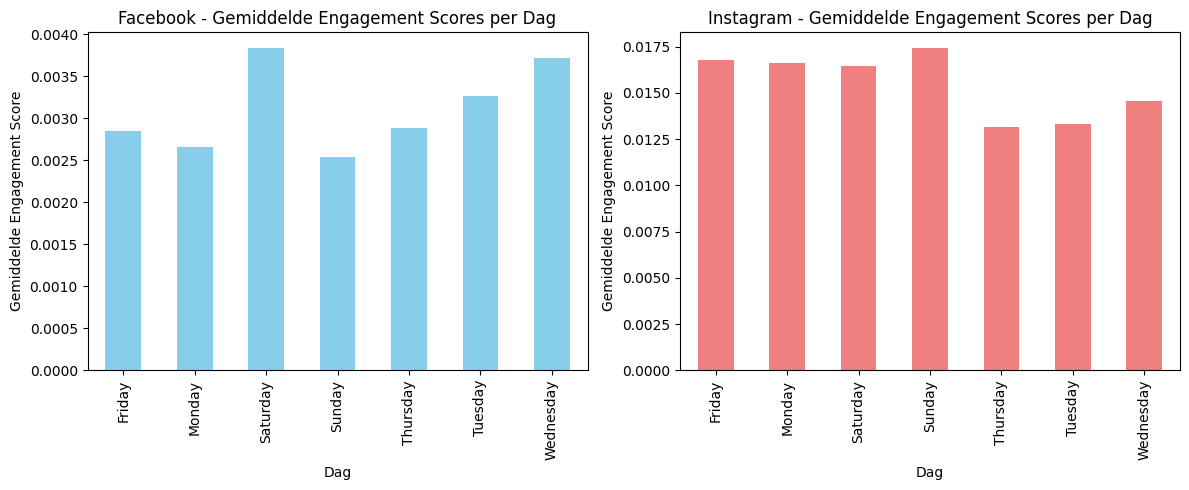

In [ ]:
# Calculate total engagement score and number of posts per day (Facebook)
fb_total_engagement = FB_data.groupby('day')['engagement_score'].sum()
fb_post_count = FB_data.groupby('day')['engagement_score'].count()

# Check for no posts on a day to avoid 'inf'
fb_mean_scores = fb_total_engagement / fb_post_count
fb_mean_scores = fb_mean_scores.replace([float('inf'), -float('inf')], 0)

# Calculate total engagement score and number of posts per day (Instagram)
ig_total_engagement = IG_data.groupby('day')['engagement_score'].sum()
ig_post_count = IG_data.groupby('day')['engagement_score'].count()

# Check for no posts on a day to avoid 'inf'
ig_mean_scores = ig_total_engagement / ig_post_count
ig_mean_scores = ig_mean_scores.replace([float('inf'), -float('inf')], 0)

# Show results
print("\nFacebook - Engagement Scores per Dag (Totaal / Aantal Posts):")
print(fb_mean_scores)

print("\nInstagram - Engagement Scores per Dag (Totaal / Aantal Posts):")
print(ig_mean_scores)

plt.figure(figsize=(12, 5))

# Facebook Plot
plt.subplot(1, 2, 1)
fb_mean_scores.plot(kind='bar', color='skyblue')
plt.title('Facebook - Gemiddelde Engagement Scores per Dag')
plt.xlabel('Dag')
plt.ylabel('Gemiddelde Engagement Score')

# Instagram Plot
plt.subplot(1, 2, 2)
ig_mean_scores.plot(kind='bar', color='lightcoral')
plt.title('Instagram - Gemiddelde Engagement Scores per Dag')
plt.xlabel('Dag')
plt.ylabel('Gemiddelde Engagement Score')

plt.tight_layout()
plt.show()

To determine which test we need for hypothesis 5.2 (Time of posting), we need to check again how this data is distributed.<br>
We will check this with the Kolmogorov-Smirnov test.<br>
As the same with the hypothesis of the day of posting we will use Anova if the data is normal distributed and Kruskal-Willis if the data is not normal distributed.


Kolmogorov-Smirnov Test results for 18:00:
KS-statistic: 0.5
P-value: 3.5967052191840807e-281
The data for 18:00 is not normally distributed.

Kolmogorov-Smirnov Test results for 16:00:
KS-statistic: 0.5
P-value: 0.0
The data for 16:00 is not normally distributed.

Kolmogorov-Smirnov Test results for 14:00:
KS-statistic: 0.5
P-value: 1.1816965655986531e-293
The data for 14:00 is not normally distributed.

Kolmogorov-Smirnov Test results for 13:00:
KS-statistic: 0.5000000579204634
P-value: 2.6711934589537654e-135
The data for 13:00 is not normally distributed.

Kolmogorov-Smirnov Test results for 15:00:
KS-statistic: 0.5000000713191501
P-value: 0.0
The data for 15:00 is not normally distributed.

Kolmogorov-Smirnov Test results for 19:00:
KS-statistic: 0.5000007603220211
P-value: 1.1117459787734477e-176
The data for 19:00 is not normally distributed.

Kolmogorov-Smirnov Test results for 02:00:
KS-statistic: 0.5000013341121023
P-value: 2.1423123072561207e-14
The data for 02:00 is not no

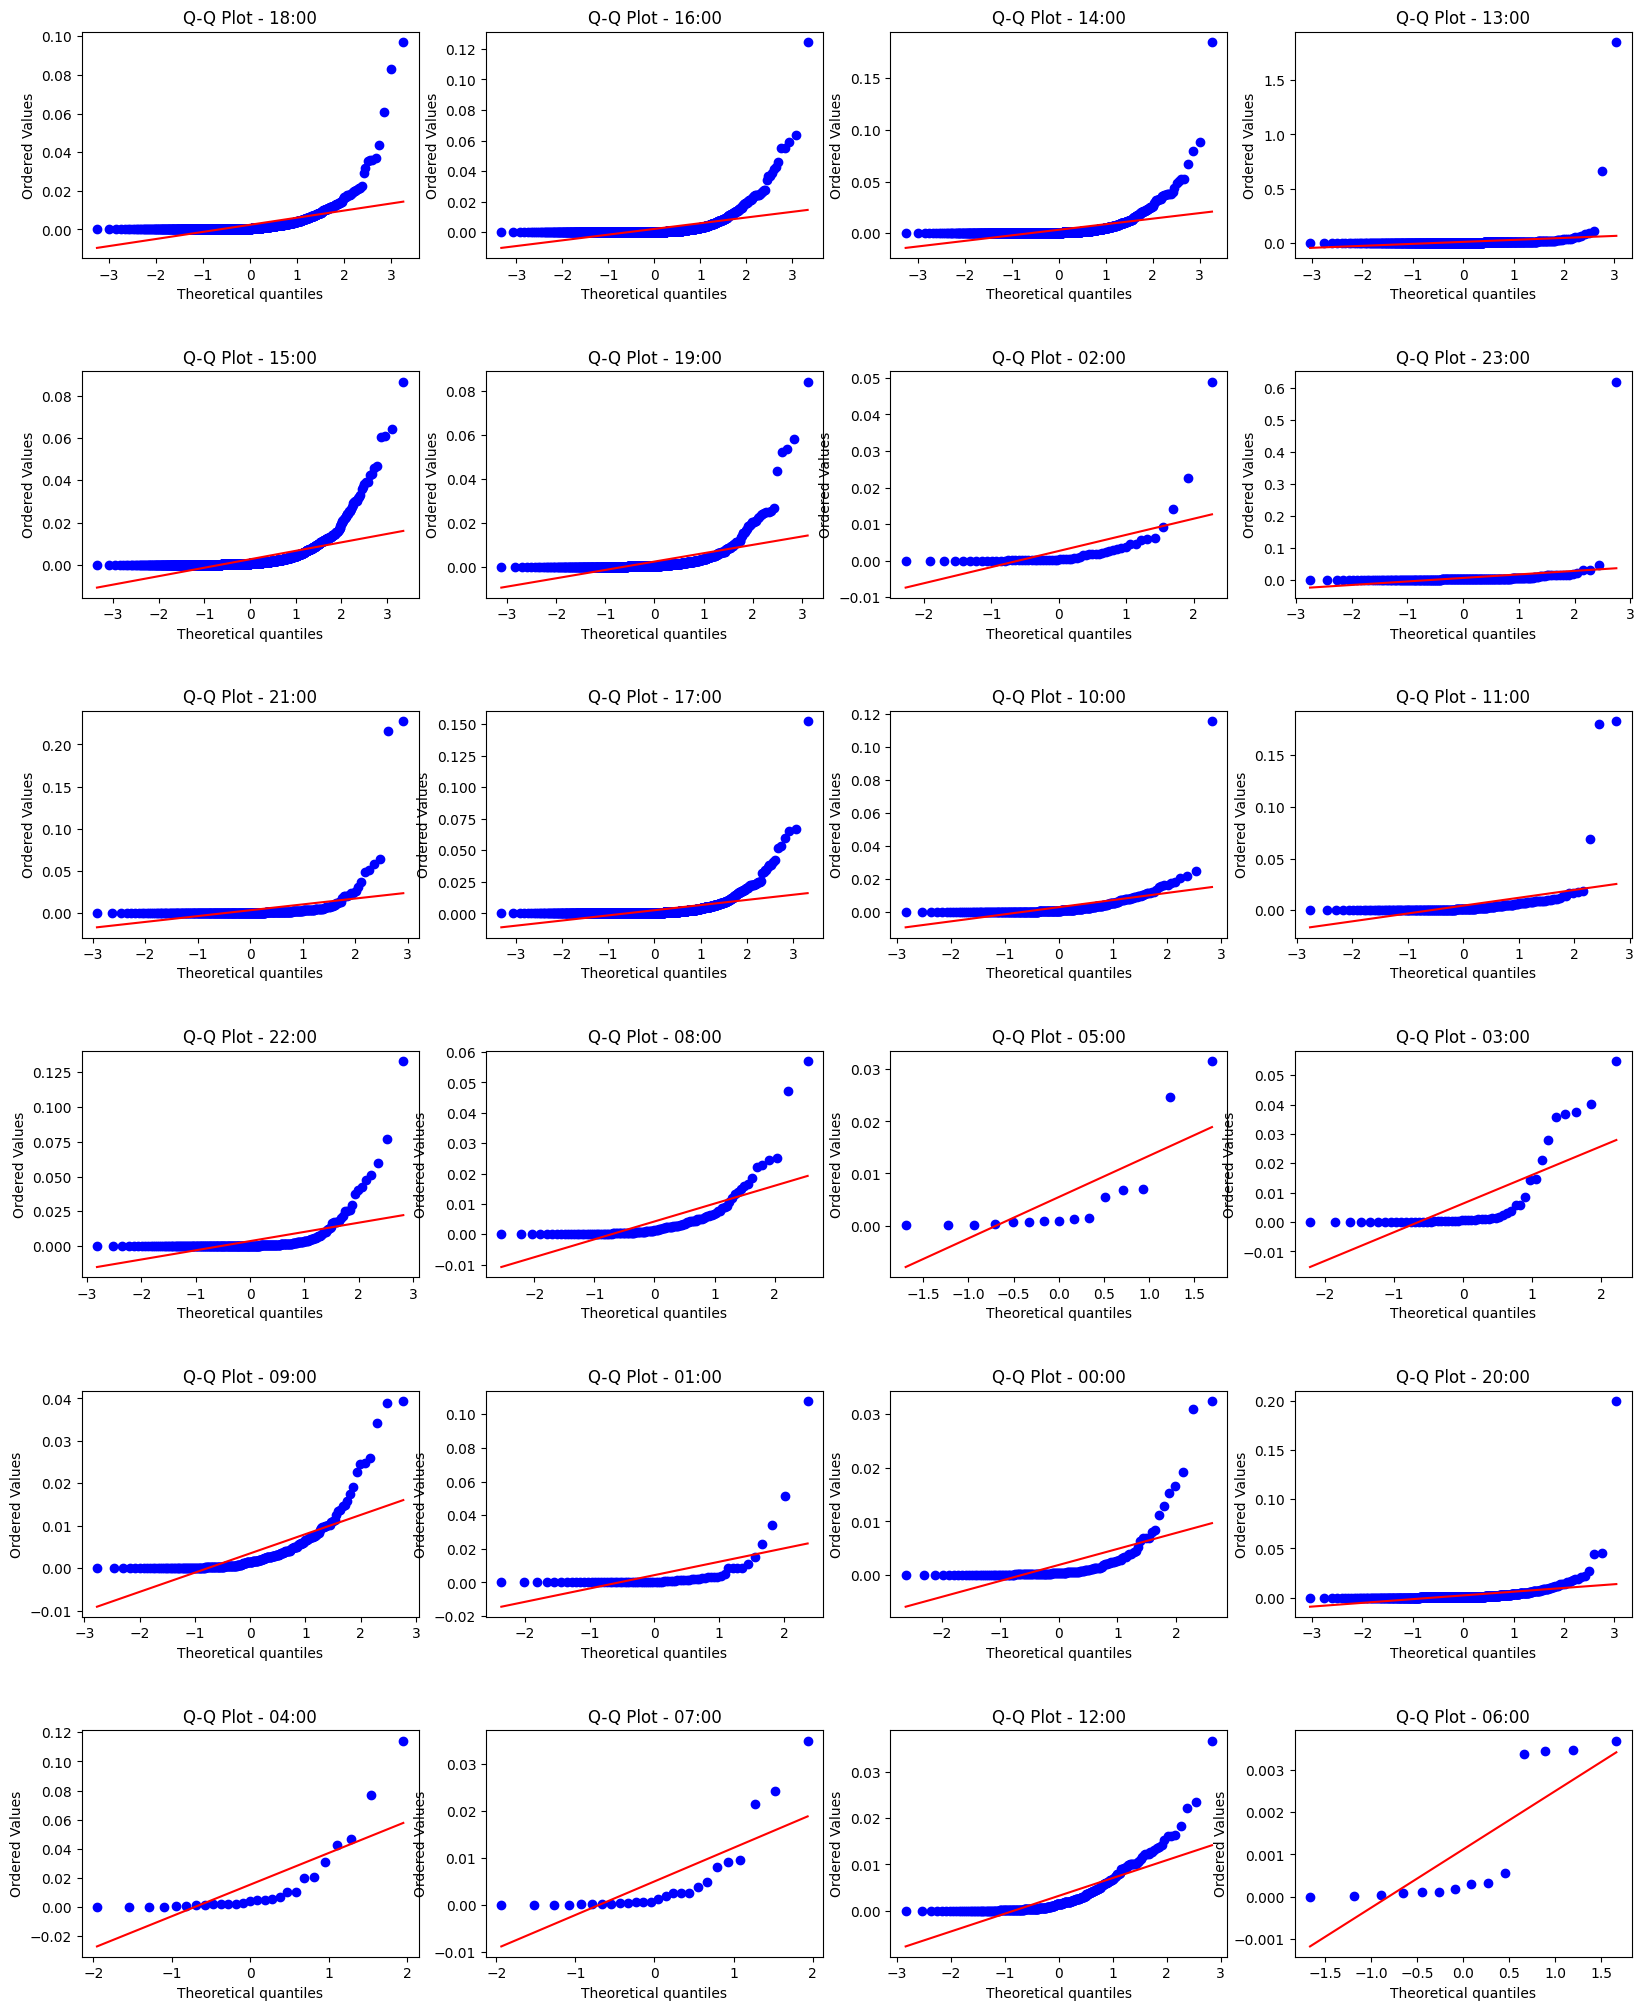


Table of KS test results per timestamp:
     Time  KS-statistic        P-value   Normality
0   18:00      0.500000  3.596705e-281  Not Normal
1   16:00      0.500000   0.000000e+00  Not Normal
2   14:00      0.500000  1.181697e-293  Not Normal
3   13:00      0.500000  2.671193e-135  Not Normal
4   15:00      0.500000   0.000000e+00  Not Normal
5   19:00      0.500001  1.111746e-176  Not Normal
6   02:00      0.500001   2.142312e-14  Not Normal
7   23:00      0.500001   2.174965e-54  Not Normal
8   21:00      0.500000   1.314148e-91  Not Normal
9   17:00      0.500000   0.000000e+00  Not Normal
10  10:00      0.500000   4.147003e-70  Not Normal
11  11:00      0.500001   1.518990e-55  Not Normal
12  22:00      0.500001   4.195703e-67  Not Normal
13  08:00      0.500000   2.397872e-30  Not Normal
14  05:00      0.500014   5.423107e-04  Not Normal
15  03:00      0.500003   1.514386e-12  Not Normal
16  09:00      0.500000   1.262500e-57  Not Normal
17  01:00      0.500003   4.284883e-18  N

In [ ]:
# Make sure the ‘time’ column is formatted correctly
FB_data['time'] = FB_data['time'].astype('category')

# List of unique times
unique_timesFB = FB_data['time'].unique()

# Create a list to store the KS statistics, p-values and normality
ks_results = []

# Create a figure for the subplots 
fig, axes = plt.subplots(6, 4, figsize=(20, 25))
fig.subplots_adjust(hspace=0.5)

# Run through every timestamp
for i, time in enumerate(unique_timesFB):
    row = i // 4  # Define the row for the subplot
    col = i % 4  # Define the column for the subplot
    
    # Get engagement scores for the specific time of day
    time_dataFB = FB_data[FB_data['time'] == time]['engagement_score']
    
    # Perform the Kolmogorov-Smirnov test against the normal distribution
    ks_stat, ks_p_value = stats.kstest(time_dataFB, 'norm')

    # Add the results to the list
    normality_status = "Normal" if ks_p_value > 0.05 else "Not Normal"
    ks_results.append([time, ks_stat, ks_p_value, normality_status])
    
    # Print results
    print(f"\nKolmogorov-Smirnov Test results for {time}:")
    print("KS-statistic:", ks_stat)
    print("P-value:", ks_p_value)

    if ks_p_value > 0.05:
        print(f"The data for {time} is normally distributed.")
    else:
        print(f"The data for {time} is not normally distributed.")

    # Create Q-Q plot
    stats.probplot(time_dataFB, dist="norm", plot=axes[row, col])
    axes[row, col].set_title(f"Q-Q Plot - {time}")

# Show plots
plt.show()

# Show results in table
ks_results_df = pd.DataFrame(ks_results, columns=["Time", "KS-statistic", "P-value", "Normality"])

# Print results
print("\nTable of KS test results per timestamp:")
print(ks_results_df)



Kolmogorov-Smirnov Test results for 18:00:
KS-statistic: 0.5
P-value: 2.724257291003746e-218
The data for 18:00 is not normally distributed.

Kolmogorov-Smirnov Test results for 16:00:
KS-statistic: 0.500042627043909
P-value: 1.2091382939514389e-300
The data for 16:00 is not normally distributed.

Kolmogorov-Smirnov Test results for 14:00:
KS-statistic: 0.5000583721681385
P-value: 2.4031293277138866e-218
The data for 14:00 is not normally distributed.

Kolmogorov-Smirnov Test results for 15:00:
KS-statistic: 0.5001053105060679
P-value: 1.53e-321
The data for 15:00 is not normally distributed.

Kolmogorov-Smirnov Test results for 02:00:
KS-statistic: 0.5001279401481661
P-value: 8.901672348483591e-10
The data for 02:00 is not normally distributed.

Kolmogorov-Smirnov Test results for 13:00:
KS-statistic: 0.5000024762141391
P-value: 4.191781850289824e-67
The data for 13:00 is not normally distributed.

Kolmogorov-Smirnov Test results for 21:00:
KS-statistic: 0.5000317558604973
P-value: 9

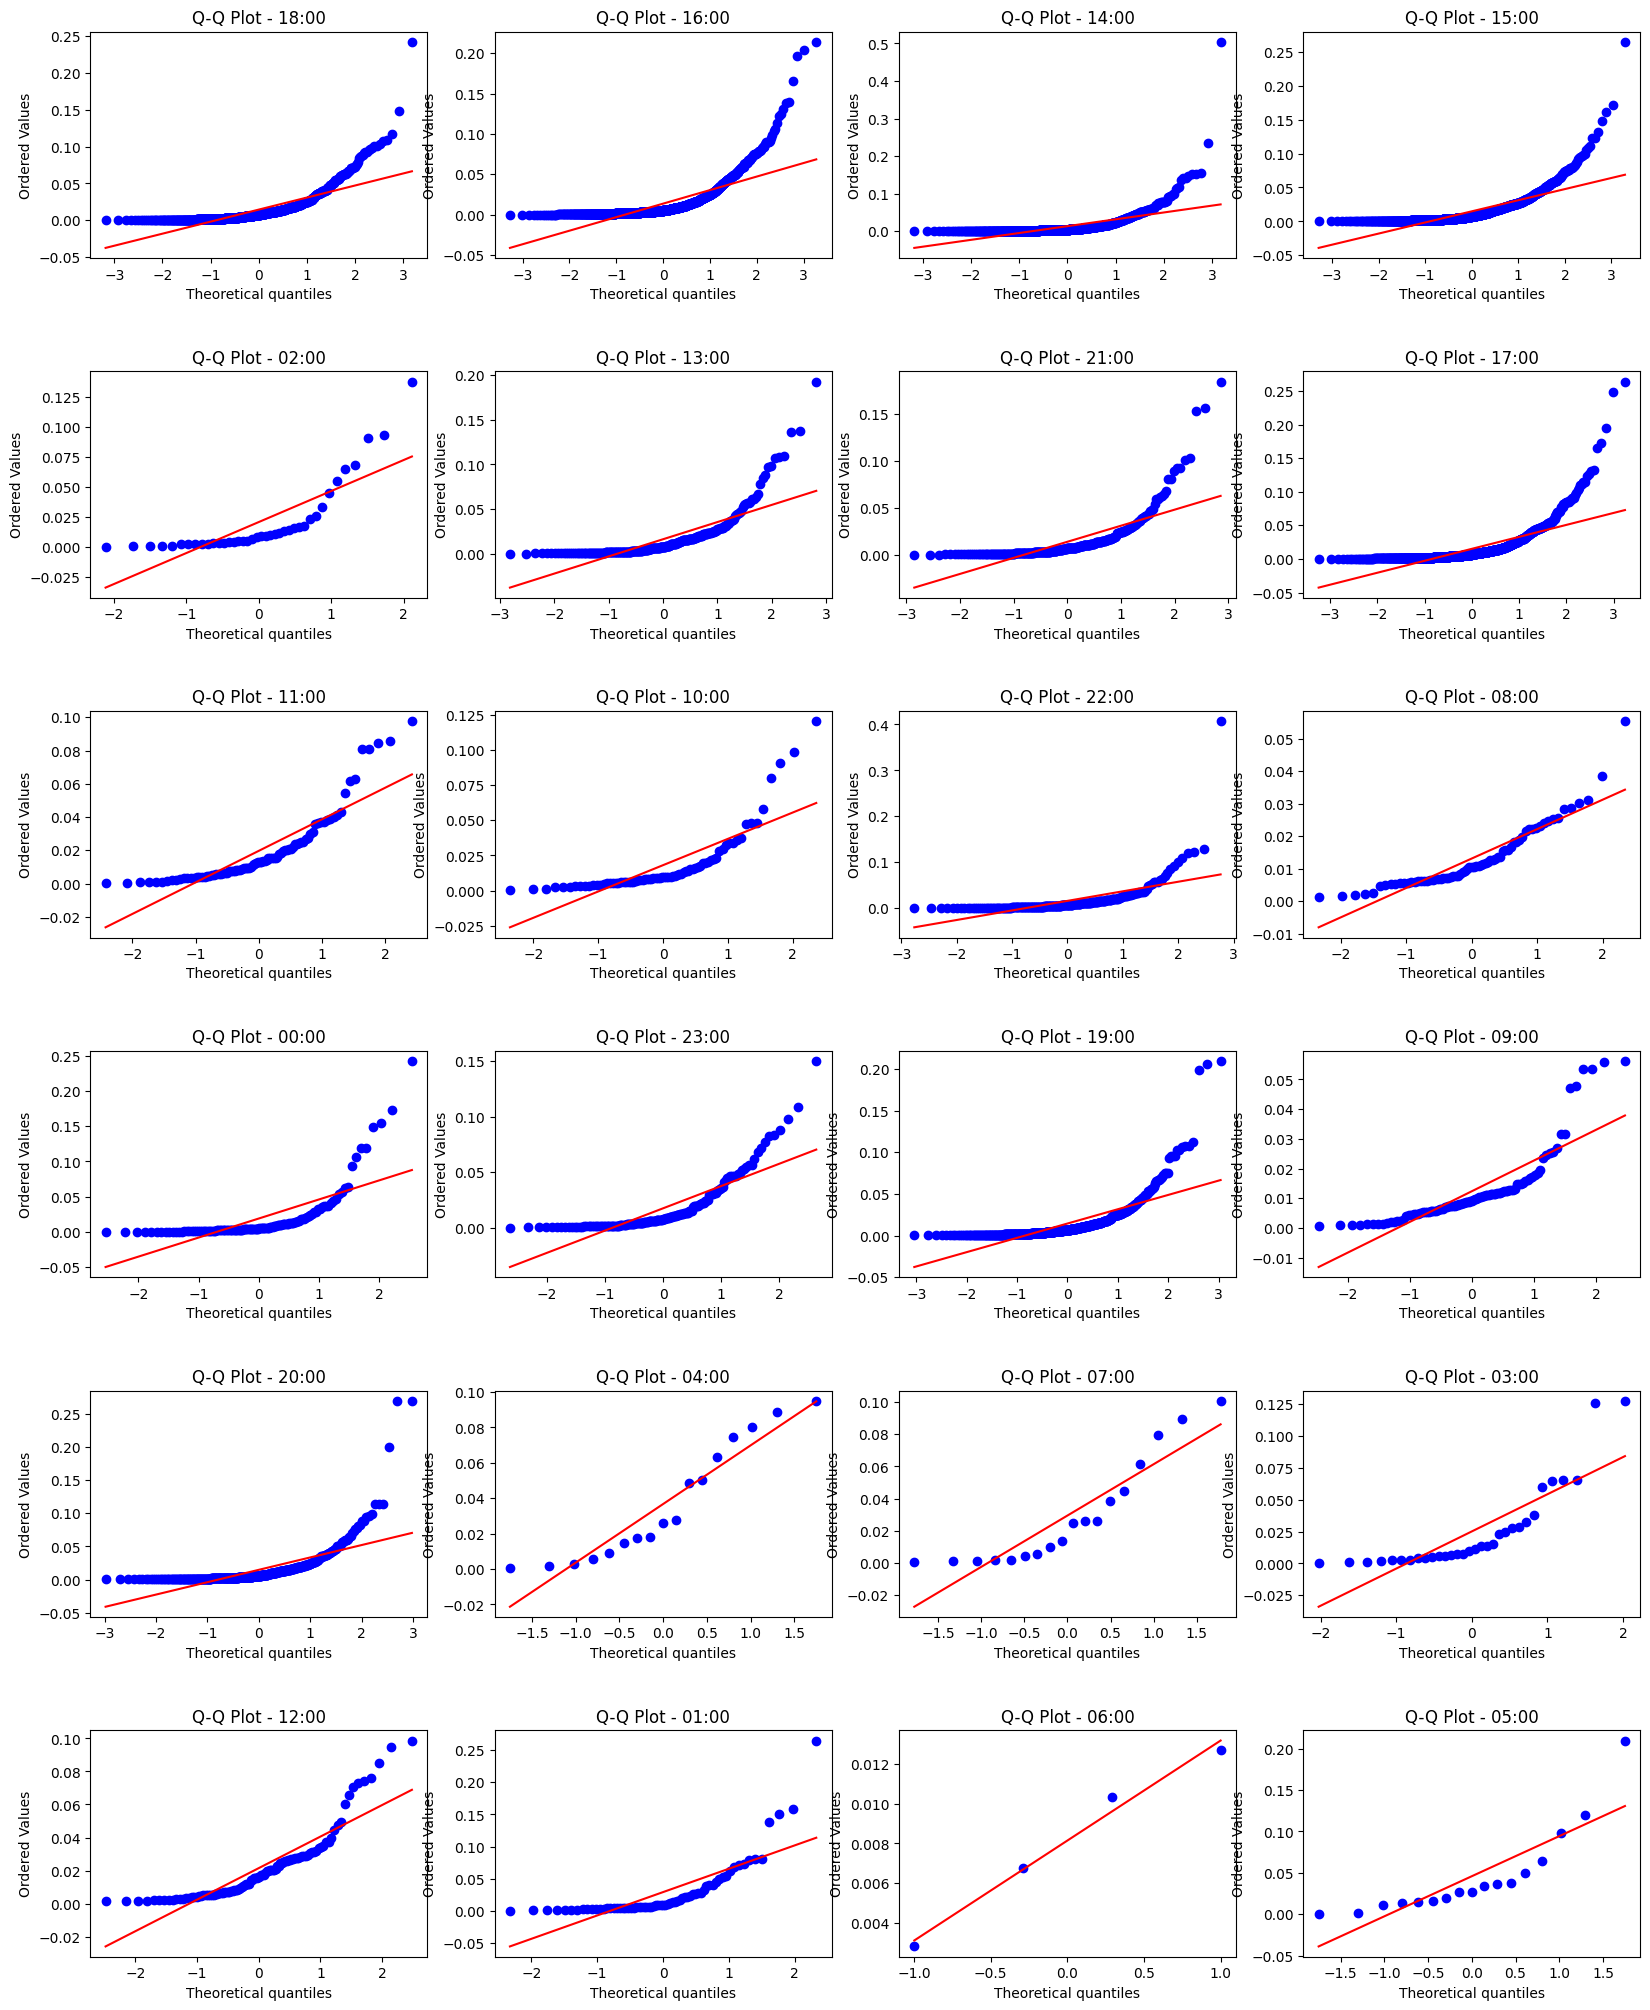


Table of KS test results per timestamp:
     Time  KS-statistic        P-value   Normality
0   18:00      0.500000  2.724257e-218  Not Normal
1   16:00      0.500043  1.209138e-300  Not Normal
2   14:00      0.500058  2.403129e-218  Not Normal
3   15:00      0.500105  1.531604e-321  Not Normal
4   02:00      0.500128   8.901672e-10  Not Normal
5   13:00      0.500002   4.191782e-67  Not Normal
6   21:00      0.500032   9.644004e-75  Not Normal
7   17:00      0.500009  2.572185e-270  Not Normal
8   11:00      0.500136   2.418315e-21  Not Normal
9   10:00      0.500172   4.160906e-18  Not Normal
10  22:00      0.500085   5.947156e-57  Not Normal
11  08:00      0.500527   5.634902e-17  Not Normal
12  00:00      0.500018   1.178013e-29  Not Normal
13  23:00      0.500060   2.259356e-39  Not Normal
14  19:00      0.500134  1.559641e-136  Not Normal
15  09:00      0.500298   6.650396e-24  Not Normal
16  20:00      0.500140  8.702258e-112  Not Normal
17  04:00      0.500309   1.848242e-04  N

In [ ]:
# Make sure the ‘time’ column is formatted correctly
IG_data['time'] = IG_data['time'].astype('category')

# List of unique times
unique_timesIG = IG_data['time'].unique()

# Create a list to store the KS statistics, p-values and normality
ks_resultsIG = []

# Create a figure for the subplots 
fig, axes = plt.subplots(6, 4, figsize=(20, 25))
fig.subplots_adjust(hspace=0.5)

# Run through every timestamp
for i, time in enumerate(unique_timesIG):
    row = i // 4  # Define the row for the subplot
    col = i % 4  # Define the column for the subplot
    
    # Get engagement scores for the specific time of day
    time_dataIG = IG_data[IG_data['time'] == time]['engagement_score']
    
    # Perform the Kolmogorov-Smirnov test against the normal distribution
    ks_stat, ks_p_value = stats.kstest(time_dataIG, 'norm')

    # Add the results to the list
    normality_status = "Normal" if ks_p_value > 0.05 else "Not Normal"
    ks_resultsIG.append([time, ks_stat, ks_p_value, normality_status])
    
    # Print results
    print(f"\nKolmogorov-Smirnov Test results for {time}:")
    print("KS-statistic:", ks_stat)
    print("P-value:", ks_p_value)

    if ks_p_value > 0.05:
        print(f"The data for {time} is normally distributed.")
    else:
        print(f"The data for {time} is not normally distributed.")

    # Create Q-Q plot 
    stats.probplot(time_dataIG, dist="norm", plot=axes[row, col])
    axes[row, col].set_title(f"Q-Q Plot - {time}")

# Show plots
plt.show()

# Show results in a table
ks_results_dfIG = pd.DataFrame(ks_resultsIG, columns=["Time", "KS-statistic", "P-value", "Normality"])

# Print table with results
print("\nTable of KS test results per timestamp:")
print(ks_results_dfIG)

In [ ]:
# Group the data
fb_time_groups = [FB_data[FB_data['time'] == time]['engagement_score'] for time in FB_data['time'].unique()]
ig_time_groups = [IG_data[IG_data['time'] == time]['engagement_score'] for time in IG_data['time'].unique()]

# Run the Kruskal-Wallis test
kruskal_test_FB = stats.kruskal(*fb_time_groups)
kruskal_test_IG = stats.kruskal(*ig_time_groups)

# Show results
print("\nKruskal-Wallis Test voor Facebook:")
print("Facebook Kruskal-Wallis statistic:", kruskal_test_FB.statistic)
print("Facebook p-value:", kruskal_test_FB.pvalue)

print("\nKruskal-Wallis Test voor Instagram:")
print("Instagram Kruskal-Wallis statistic:", kruskal_test_IG.statistic)
print("Instagram p-value:", kruskal_test_IG.pvalue)



Kruskal-Wallis Test voor Facebook:
Facebook Kruskal-Wallis statistic: 233.62929471548188
Facebook p-value: 8.744762580192445e-37

Kruskal-Wallis Test voor Instagram:
Instagram Kruskal-Wallis statistic: 178.96923060944238
Instagram p-value: 4.0611866088927677e-26



Dunn’s Test for Facebook


,00:00,01:00,02:00,03:00,04:00,05:00,06:00,07:00,08:00,09:00,...,14:00,15:00,16:00,17:00,18:00,19:00,20:00,21:00,22:00,23:00
00:00,1.000000,1.000000,1.000000,1.00000,0.000747,1.0,1.000000,1.0,0.006089,4.748971e-03,...,1.000000e+00,3.741600e-01,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000
01:00,1.000000,1.000000,1.000000,1.00000,0.037137,1.0,1.000000,1.0,1.000000,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000
02:00,1.000000,1.000000,1.000000,1.00000,0.035354,1.0,1.000000,1.0,1.000000,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000
03:00,1.000000,1.000000,1.000000,1.00000,0.766240,1.0,1.000000,1.0,1.000000,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000
04:00,0.000747,0.037137,0.035354,0.76624,1.000000,1.0,0.198777,1.0,1.000000,1.000000e+00,...,3.959288e-02,6.956256e-02,1.442137e-04,1.179442e-03,0.003228,1.177544e-03,2.163762e-04,0.000630,1.768427e-04,0.001134
05:00,1.000000,1.000000,1.000000,1.00000,1.000000,1.0,1.000000,1.0,1.000000,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000
06:00,1.000000,1.000000,1.000000,1.00000,0.198777,1.0,1.000000,1.0,1.000000,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000
07:00,1.000000,1.000000,1.000000,1.00000,1.000000,1.0,1.000000,1.0,1.000000,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000
08:00,0.006089,1.000000,1.000000,1.00000,1.000000,1.0,1.000000,1.0,1.000000,1.000000e+00,...,1.000000e+00,1.000000e+00,1.214854e-05,1.302992e-03,0.011178,1.949155e-03,7.730482e-05,0.001116,1.619004e-04,0.006625
09:00,0.004749,1.000000,1.000000,1.00000,1.000000,1.0,1.000000,1.0,1.000000,1.000000e+00,...,1.000000e+00,1.000000e+00,5.075326e-08,6.625370e-05,0.001779,2.047561e-04,2.837844e-06,0.000197,2.416260e-05,0.003561



Dunn’s Test for Instagram


,00:00,01:00,02:00,03:00,04:00,05:00,06:00,07:00,08:00,09:00,...,14:00,15:00,16:00,17:00,18:00,19:00,20:00,21:00,22:00,23:00
00:00,1.000000,0.387341,1.0,1.0,0.272412,0.028050,1.0,1.0,0.397188,1.000000,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
01:00,0.387341,1.000000,1.0,1.0,1.000000,1.000000,1.0,1.0,1.000000,1.000000,...,1.449768e-03,1.000000e+00,2.042201e-02,1.000000,1.000000,0.948569,0.135773,0.273942,1.000000,1.000000
02:00,1.000000,1.000000,1.0,1.0,1.000000,1.000000,1.0,1.0,1.000000,1.000000,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
03:00,1.000000,1.000000,1.0,1.0,1.000000,1.000000,1.0,1.0,1.000000,1.000000,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
04:00,0.272412,1.000000,1.0,1.0,1.000000,1.000000,1.0,1.0,1.000000,1.000000,...,3.332489e-02,1.000000e+00,1.134711e-01,0.766921,0.984846,0.677773,0.240854,0.314536,0.722655,1.000000
05:00,0.028050,1.000000,1.0,1.0,1.000000,1.000000,1.0,1.0,1.000000,1.000000,...,2.157253e-03,1.693148e-01,8.787182e-03,0.081994,0.110625,0.072102,0.021664,0.030204,0.081441,0.380876
06:00,1.000000,1.000000,1.0,1.0,1.000000,1.000000,1.0,1.0,1.000000,1.000000,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
07:00,1.000000,1.000000,1.0,1.0,1.000000,1.000000,1.0,1.0,1.000000,1.000000,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
08:00,0.397188,1.000000,1.0,1.0,1.000000,1.000000,1.0,1.0,1.000000,1.000000,...,1.338942e-03,1.000000e+00,1.963450e-02,1.000000,1.000000,0.966354,0.135331,0.276591,1.000000,1.000000
09:00,1.000000,1.000000,1.0,1.0,1.000000,1.000000,1.0,1.0,1.000000,1.000000,...,3.469184e-02,1.000000e+00,4.861540e-01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


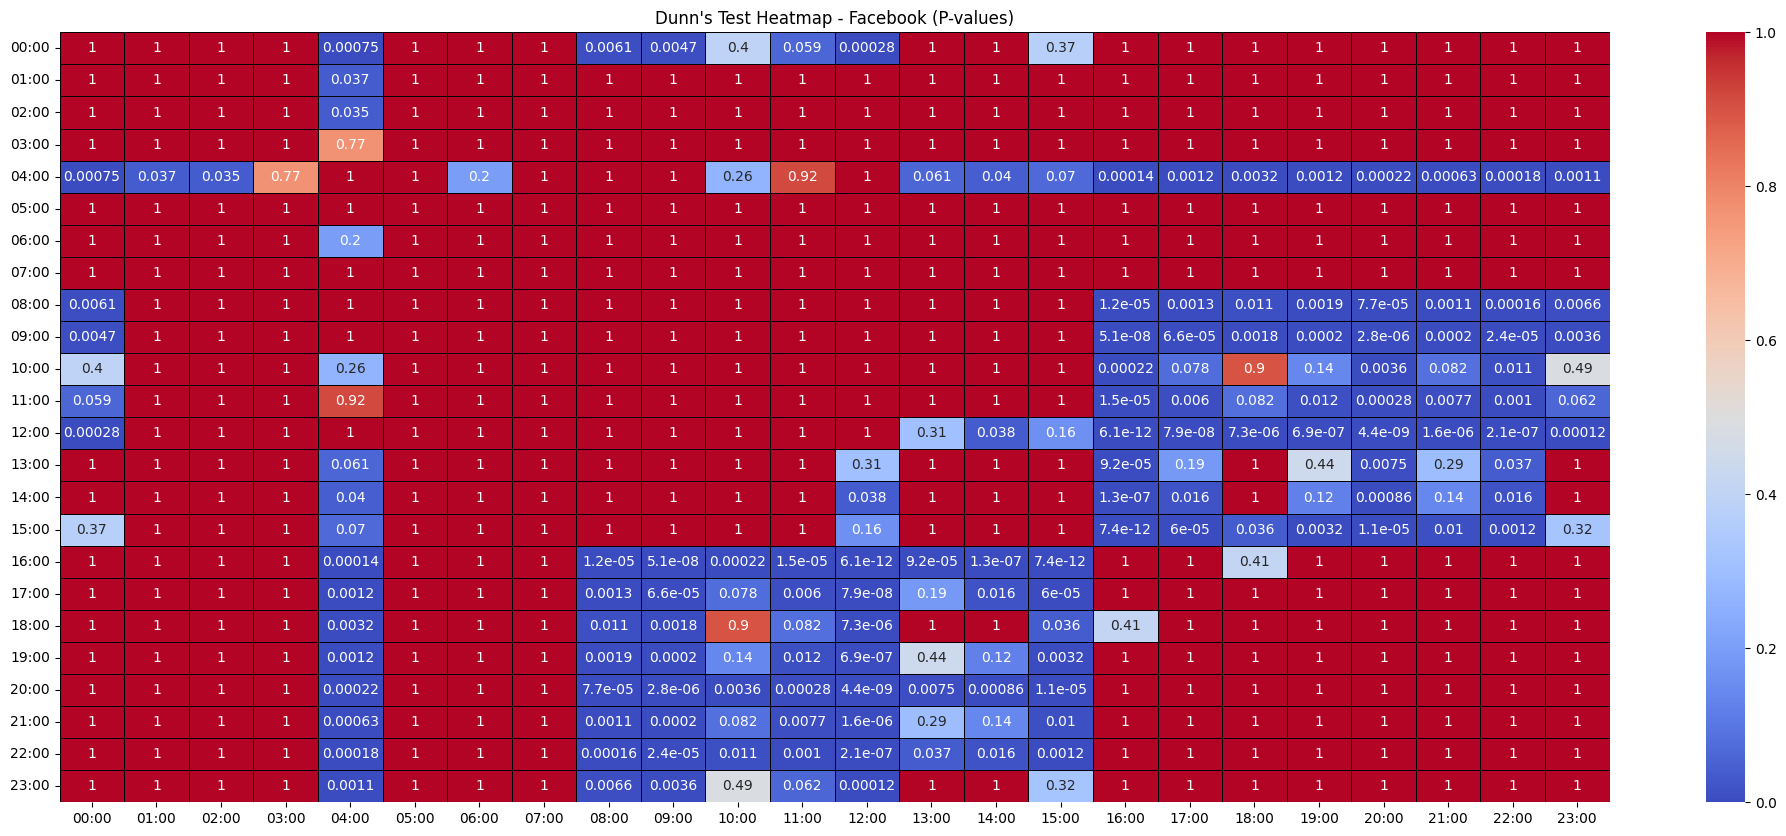

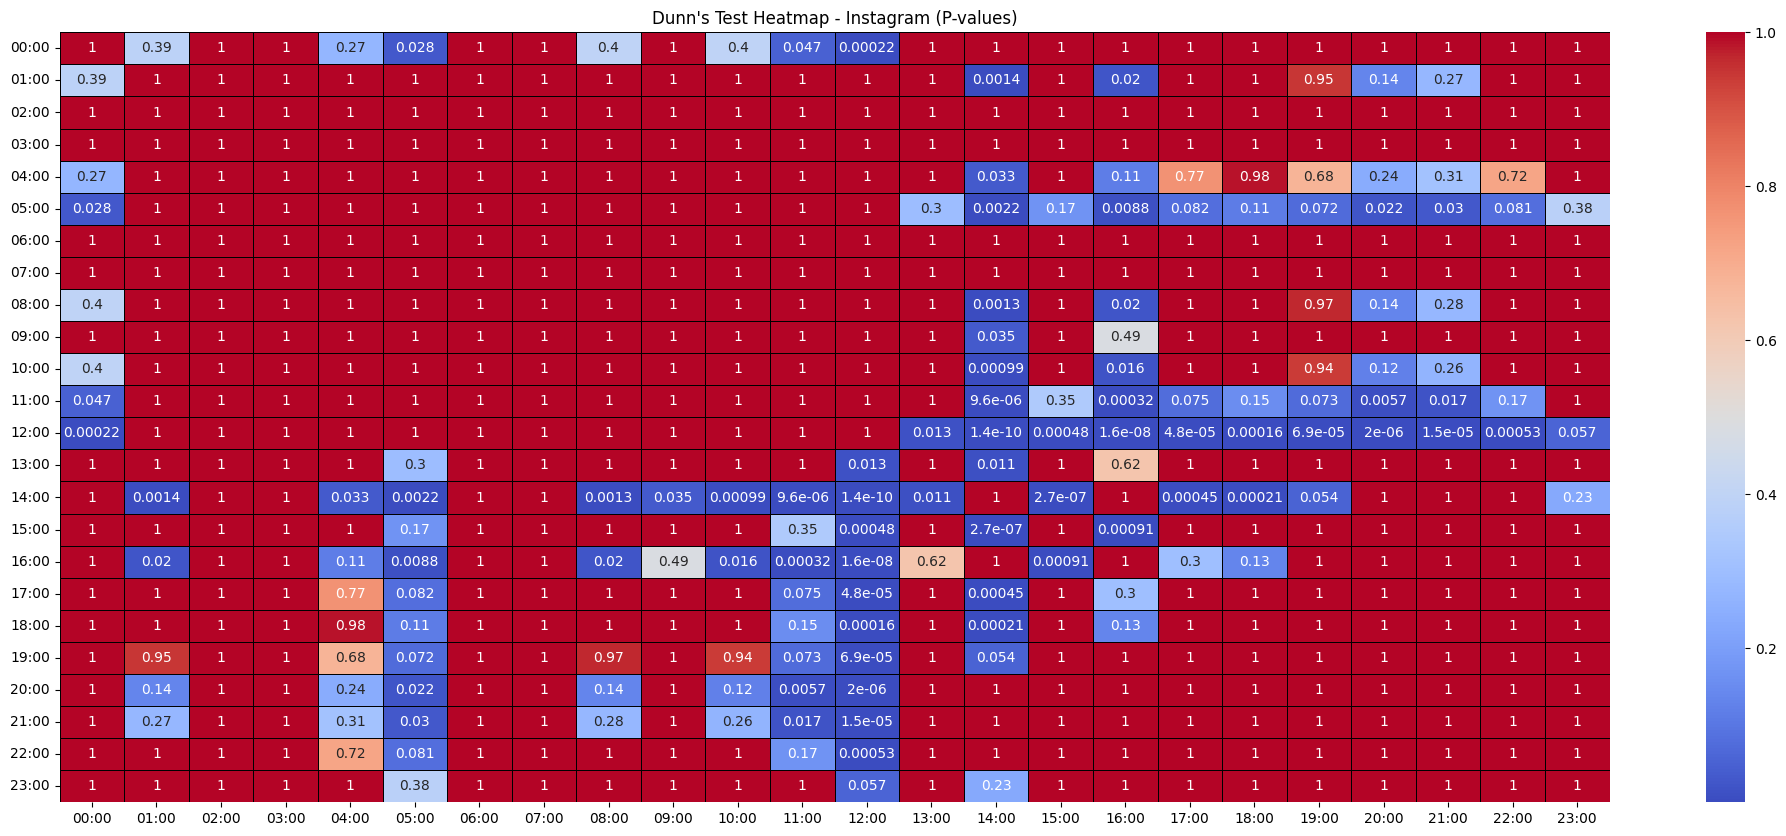

In [36]:
# Facebook Dunn’s Test
print("\nDunn’s Test for Facebook")
dunn_testTime_fb = sp.posthoc_dunn(FB_data, val_col='engagement_score', group_col='time', p_adjust='bonferroni')
display(dunn_testTime_fb)

# Instagram Dunn’s Test
print("\nDunn’s Test for Instagram")
dunn_testTime_ig = sp.posthoc_dunn(IG_data, val_col='engagement_score', group_col='time', p_adjust='bonferroni')
display(dunn_testTime_ig)

# Heatmap for Facebook
plt.figure(figsize=(25, 10))
sns.heatmap(dunn_testTime_fb, annot=True, cmap="coolwarm", linewidths=.5, linecolor='black')
plt.title("Dunn's Test Heatmap - Facebook (P-values)")
plt.show()

# Heatmap for Instagram
plt.figure(figsize=(25, 10))
sns.heatmap(dunn_testTime_ig, annot=True, cmap="coolwarm", linewidths=.5, linecolor='black')
plt.title("Dunn's Test Heatmap - Instagram (P-values)")
plt.show()

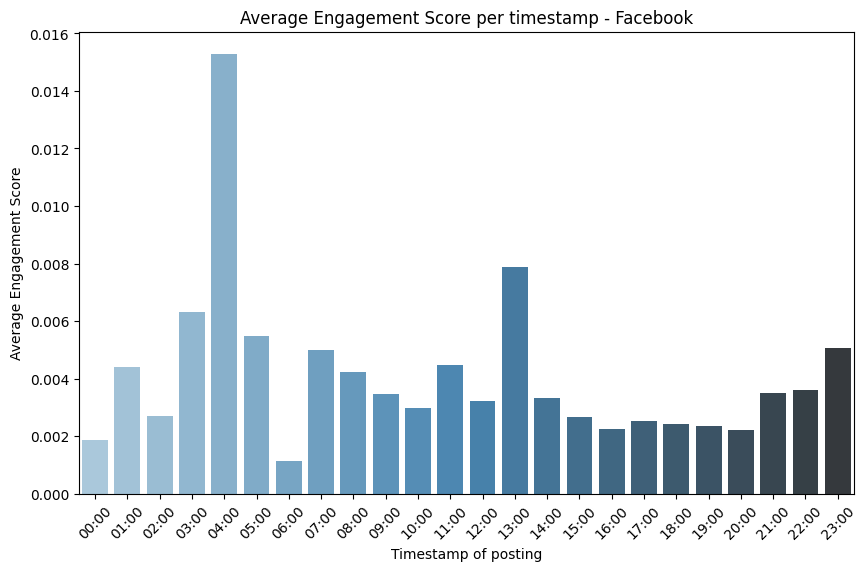

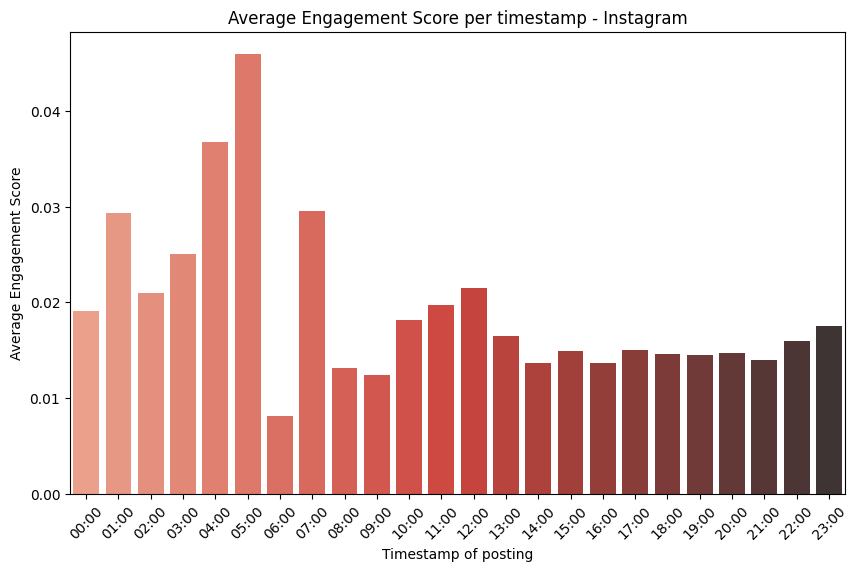

In [ ]:
# Calculate the average engagement score by time of day for Facebook
fb_avg_engagement = FB_data.groupby('time')['engagement_score'].mean()

# Calculate the average engagement score by time of day for Instagram
ig_avg_engagement = IG_data.groupby('time')['engagement_score'].mean()

# Plot for Facebook
plt.figure(figsize=(10, 6))
sns.barplot(x=fb_avg_engagement.index, y=fb_avg_engagement.values, palette='Blues_d')
plt.title('Average Engagement Score per timestamp - Facebook')
plt.xlabel('Timestamp of posting')
plt.ylabel('Average Engagement Score')
plt.xticks(rotation=45)
plt.show()

# Plot for Instagram
plt.figure(figsize=(10, 6))
sns.barplot(x=ig_avg_engagement.index, y=ig_avg_engagement.values, palette='Reds_d')
plt.title('Average Engagement Score per timestamp - Instagram')
plt.xlabel('Timestamp of posting')
plt.ylabel('Average Engagement Score')
plt.xticks(rotation=45)
plt.show()

# Customer Engagement Analysis on Facebook and Instagram using Multilevel Analyse

## Research Objective

This analysis investigates which factors influence **customer engagement** on social media posts by videogame publishers, on **Facebook and Instagram**.

Customer engagement is a crucial metric for brand growth, community building, and digital visibility. We aim to identify actionable determinants that increase engagement across both platforms.

## Purpose of the Model

A  **multilevel model** is a statistical technique used when data is **nested** — that is, when individual observations are grouped within higher-level units.

In our case:
- Each **social media post** (observation) belongs to a specific **game publisher profile** (group).
- We assume that **some effects vary between publishers** (e.g., some profiles benefit more from entertainment content than others).

Therefore, we use a model that can:
- Estimate **overall effects** across all profiles (fixed effects),
- And allow **certain effects to vary per profile** (random effects).

### Model design:

- **Fixed intercept** → All profiles start at the same engagement baseline
- **Random slopes** → The effect of certain variables (like content type or followers) may vary by profile



In [25]:
from rpy2 import robjects
robjects.r('.libPaths("/opt/anaconda3/envs/DMS/lib/R/library")')

**Facebook**

In [29]:
# Convert categorical variables
FB_data['media_type'] = FB_data['media_type'].astype('category')
FB_data['contentpurpose'] = FB_data['contentpurpose'].astype('category')
FB_data['profile'] = FB_data['profile'].astype('category')
FB_data['day'] = FB_data['day'].astype('category')

# Define the multilevel model
# ----------------------------------------------------
# This model includes:
# - Fixed intercept (same baseline engagement for all profiles)
# - Fixed effects for: media_type, content_type, followers, day, time
# - Random slope for content_type per profile
# 
# Why?
# - We expect that the effect of content type (H2) varies between game publishers (profiles)
# - But we assume that all profiles start from the same baseline engagement level

model_fb = Lmer('engagement_score ~ media_type + contentpurpose + number_of_followers + day + time + (0 + contentpurpose | profile)',data=FB_data)

# Fit the model
result_fb = model_fb.fit()
display(result_fb)

boundary (singular) fit: see help('isSingular') 

Linear mixed model fit by REML [’lmerMod’]
Formula: engagement_score~media_type+contentpurpose+number_of_followers+day+time+(0+contentpurpose|profile)

Family: gaussian	 Inference: parametric

Number of observations: 11802	 Groups: {'profile': 11.0}

Log-likelihood: 28995.606 	 AIC: -57867.213

Random effects:

                                      Name  Var    Std
profile        contentpurposeEntertainment  0.0  0.003
profile          contentpurposeInformative  0.0  0.004
profile            contentpurposePromotion  0.0  0.002
profile         contentpurposeReward-Based  0.0  0.002
profile   contentpurposeSocial/Interactive  0.0  0.004
profile              contentpurposeUnknown  0.0  0.012
Residual                                    0.0  0.020

                                      IV1                               IV2  \
profile       contentpurposeEntertainment         contentpurposeInformative   
profile       contentpurposeEntertainm

,Estimate,2.5_ci,97.5_ci,SE,DF,T-stat,P-val,Sig
(Intercept),0.007,-0.002,0.017,0.005,25.900,1.464,0.155,
media_typePhoto Only,0.006,0.001,0.012,0.003,11468.192,2.162,0.031,*
media_typeText + Photo,-0.002,-0.010,0.006,0.004,24.427,-0.505,0.618,
media_typeText + Video,-0.002,-0.010,0.006,0.004,24.495,-0.596,0.556,
media_typeText Only,-0.003,-0.011,0.005,0.004,27.618,-0.657,0.516,
media_typeVideo Only,0.004,-0.002,0.010,0.003,11714.722,1.241,0.215,
contentpurposeInformative,0.000,-0.001,0.002,0.001,7.541,0.216,0.835,
contentpurposePromotion,-0.001,-0.003,0.001,0.001,50.305,-0.952,0.345,
contentpurposeReward-Based,-0.001,-0.004,0.001,0.001,19.652,-1.146,0.266,
contentpurposeSocial/Interactive,-0.000,-0.002,0.001,0.001,5.598,-0.564,0.595,


### Interpretation of Multilevel Model Output (Facebook)

This section explains the results from the multilevel model that analyzes what influences **engagement scores** on Facebook posts from video game publishers.

---

#### What the Output Means

**Model Components**

| Term | Meaning |
|------|---------|
| **Fixed effects** | Effects that are assumed to be the same across all publishers |
| **Random effects** | Effects that are allowed to vary between publishers (`profile`) |
| **Estimate** | The predicted size and direction of the effect |
| **SE (Standard Error)** | Measures uncertainty around the estimate |
| **2.5_ci / 97.5_ci** | Confidence interval: we are 95% sure the true effect lies in this range |
| **T-stat** | Test statistic used to assess if the effect is significantly different from 0 |
| **P-val** | Probability that the effect is due to chance. If **p < 0.05**, it's significant |
| **Sig** | Star notation: `*` = significant at 0.05 level, `***` = highly significant |

---

#### Interpretation of Key Results

**1. **Media Type** (H1)**

| Media Type                | Estimate | P-val | Significant? | Interpretation |
|---------------------------|----------|--------|--------------|----------------|
| `Photo Only`              | +0.006   | 0.031  | Yes        | Pure photo posts perform significantly better |
| `Text + Photo / Video`    | ~ -0.002 | > 0.5  | No         | No added benefit from combining text and media |
| `Text Only`, `Video Only` | ~ -0.003 / +0.004 | > 0.2 |  No | Not statistically significant |

**Conclusion (H1):** *Only photo-only posts significantly increase engagement.*

---

**2. **Content Purpose** (H2)**

| Category                  | Estimate | P-val | Significant? |
|---------------------------|----------|--------|--------------|
| `Informative`             | 0.000    | 0.835  |  No         |
| `Reward-Based`, etc.      | ~ -0.001 | > 0.2  |  No         |

**Conclusion (H2):** *No type of content purpose significantly impacts engagement.*

**Extra note:** The **random slope variance** for content purpose was **0**, meaning its effect did **not vary** between publishers.

---

**3. **Followers** (H4)**

| Variable              | Estimate | P-val | Significant? | Interpretation |
|-----------------------|----------|--------|--------------|----------------|
| `number_of_followers` | ~ -0.000 | < 0.001 | Yes       | Having more followers slightly **decreases** the engagement ratio |

**Conclusion (H4):** *More followers = lower engagement per follower. Likely due to dilution effect.*

---

**4. **Day of Posting** (H5 - Part 1)**

| Day         | Estimate | P-val | Significant? |
|-------------|----------|--------|--------------|
| `Wednesday` | +0.001   | 0.038  | Yes        |
| All others  | ~ 0      | > 0.1  |  No         |

**Conclusion (H5.1):** *Wednesday is the best-performing day for engagement.*

---

**5. **Time of Posting** (H5 - Part 2)**

| Time     | Estimate | P-val | Significant? |
|----------|----------|--------|--------------|
| `04:00`  | +0.011   | 0.011  | Yes        |
| `13:00`  | +0.004   | 0.032  | Yes        |
| Others   | ~ 0      | > 0.1  | No         |

**Conclusion (H5.2):** *Best times to post: early morning (04:00) and lunch (13:00).*
**Note on Time Zone Differences**

It is important to note that the observed optimal posting times (e.g. 04:00 and 13:00) are **based on the original timestamps in the dataset**, which may reflect the **time zone of the publisher’s account** or the platform's server settings.

Therefore, these time-based effects on engagement may vary depending on:

- **The geographic location of the gaming studio (publisher)** posting the content
- **The location of the majority of their followers** (i.e. audience time zone)

**Implication:**  
While early morning posting appears most effective on average, publishers should consider **audience location analytics** (e.g., Meta Business Suite) to **align post timing with their specific follower base**.

---

**Note on Model Fit**

> `boundary (singular) fit` warning:
This means that the model tried to estimate variation in `contentpurpose` between profiles, but the **variance was estimated to be zero**. In practical terms: *all publishers behave similarly with respect to content type.*

---

### Summary Table

| Variable                  | Effect on Engagement | Significance | Note |
|---------------------------|----------------------|--------------|------|
| Media: Photo Only         | Positive             | Yes            | Best performing format |
| Media: Video / Text Combo | Neutral              | No           | No clear benefit |
| Content Purpose           | None                 | No            | No significant category |
| Number of Followers       | Negative             | Yes            | Slight decline in engagement ratio |
| Wednesday                 | Positive             | Yes            | Best day to post |
| 04:00 & 13:00             | Positive             | Yes            | Best time slots |

---

### Final Conclusion

This analysis shows that to improve engagement on Facebook, video game publishers should:
- Focus on **pure photo content**
- Post preferably on **Wednesdays**, at **04:00 or 13:00**, but keep in mind the limitation on time zone differences.
- Understand that **larger audiences dilute engagement ratios**
- Not rely heavily on **content purpose**, which showed no consistent effect

Next steps: Repeat this analysis for Instagram and after that evaluate platform differences.

**Instagram**

In [30]:
# Convert categorical variables
IG_data['media_type'] = IG_data['media_type'].astype('category')
IG_data['contentpurpose'] = IG_data['contentpurpose'].astype('category')
IG_data['profile'] = IG_data['profile'].astype('category')
IG_data['day'] = IG_data['day'].astype('category')

# Define the multilevel model
# ----------------------------------------------------
# This model includes the same structure as the model for Facebook:
# - Fixed intercept (same baseline engagement for all profiles)
# - Fixed effects for: media_type, content_type, followers, day, time
# - Random slope for content_type per profile
# 
# Why?
# - We expect that the effect of content type (H2) varies between game publishers (profiles)
# - But we assume that all profiles start from the same baseline engagement level

model_ig = Lmer('engagement_score ~ media_type + contentpurpose + number_of_followers + day + time + (0 + contentpurpose | profile)',data=IG_data)

# Fit the model
result_ig = model_ig.fit()
display(result_ig)

boundary (singular) fit: see help('isSingular') 

Linear mixed model fit by REML [’lmerMod’]
Formula: engagement_score~media_type+contentpurpose+number_of_followers+day+time+(0+contentpurpose|profile)

Family: gaussian	 Inference: parametric

Number of observations: 8594	 Groups: {'profile': 11.0}

Log-likelihood: 20937.677 	 AIC: -41755.355

Random effects:

                                      Name  Var    Std
profile        contentpurposeEntertainment  0.0  0.012
profile          contentpurposeInformative  0.0  0.012
profile            contentpurposePromotion  0.0  0.015
profile         contentpurposeReward-Based  0.0  0.016
profile   contentpurposeSocial/Interactive  0.0  0.011
profile              contentpurposeUnknown  0.0  0.022
Residual                                    0.0  0.021

                                      IV1                               IV2  \
profile       contentpurposeEntertainment         contentpurposeInformative   
profile       contentpurposeEntertainme

,Estimate,2.5_ci,97.5_ci,SE,DF,T-stat,P-val,Sig
(Intercept),0.042,0.025,0.059,0.009,13.197,4.790,0.000,***
media_typeText + Photo,-0.019,-0.032,-0.006,0.007,11.169,-2.854,0.015,*
media_typeText + Video,-0.017,-0.030,-0.004,0.007,11.215,-2.556,0.026,*
media_typeVideo Only,-0.025,-0.042,-0.008,0.009,248.462,-2.871,0.004,**
contentpurposeInformative,-0.000,-0.002,0.002,0.001,14.436,-0.124,0.903,
contentpurposePromotion,0.002,-0.001,0.005,0.001,17.271,1.112,0.281,
contentpurposeReward-Based,0.002,-0.003,0.007,0.003,5.532,0.844,0.433,
contentpurposeSocial/Interactive,-0.002,-0.003,-0.000,0.001,31.234,-2.054,0.048,*
number_of_followers,-0.000,-0.000,-0.000,0.000,79.688,-2.760,0.007,**
dayMonday,-0.001,-0.002,0.001,0.001,8527.162,-1.186,0.236,


### Interpretation of Multilevel Model Output (Instagram)

This section explains the results from the multilevel model that analyzes what influences **engagement scores** on Instagram posts from video game publishers.

---

#### What the Output Means

**Model Components**

| Term | Meaning |
|------|---------|
| **Fixed effects** | Effects that are assumed to be the same across all publishers |
| **Random effects** | Effects that are allowed to vary between publishers (`profile`) |
| **Estimate** | The predicted size and direction of the effect |
| **SE (Standard Error)** | Measures uncertainty around the estimate |
| **2.5_ci / 97.5_ci** | Confidence interval: we are 95% sure the true effect lies in this range |
| **T-stat** | Test statistic used to assess if the effect is significantly different from 0 |
| **P-val** | Probability that the effect is due to chance. If **p < 0.05**, it's significant |
| **Sig** | Star notation: `*` = significant at 0.05 level, `***` = highly significant |

---

#### Interpretation of Key Results

**1. Media Type (H1)**

| Media Type                | Estimate | P-val | Significant? | Interpretation |
|---------------------------|----------|--------|--------------|----------------|
| `Text + Photo`            | -0.019   | 0.015  | Yes        | Significantly lower engagement than baseline (likely pure photo) |
| `Text + Video`            | -0.017   | 0.026  | Yes        | Also significantly lower engagement |
| `Video Only`              | -0.025   | 0.004  | Yes        | Lower engagement than photo-only posts |

**Conclusion (H1):** *Mixed media posts underperform. Pure photo content likely works best on Instagram.*

---

**2.Content Purpose (H2)**

| Category                  | Estimate | P-val | Significant? |
|---------------------------|----------|--------|--------------|
| `Informative`             | -0.000   | 0.903  | No         |
| `Promotion`               | +0.002   | 0.281  | No         |
| `Reward-Based`            | +0.002   | 0.433  | No         |
| `Social/Interactive`      | -0.002   | 0.048  | Yes        |

**Conclusion (H2):** *Only social/interactive content types slightly reduce engagement. All others have no significant effect.*

**Extra note:** The **random slope variance** for content purpose was **0**, meaning its effect did **not vary** between publishers.

---

**3.Followers (H4)**

| Variable              | Estimate | P-val | Significant? | Interpretation |
|-----------------------|----------|--------|--------------|----------------|
| `number_of_followers` | ~ -0.000 | 0.007  | Yes       | More followers slightly reduce engagement ratio (same trend as Facebook) |

**Conclusion (H4):** *More followers = lower engagement per follower. Likely due to dilution effect.*

---

**4.Day of Posting (H5 - Part 1)**

| Day         | Estimate | P-val | Significant? |
|-------------|----------|--------|--------------|
| All Days    | ~ 0      | > 0.2  | No         |

**Conclusion (H5.1):** *Day of the week does not significantly impact engagement on Instagram.*

---

**5.Time of Posting (H5 - Part 2)**

| Time     | Estimate | P-val | Significant? |
|----------|----------|--------|--------------|
| `01:00`  | +0.007   | 0.018  | Yes        |
| `04:00`  | +0.011   | 0.038  | Yes        |
| `05:00`  | +0.022   | 0.000  | Yes     |
| `08:00`  | -0.012   | 0.000  | Yes        |
| `09:00`  | -0.011   | 0.000  | Yes        |
| `10:00`  | -0.007   | 0.021  | Yes        |
| `17:00`  | -0.004   | 0.047  | Yes        |
| `18:00`  | -0.004   | 0.030  | Yes        |
| `19:00`  | -0.005   | 0.023  | Yes        |

**Conclusion (H5.2):** *Best times to post: early morning (especially 04:00–05:00). Worst: morning rush hours and early evening.*
**Note on Time Zone Differences**

It is important to note that the observed optimal posting times (e.g. 04:00–05:00) are **based on the original timestamps in the dataset**, which may reflect the **time zone of the publisher’s account** or the platform's server settings.

Therefore, these time-based effects on engagement may vary depending on:

- **The geographic location of the gaming studio (publisher)** posting the content
- **The location of the majority of their followers** (i.e. audience time zone)

**Implication:**  
While early morning posting appears most effective on average, publishers should consider **audience location analytics** (e.g., Instagram Insights) to **align post timing with their specific follower base**.

---

**Note on Model Fit**

> `boundary (singular) fit` warning:
This means that the model tried to estimate variation in `contentpurpose` between profiles, but the **variance was estimated as zero**. In practical terms: *all publishers behave similarly with respect to content type.*

---

### Summary Table

| Variable                  | Effect on Engagement | Significance | Note |
|---------------------------|----------------------|--------------|------|
| Media: Text + Photo/Video | Negative             | Yes            | Less effective than visuals only |
| Media: Video Only         | Negative             | Yes           | Worse than photo-only |
| Content Purpose           | Mostly neutral       | No           | “Social” slightly negative |
| Number of Followers       | Negative             | Yes            | Slight decline in engagement ratio |
| Day of Week               | No effect            | No           | All p > 0.2 |
| 01:00–05:00               | Strongly positive    | Yes            | Best posting window |
| 08:00–10:00, 17:00–19:00  | Negative             | Yes           | Avoid posting then |

---

### Final Conclusion

This analysis shows that to improve engagement on Instagram, video game publishers should:
- Focus on **pure photo content** (avoid mixed posts with text)
- Post between **01:00 and 05:00**, especially **04:00–05:00**,but keep in mind the limitation on time zone differences.
- Avoid posting during **morning rush hours (08:00–10:00)** and **early evenings (17:00–19:00)**,but keep in mind the limitation on time zone differences.
- Do not rely heavily on **content purpose**; most categories show no meaningful effect. Only social/interactive content types slightly reduce engagement.
- Like Facebook, larger audiences slightly **reduce engagement ratio**

Next step: Combine the Facebook and Instagram results to draw cross-platform conclusions.

### Platform Comparison: Facebook vs. Instagram 

This section compares the results of the mixed effects models applied separately to Facebook and Instagram to identify platform-specific strategies for improving engagement.

---

#### Analytical Approach

Both models used the same structure to ensure a fair comparison:

- **Dependent variable**: `engagement_score` (calculated as interaction per follower)
- **Fixed effects**: `media_type`, `contentpurpose`, `number_of_followers`, `day`, `time`
- **Random slope**: `contentpurpose` per `profile` (which had zero variance in both)

---

### Comparison Table – Fixed Effects

| Variable             | Facebook Effect | FB p-val | Instagram Effect | IG p-val | Interpretation |
|----------------------|------------------|----------|-------------------|----------|----------------|
| **Intercept**        | +0.007           | 0.155    | +0.042            | ***      | IG engagement baseline is higher |
| **Media: Photo Only**| +0.006           | *        | —                 | —        | Works well on FB, missing on IG |
| **Media: Text + Photo**| -0.002        | ns       | **-0.019**        | *        | Stronger negative effect on IG |
| **Media: Text + Video**| -0.002        | ns       | **-0.017**        | *        | Again, more harmful on IG |
| **Media: Video Only** | +0.004          | ns       | **-0.025**        | **       | Positive on FB, negative on IG |
| **Contentpurpose: Any** | All non-significant | ns | `Social`: -0.002 | *        | Mostly neutral; social content harms IG |
| **Followers**        | ~ -0.000         | ***      | ~ -0.000          | **       | Slightly reduces engagement on both |
| **Day: Wednesday**   | **+0.001**       | *        | ~ 0               | ns       | Wednesday helps on FB only |
| **Time: 04:00**      | **+0.011**       | *        | **+0.011**        | *        | Strong on both |
| **Time: 05:00**      | —                | —        | **+0.022**        | ***      | Best for IG |
| **Time: 13:00**      | **+0.004**       | *        | ~ 0               | ns       | Better for FB |

Legend: `*` = p < 0.05, `**` = p < 0.01, `***` = p < 0.001, `ns` = not significant

---

#### Key Differences

1. **Media Type Sensitivity**
- **Facebook**: Photo-only posts increase engagement.
- **Instagram**: Text + photo and text + video combinations **decrease** engagement significantly.
- `Video Only` performs **positively** on Facebook but **negatively** on Instagram.

**Conclusion**: Instagram users prefer **clean, visual-only posts**. Facebook users are more tolerant of mixed content.

---

2. **Content Purpose**
- Most content purposes (e.g., `informative`, `promotion`, `reward`) were **not significant** on either platform.
- Only `Social/Interactive` had a **negative effect on Instagram**.

**Conclusion**: Engagement is **not strongly influenced** by content type.

---

3. **Number of Followers**
- On both platforms, more followers **slightly reduce** engagement per post.
- Likely due to **dilution effect** (larger reach, lower interaction ratio).

**Conclusion**: A large follower base does **not guarantee** better engagement.

---

4. **Best Day to Post**
- Facebook: **Wednesday** showed significantly higher engagement.
- Instagram: No specific day stood out.

**Conclusion**: **Day of the week matters more on Facebook**.

---

5. **Best Time to Post**

| Time     | Facebook | Instagram |
|----------|----------|------------|
| 04:00    |  Yes     | Yes        |
| 05:00    | —        |  Best      |
| 13:00    |  Yes     | No          |
| 08:00–10:00 | No    | Strongly negative |

**Conclusion**:
- **Both platforms favor early morning** posting (especially 04:00–05:00).
- **Avoid 08:00–10:00 on Instagram** due to sharp drops in engagement.
- Facebook allows more variation during the day.

***Note: These times are in local account/server time and should be interpreted with respect to the followers’ time zones.***

---

### Final Conclusion 

| Insight | Facebook | Instagram |
|---------|----------|------------|
| **Most effective format** | Photo-only | Pure visuals without text |
| **Time-sensitive** | Yes – day & time | Mostly time |
| **Follower dilution** | Yes | Yes |
| **Engagement baseline** | Lower | Higher |
| **Posting strategy** | Target Wednesdays at 04:00 or 13:00 with photo content | Target 04:00–05:00 with simple visuals, avoid morning clutter |

**Note on Time Zones**:
The effectiveness of specific posting times depends on:
- The **time zone set by the publisher's social media account**
- The **geographic distribution of their followers**

Platforms like Meta Business Suite and Instagram Insights offer time zone data to help optimize scheduling for your **actual audience location**.

**Strategic takeaway:**  
Video game publishers should **tailor their content and scheduling differently for each platform**:
- **Instagram** requires a more minimalist, visual-first approach with careful timing.
- **Facebook** allows more flexibility in content types and is more sensitive to **posting day**.